## <font color = blue> Importing Libraries and Settings </font>

In [1]:
#Importing Libraries
import pandas as pd # For data manipulation and to create charts
import numpy as np # For data manipulation
import matplotlib.pyplot as plt # To create charts for data visualization
import seaborn as sns  # To create charts for data visualization
import datetime as dt # To handle complex functionalities involving the date and time
import itertools

In [2]:
#This Setting will ignore all warnings
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
#This setting would allow you to see all columns available in your dataframe or all rows in a series output
pd.set_option('display.max_columns', None) # Set the display option to show all columns
pd.set_option('display.max_rows', None) # Set the display option to show all rows
pd.set_option('display.max_colwidth', None) # Set the maximum column width to show all the column information

<hr>

## <font color = blue> Sanity Checks on Imported Data </font>

In [4]:
# Importing the loan data
loan = pd.read_csv('loan.csv')

In [5]:
# To check if all the data variables imported correctly or not
loan.head(3)

id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   

  int_rate  installment grade sub_grade emp_title emp_length home_ownership  \
0   10.65%       162.87     B        B2       NaN  10+ years           RENT   
1   15.27%        59.83     C        C4     Ryder   < 1 year           RENT   
2   15.96%        84.33     C        C5       NaN  10+ years           RENT   

   annual_inc verification_status issue_d  loan_status pymnt_plan  \
0     24000.0            Verified  Dec-11   Fully Paid          n   
1     30000.0     Source Verified  Dec-11  Charged Off          n   
2     12252.0        Not Verified  Dec-11   Fully Paid          n   

                                                                url  \
0  https://lendingclub.com/browse/loanDetail.action?loan_id=1077501   
1  https://lendingclub.com/browse/loanDetail.action?loan_id=1077430   
2  https://lendingclub.com/browse/loanDetail.action?loan_id=1077175   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             desc  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>   
1    Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             NaN   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA   1.00   
2  small_business  real estate business    606xx         IL   8.72   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0            0           Jan-85               1                     NaN

In [6]:
# To check for Bad lines- If number of rows in Jupyter is greater than number of rows of raw data
# To check of unwanted column/s- If number of columns in Jupyter is greater than number of columns of raw data
loan.shape

(39717, 111)

**To check if there is any shift of values because of any unwanted comma/delimiter**

- In order to check the value shift, We have checked total count of missing values in 'tax_liens' variable in both raw data and Jupyter data
- 'tax_liens' variable is the last not-missing column available in the raw data thus used for this analysis

In [7]:
loan.tax_liens.isnull().sum()

39

**Set `id` as Index**

In [8]:
#As 'id' is an unique identification variable, we have set this variable as index 
loan.set_index(['id'], inplace = True)

**NONE Value Correction**<br><br> 
`home_ownership:` In the raw data we observed that 'home_ownership' column has 3 values populated as **'NONE'**. In the data dictionary, no 'NONE' category is mentioned thus we can confirm that these are null values, however in the imported data, these are populated as values. So, replacing these values as NULL

In [9]:
loan.home_ownership.replace("NONE", np.nan, inplace = True)

<font color = green> **Summary:** </font> 
1) All the rows and columns of data are imported correctly. No bad line and unwanted columns observed
2) There is no shift of values because of any unwanted delimiter as count of missing values 'tax_liens' is same.

<hr>

## <font color = blue> Univariate analysis on Target variable</font>

1) No missing value in the target variable found

In [10]:
loan.loan_status.isnull().sum()

0

2) Distribution of the Target variable

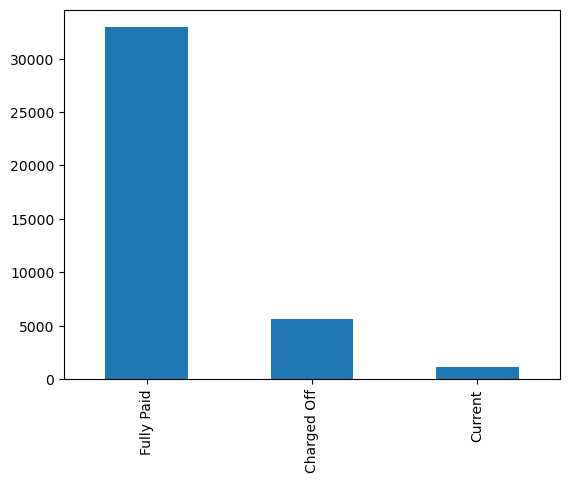

In [11]:
loan.loan_status.value_counts().plot.bar()
plt.show()

3) **Excluding loans with loan_status 'Current':** Since our primary objective is to identify the triggers of loan default, loan in 'Current' category can either become default or fully paid in future. Thus this category only produce uncertainty or noise in the data.

In [12]:
loan=loan[~loan.loan_status.isin(['Current'])]

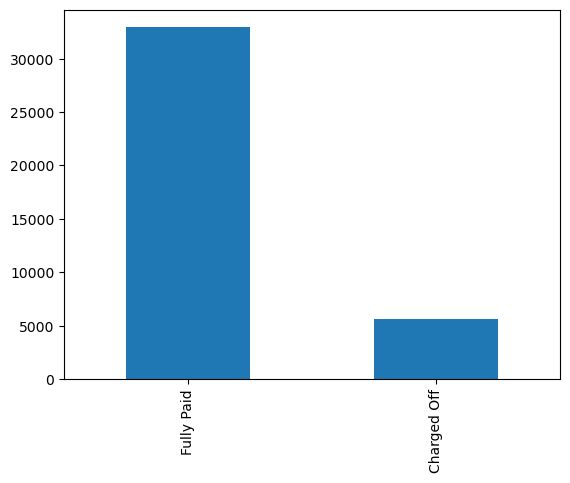

In [13]:
loan.loan_status.value_counts().plot.bar()
plt.show()

4. Transform the target variable `loan_status` to **numerical categorical variable** and rename it to **`default`** And dropping the `loan_status` variable- <br> a) Fully Paid (Not Default) = 0 <br> b) Charged Off (Default) = 1 <br><br> This was done in order to create heatmap during multivariate analysis where depth of the heatmap is the mean default rate for a grid block (More explanation in respective section).

In [14]:
loan['default'] = loan['loan_status'].apply(lambda x: 1 if x == 'Charged Off' else 0)

In [15]:
loan.drop(['loan_status'], axis=1, inplace = True)

<hr>

## <font color = blue> Treatment of Missing Values and Irrelevant Columns</font>

#### 1) Deleting Columns having all null/missing values

In [16]:
loan.isnull().mean()*100

member_id                           0.000000
loan_amnt                           0.000000
funded_amnt                         0.000000
funded_amnt_inv                     0.000000
term                                0.000000
int_rate                            0.000000
installment                         0.000000
grade                               0.000000
sub_grade                           0.000000
emp_title                           6.185033
emp_length                          2.677761
home_ownership                      0.007777
annual_inc                          0.000000
verification_status                 0.000000
issue_d                             0.000000
pymnt_plan                          0.000000
url                                 0.000000
desc                               32.472717
purpose                             0.000000
title                               0.028514
zip_code                            0.000000
addr_state                          0.000000
dti       

In [17]:
#This code will remove all the columns with null values
loan=loan.dropna(axis=1, how = 'all')


#### 2) Deleting Columns having single constant value

These variables do not impact the outcome of the target variable therefore, deleted. Columns with single constant value along with missing records are also deleted for the abovementioned reason.

In [18]:
a=pd.DataFrame(loan.nunique()).reset_index()
a.sort_values(by=[0])

index      0
51                 delinq_amnt      1
50    chargeoff_within_12_mths      1
49              acc_now_delinq      1
48            application_type      1
53                   tax_liens      1
33         initial_list_status      1
47                 policy_code      1
34                   out_prncp      1
46  collections_12_mths_ex_med      1
35               out_prncp_inv      1
15                  pymnt_plan      1
54                     default      2
4                         term      2
52        pub_rec_bankruptcies      3
13         verification_status      3
11              home_ownership      4
29                     pub_rec      5
7                        grade      7
25              inq_last_6mths      9
10                  emp_length     11
23                 delinq_2yrs     11
18                     purpose     14
8                    sub_grade     35
28                    open_acc     40
21                  addr_state     50
14                     issue_d     55
32                   total_acc     82
26      mths_since_last_delinq     95
43                last_pymnt_d    101
45          last_credit_pull_d    106
27      mths_since_last_record    111
5                     int_rate    370
24            earliest_cr_line    524
20                    zip_code    822
1                    loan_amnt    870
2                  funded_amnt   1019
31                  revol_util   1088
40          total_rec_late_fee   1320
42     collection_recovery_fee   2616
22                         dti   2853
41                  recoveries   4040
12                  annual_inc   5215
38             total_rec_prncp   6841
3              funded_amnt_inv   8050
6                  installment  15022
19                       title  19297
30                   revol_bal  21275
17                        desc  25803
9                    emp_title  28027
39               total_rec_int  34025
44             last_pymnt_amnt  34418
37             total_pymnt_inv  36387
36                 total_pymnt  36714
16                         url  38577
0                    member_id  38577

In [19]:
# Here we have created a list of columns which have constant single value present
b= list(a[a[0] == 1].iloc[:,0])
b

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [20]:
#Dropping columns here
loan.drop(loan[b],axis=1, inplace = True)

**`total_rec_late_fee`** : This variable has ~95% constant value (0). Thus, insightful trends cannot be observed.

In [21]:
loan['total_rec_late_fee'].value_counts(normalize=True)*100

0.000000      94.828525
15.000000      0.635093
15.000000      0.150349
30.000000      0.134795
15.000000      0.121834
15.000000      0.103689
15.000000      0.085543
15.000000      0.082951
15.000000      0.064805
15.000000      0.064805
45.000000      0.044068
15.000000      0.031107
15.000000      0.028514
15.000000      0.028514
15.000000      0.020738
30.000000      0.018146
15.000000      0.018146
30.000000      0.015553
30.000000      0.015553
30.000000      0.015553
15.000000      0.012961
30.000000      0.012961
30.000000      0.010369
30.000000      0.010369
60.000000      0.010369
15.000000      0.010369
30.000000      0.010369
30.000000      0.007777
30.000000      0.007777
15.000000      0.007777
45.000000      0.007777
34.460000      0.005184
15.790000      0.005184
17.700000      0.005184
30.000000      0.005184
30.000000      0.005184
45.000000      0.005184
16.780000      0.005184
15.000000      0.005184
15.640000      0.005184
30.000000      0.005184
15.000000      0

In [22]:
loan.drop('total_rec_late_fee',axis=1, inplace = True)

In [23]:
loan.shape

(38577, 43)

#### 3) Deleting the Columns with higher percentage of missing values

**`a) mths_since_last_record`** : This variable has >90% missing observation. Thus, insightful trends cannot be observed. Additionally, imputation of this variable may cause bias trends with target variable

In [24]:
loan.mths_since_last_record.isnull().mean()*100

92.8973222386396

In [25]:
loan.drop('mths_since_last_record',axis=1, inplace = True)

**`b) mths_since_last_delinq`** : This variable has ~65% missing observation. Thus, insightful trends cannot be observed. Additionally, imputation of this variable may cause bias trends with target variable

In [26]:
loan.mths_since_last_delinq.isnull().mean()*100

64.55919330170828

In [27]:
loan.drop('mths_since_last_delinq',axis=1, inplace = True)

#### 4) Deleting Other Irrelevant Columns

**`a) Url`** : 'url' columns does not have derive information other than ID information which is already available in **'id'** variable of the data and also it has all the unique values

In [28]:
(loan.url.nunique())/len(loan)*100

100.0

In [29]:
loan.url.head(3)

id
1077501    https://lendingclub.com/browse/loanDetail.action?loan_id=1077501
1077430    https://lendingclub.com/browse/loanDetail.action?loan_id=1077430
1077175    https://lendingclub.com/browse/loanDetail.action?loan_id=1077175
Name: url, dtype: object

In [30]:
loan.drop('url', axis=1, inplace= True)

**`b) desc`** : The only derive information which can be extracted from the 'desc' variable is month-year information which is already present in the **'issue_d'** variable of the data

In [31]:
(loan.desc.nunique())/len(loan)*100

66.88700521035851

In [32]:
loan.desc.head(3)

id
1077501                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>
1077430      Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as 

In [33]:
loan.drop('desc', axis=1, inplace= True)

**`c) emp_title`** : No information can be derived from this variable as it has more than 70% unique values, also no broader categories can be made by the values of this variable

In [34]:
#Code showing unique values percentage out of total records
(loan.emp_title.nunique())/len(loan)*100

72.65209840060139

In [35]:
loan.drop('emp_title', axis=1, inplace= True)

**`d) title`** : No information can be derived from this variable as it has more than 50% unique values, also more business relevant information available in the **'purpose'** variable

In [36]:
(loan.title.nunique())/len(loan)*100

50.022033854369184

In [37]:
loan.drop('title', axis=1, inplace= True)

**`e) member_id`** : This variable is an identification nominal variable which has all unique values therefore it will not have any impact on the target variable

In [38]:
(loan.member_id.nunique())/len(loan)*100

100.0

In [39]:
loan.drop('member_id', axis=1, inplace= True)

**`f) zip_code`** : Location information can be derived from **'addr_state'** variable. Also, last two digits of every value are hidden 

In [40]:
loan.drop('zip_code', axis=1, inplace= True)

**`g) recoveries` and `collection_recovery_fee`** : These variables provide recovery/fee amount information of defaulted loans. Therefore, these variables are identifiers if a loan is defaulted or not. Since we already have 'charged-off' information available in 'loan_status' column, therefore excluded from our analysis.

In [41]:
loan.drop(['recoveries', 'collection_recovery_fee'], axis=1, inplace= True)

#### 5) Keeping unique rows in the data

Duplicate rows only add noise in the data. Thus removing the same.

In [42]:
# Number of rows before deleting duplicate rows
loan.shape

(38577, 33)

In [43]:
# Deleting Duplicate Rows
loan.drop_duplicates(inplace = True)

In [44]:
# Number of rows after deleting duplicate rows. There is no duplicate record in data available.
loan.shape

(38577, 33)

#### 6) Creating Missing values distribution using Heatmap

In order to check if the distribution of missing values is random or not, we have sorted the data on the basis of `id` variable (LC Identification). We have assumed that the 'id' variable has been created in tune with time which means that shorter 'id' means older loan. This step was done in order to make sure that missing data distribution can be observed correctly.

In [45]:
#Checking all the variables in the data with missing values along with missing count
miss_col = pd.DataFrame(loan.isnull().sum()).reset_index()
miss_col_lst = miss_col[miss_col[0] > 0]['index'].to_list()
loan[miss_col_lst].isnull().mean()*100

emp_length              2.677761
home_ownership          0.007777
revol_util              0.129611
last_pymnt_d            0.184047
last_credit_pull_d      0.005184
pub_rec_bankruptcies    1.806776
dtype: float64

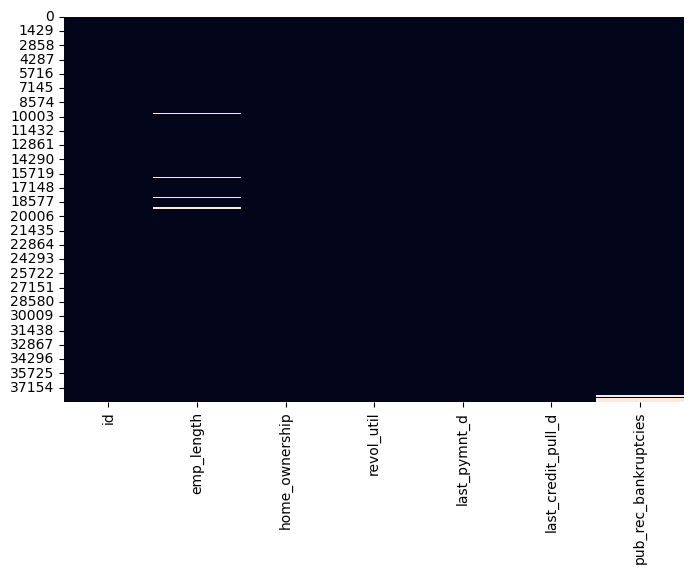

In [46]:
plt.figure(figsize = (8,5))
sns.heatmap(loan[miss_col_lst].reset_index().isnull(), cbar= False)
plt.show()

<font color = green> **Observations:** </font> From this heatmap, we can observe that missing values are very less. Since our objective here is to find that factors which are triggering the loan default by doing data visualization and not creating a predictive model, hence we can leave the missing values as is.

<hr>

## <font color = blue> Correcting the Data-types and Values </font>

**`a) int_rate`** : In the imported data, this variable is converted to 'object' datatype because of `'%'`. Converting to 'float' datatype.

In [47]:
loan.int_rate=loan.int_rate.apply(lambda x: float(x.strip('%')))

**`b) revol_util`** : In the imported data, this variable is converted to 'object' datatype because of `'%'`. Converting to float datatype.

In [48]:
loan.revol_util=loan.revol_util.apply(lambda x: float(str(x).strip('%')))

In [49]:
loan.emp_length.value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

**`c) emp_length`** : As mentioned in the data dictionary, there are possible values of '0' and '10'. We have renamed these values to their original category name '< 1 year' and '10+ years' respectively. 

In [50]:
loan.emp_length.replace('0', '< 1 year', inplace = True)
loan.emp_length.replace('10', '10+ years', inplace = True)

Categories of emp_length are further renamed

In [51]:
loan.emp_length = loan.emp_length.apply(lambda x: '0-1 year' if x == '< 1 year' else ('GT 10 year' if x == '10+ years' else x))

**`d) Date variables`** : All the date variables present in the imported data are of 'object' datatype. Therefore, these date variables are converted to timestamp datatype. 

Any data before unix timestamp, they are converted to 21 century values, so subtracting values more than 2023 with 100 will give more actual time.

In [52]:
#converting to date type
loan['issue_d']= pd.to_datetime(loan['issue_d'], format ='%b-%y')
loan['issue_d'] = loan['issue_d'].apply(lambda x: x- pd.DateOffset(years=100) if x.year > 2023 else x)

In [53]:
loan['last_pymnt_d']= pd.to_datetime(loan['last_pymnt_d'], format ='%b-%y')
loan['last_pymnt_d'] = loan['last_pymnt_d'].apply(lambda x: x- pd.DateOffset(years=100) if x.year > 2023 else x)

In [54]:
loan['last_credit_pull_d']= pd.to_datetime(loan['last_credit_pull_d'], format ='%b-%y')
loan['last_credit_pull_d'] = loan['last_credit_pull_d'].apply(lambda x: x- pd.DateOffset(years=100) if x.year > 2023 else x)

In [55]:
loan['earliest_cr_line']= pd.to_datetime(loan['earliest_cr_line'], format ='%b-%y')
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x: x- pd.DateOffset(years=100) if x.year > 2023 else x)

In [56]:
loan.head(3)

loan_amnt  funded_amnt  funded_amnt_inv        term  int_rate  \
id                                                                       
1077501       5000         5000           4975.0   36 months     10.65   
1077430       2500         2500           2500.0   60 months     15.27   
1077175       2400         2400           2400.0   36 months     15.96   

         installment grade sub_grade  emp_length home_ownership  annual_inc  \
id                                                                            
1077501       162.87     B        B2  GT 10 year           RENT     24000.0   
1077430        59.83     C        C4    0-1 year           RENT     30000.0   
1077175        84.33     C        C5  GT 10 year           RENT     12252.0   

        verification_status    issue_d         purpose addr_state    dti  \
id                                                                         
1077501            Verified 2011-12-01     credit_card         AZ  27.65   
1077430     Source Verified 2011-12-01             car         GA   1.00   
1077175        Not Verified 2011-12-01  small_business         IL   8.72   

         delinq_2yrs earliest_cr_line  inq_last_6mths  open_acc  pub_rec  \
id                                                                         
1077501            0       1985-01-01               1         3        0   
1077430            0       1999-04-01               5         3        0   
1077175            0       2001-11-01               2         2        0   

         revol_bal  revol_util  total_acc  total_pymnt  total_pymnt_inv  \
id                                                                        
1077501      13648        83.7          9  5863.155187          5833.84   
1077430       1687         9.4          4  1008.710000          1008.71   
1077175       2956        98.5         10  3005.666844          3005.67   

         total_rec_prncp  total_rec_int last_pymnt_d  last_pymnt_amnt  \
id                                                                      
1077501          5000.00         863.16   2015-01-01           171.62   
1077430           456.46         435.17   2013-04-01           119.66   
1077175          2400.00         605.67   2014-06-01           649.91   

        last_credit_pull_d  pub_rec_bankruptcies  default  
id                                                         
1077501         2016-05-01                   0.0        0  
1077430         2013-09-01                   0.0        1  
1077175         2016-05-01                   0.0        0

<hr>

## <font color = blue> Identifying Qualitative and Quantitative variables </font>

In the data, **Qualitative numeric variables** are identified based on their unique values. This process is required in order to segregate Quantitative and Qualitative variables.

In [57]:
# checking unique values of all numerical variables
loan.select_dtypes(include = [np.number]).nunique()

loan_amnt                 870
funded_amnt              1019
funded_amnt_inv          8050
int_rate                  370
installment             15022
annual_inc               5215
dti                      2853
delinq_2yrs                11
inq_last_6mths              9
open_acc                   40
pub_rec                     5
revol_bal               21275
revol_util               1088
total_acc                  82
total_pymnt             36714
total_pymnt_inv         36387
total_rec_prncp          6841
total_rec_int           34025
last_pymnt_amnt         34418
pub_rec_bankruptcies        3
default                     2
dtype: int64

Numeric variables with less than 10 unique values can be safely assumed as numerical qualitative variables. Thus, converting their datatype to 'object'

In [58]:
to_be_obj = ['delinq_2yrs', 'inq_last_6mths', 'pub_rec','default','pub_rec_bankruptcies']

In [59]:
## Typecast to Categorical column
loan[to_be_obj] = loan[to_be_obj].astype('object')

#### Quantitative variables

In [60]:
quant_cols = loan.select_dtypes(include = [np.number]).columns.tolist()
quant_cols.sort()

#### Qualitative variables

In [61]:
# Qualitative variable
qual_cols = loan.select_dtypes(include = ['object']).columns.tolist()
qual_cols.sort()

<hr>

## <font color = blue> Outliers Treatment of Quantitative Variables </font>

In order to identify the outliers, we have analysed below p5 and above p95 quantiles values along with other statistics like mean, median, std, etc. For this purpose, we have created statistics summary table of all quantitative variables. We have also created Box-plot to visualize the spread of data.

In [62]:
# Creating below p5 and above p95 quantiles
quantile = list(np.arange(0.01,0.06, .01)) + list(np.arange(0.95,0.99, .01))

In [63]:
# Creating statistics summary table for outlier detection
round(loan[quant_cols].describe(percentiles= quantile).transpose(), 2)

count      mean       std      min        1%        2%  \
annual_inc       38577.0  68777.97  64218.68  4000.00  14400.00  18000.00   
dti              38577.0     13.27      6.67     0.00      0.35      0.78   
funded_amnt      38577.0  10784.06   7090.31   500.00   1200.00   1500.00   
funded_amnt_inv  38577.0  10222.48   7022.72     0.00    671.62   1000.00   
installment      38577.0    322.47    208.64    15.69     37.51     49.20   
int_rate         38577.0     11.93      3.69     5.42      5.42      5.79   
last_pymnt_amnt  38577.0   2746.24   4494.65     0.00      6.71     15.98   
loan_amnt        38577.0  11047.03   7348.44   500.00   1200.00   1500.00   
open_acc         38577.0      9.28      4.40     2.00      2.00      3.00   
revol_bal        38577.0  13289.49  15866.49     0.00      0.00      0.00   
revol_util       38527.0     48.70     28.36     0.00      0.00      0.00   
total_acc        38577.0     22.05     11.43     2.00      4.00      5.00   
total_pymnt      38577.0  11866.97   8809.86     0.00    740.99   1129.80   
total_pymnt_inv  38577.0  11271.20   8700.85     0.00    317.07    674.33   
total_rec_int    38577.0   2119.24   2389.50     0.00     50.89     91.77   
total_rec_prncp  38577.0   9648.32   7009.38     0.00    340.35    655.47   

                       3%        4%        5%       50%        95%        96%  \
annual_inc       20000.00  22000.00  24000.00  58868.00  140004.00  150000.00   
dti                  1.24      1.68      2.10     13.37      23.80      24.14   
funded_amnt       1900.00   2000.00   2400.00   9550.00   25000.00   25000.00   
funded_amnt_inv   1298.84   1500.00   1800.00   8733.44   24500.07   24950.00   
installment         58.76     65.09     70.61    277.86     760.82     804.67   
int_rate             5.99      6.03      6.17     11.71      18.31      18.67   
last_pymnt_amnt     26.23     33.74     41.76    568.26   12370.09   13619.82   
loan_amnt         1925.00   2000.00   2400.00   9600.00   25000.00   25000.00   
open_acc             3.00      3.00      3.00      9.00      17.00      18.00   
revol_bal           39.00    181.04    312.00   8762.00   41356.20   46042.96   
revol_util           0.40      1.40      2.60     49.10      93.57      94.70   
total_acc            6.00      6.00      7.00     20.00      43.00      45.00   
total_pymnt       1372.14   1642.97   1856.44   9674.05   29620.76   31019.40   
total_pymnt_inv   1001.16   1185.17   1380.82   9066.66   28989.59   30369.47   
total_rec_int      124.83    155.20    182.74   1300.45    6862.40    7554.79   
total_rec_prncp    967.27   1093.20   1300.00   8000.00   24280.00   25000.00   

                       97%        98%        99%         max  
annual_inc       165000.00  187000.00  234144.00  6000000.00  
dti                  24.51      24.85      26.53       29.99  
funded_amnt       27000.00   30000.00   35000.00    35000.00  
funded_amnt_inv   25750.00   29879.26   34715.01    35000.00  
installment         830.84     870.39     931.09     1305.19  
int_rate             19.29      19.91      20.99       24.40  
last_pymnt_amnt   15157.43   17486.95   21250.25    36115.20  
loan_amnt         28000.00   30000.00   35000.00    35000.00  
open_acc             19.00      20.00      22.00       44.00  
revol_bal         52897.68   63449.00   83276.72   149588.00  
revol_util           95.90      97.10      98.50       99.90  
total_acc            48.00      51.00      56.00       90.00  
total_pymnt       32894.47   36230.08   41308.44    58563.68  
total_pymnt_inv   32266.10   35578.02   40415.31    58563.68  
total_rec_int      8405.33    9664.26   11888.92    23563.68  
total_rec_prncp   25000.00   28079.84   34000.00    35000.02

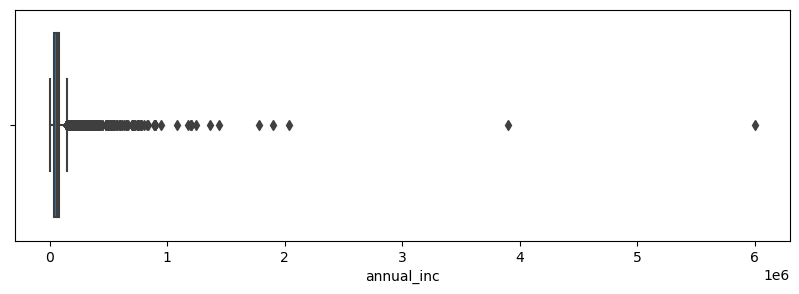

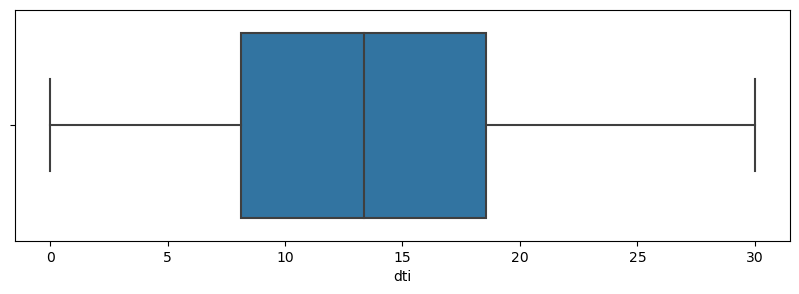

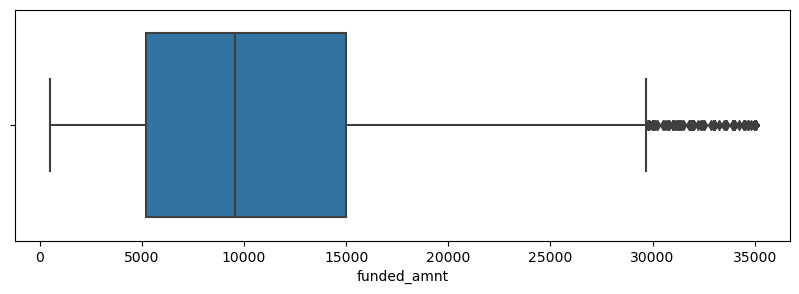

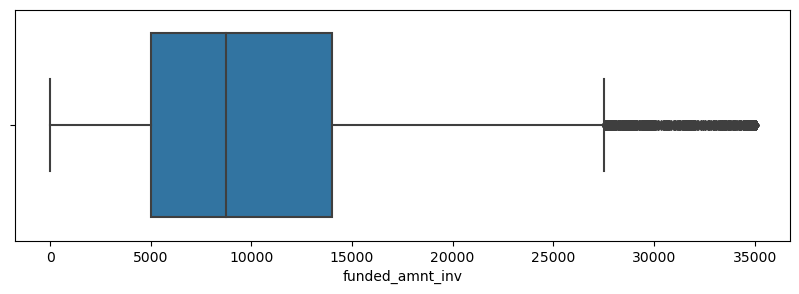

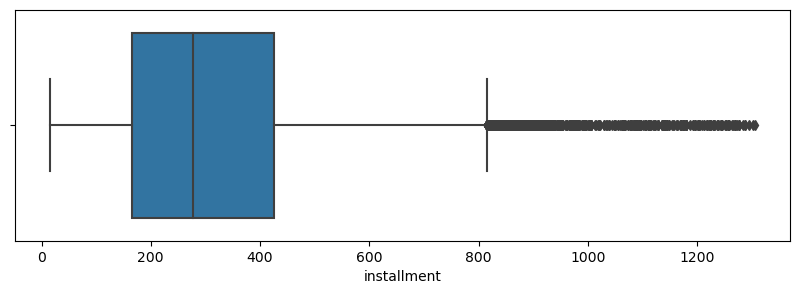

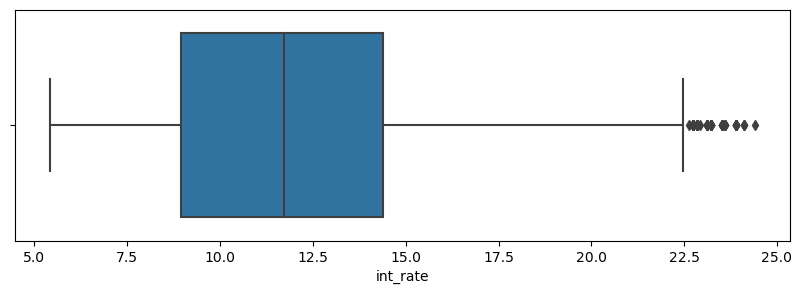

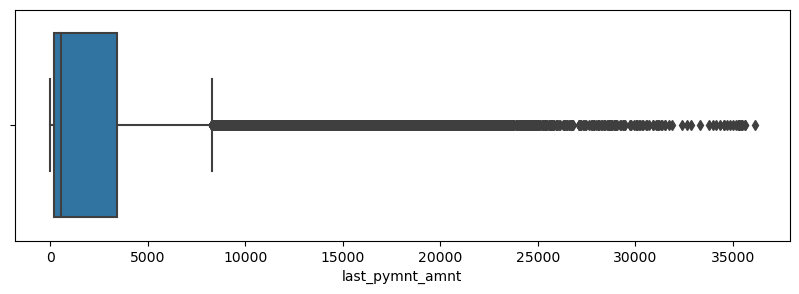

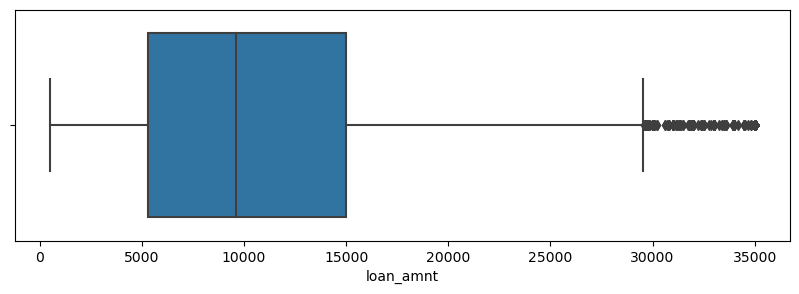

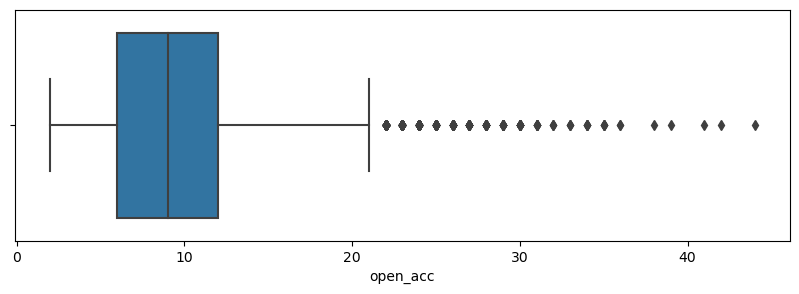

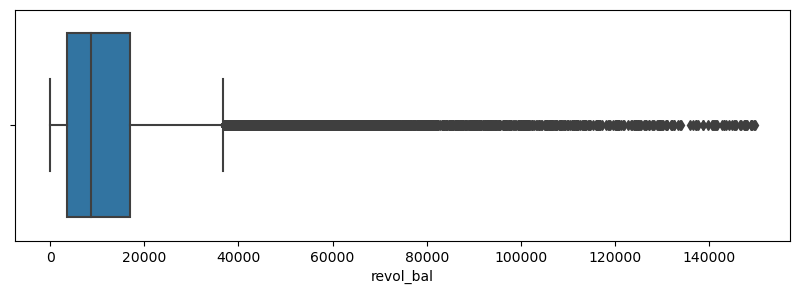

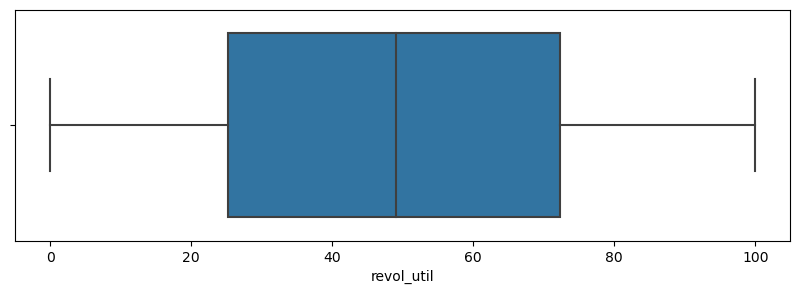

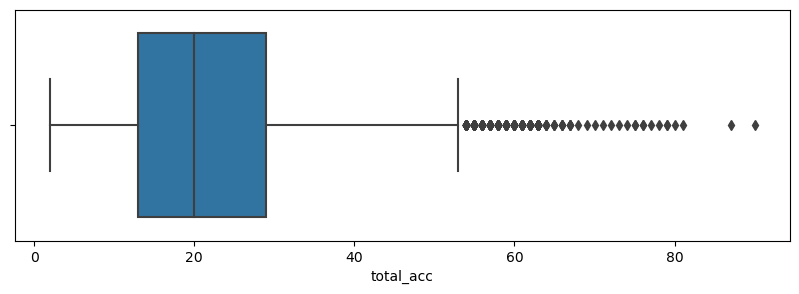

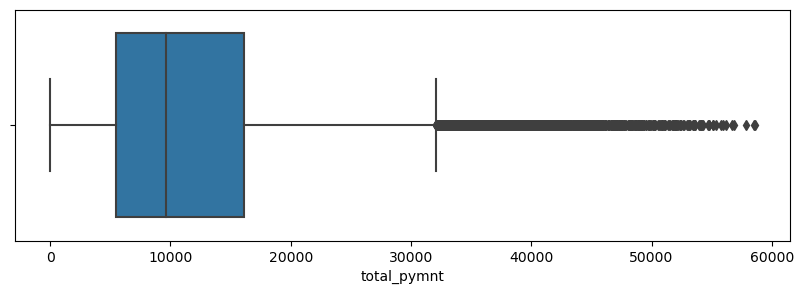

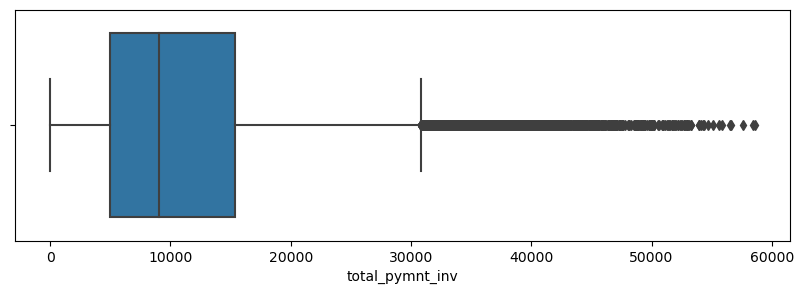

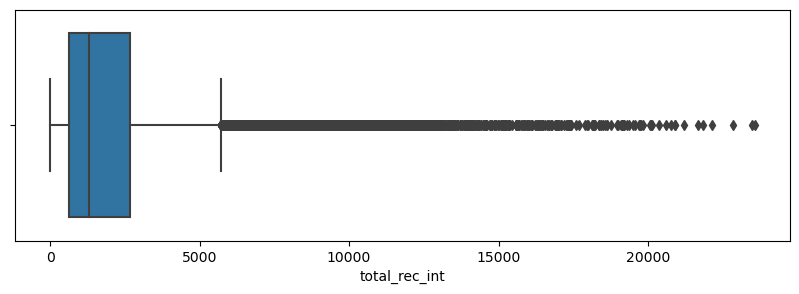

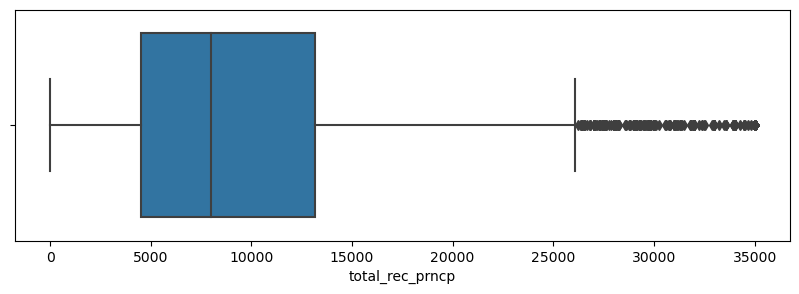

In [64]:
# Creating Box-plot to visualize spread of the data
for col in quant_cols:
    plt.figure(figsize = (10,3))
    sns.boxplot(x = loan[col])
    plt.show()

<font color = green> **Observations:** </font> By analysing the box-plot and statistics summary table, we have detected outliers for 'annual_inc', 'total_acc', 'open_acc', 'total_rec_int', 'revol_bal' and 'last_pymnt_amnt' variables. To treat these outliers, we have used the concept of flooring and ceiling.

**1. annual_inc**

In [65]:
#Flooring and Ceiling treatment at p1 and p99 respectively
floor = loan.annual_inc.quantile(.01)
ceiling = loan.annual_inc.quantile(.99)
loan.annual_inc = loan.annual_inc.apply(lambda x: floor if x < floor else (ceiling if x > ceiling else x))

**2. open_acc**

In [66]:
#Ceiling treatment performed at p99
ceiling = loan.open_acc.quantile(.99)
loan.open_acc = loan.open_acc.apply(lambda x: ceiling if x > ceiling else x)

**3. total_acc**

In [67]:
#Ceiling treatment performed at p99
ceiling = loan.total_acc.quantile(.99)
loan.total_acc = loan.total_acc.apply(lambda x: ceiling if x > ceiling else x)

**4. total_rec_int**

In [68]:
#Ceiling treatment performed at p99
ceiling = loan.total_rec_int.quantile(.99)
loan.total_rec_int = loan.total_rec_int.apply(lambda x: ceiling if x > ceiling else x)

**5. revol_bal**

In [69]:
#Ceiling treatment performed at value of 100000
loan.revol_bal = loan.revol_bal.apply(lambda x: 100000 if x > 100000 else x)

**6. last_pymnt_amnt**

In [70]:
#Ceiling at value of 25000
loan.last_pymnt_amnt = loan.last_pymnt_amnt.apply(lambda x: 25000 if x > 25000 else x)

<hr>

## <font color = blue> Excluding variables with high Correlation </font>

Two highly correlated quantitative variables can have nearly the same ability to predict the outcome value. In our case, the outcome is loan default status. Correlation is scaled from 0 (no correlation) to 1 (causation). 

If we keep highly correlated (assuming r > 0.8) variables in our data then they will not add any extra information to the default status variable and will only add noise in the data

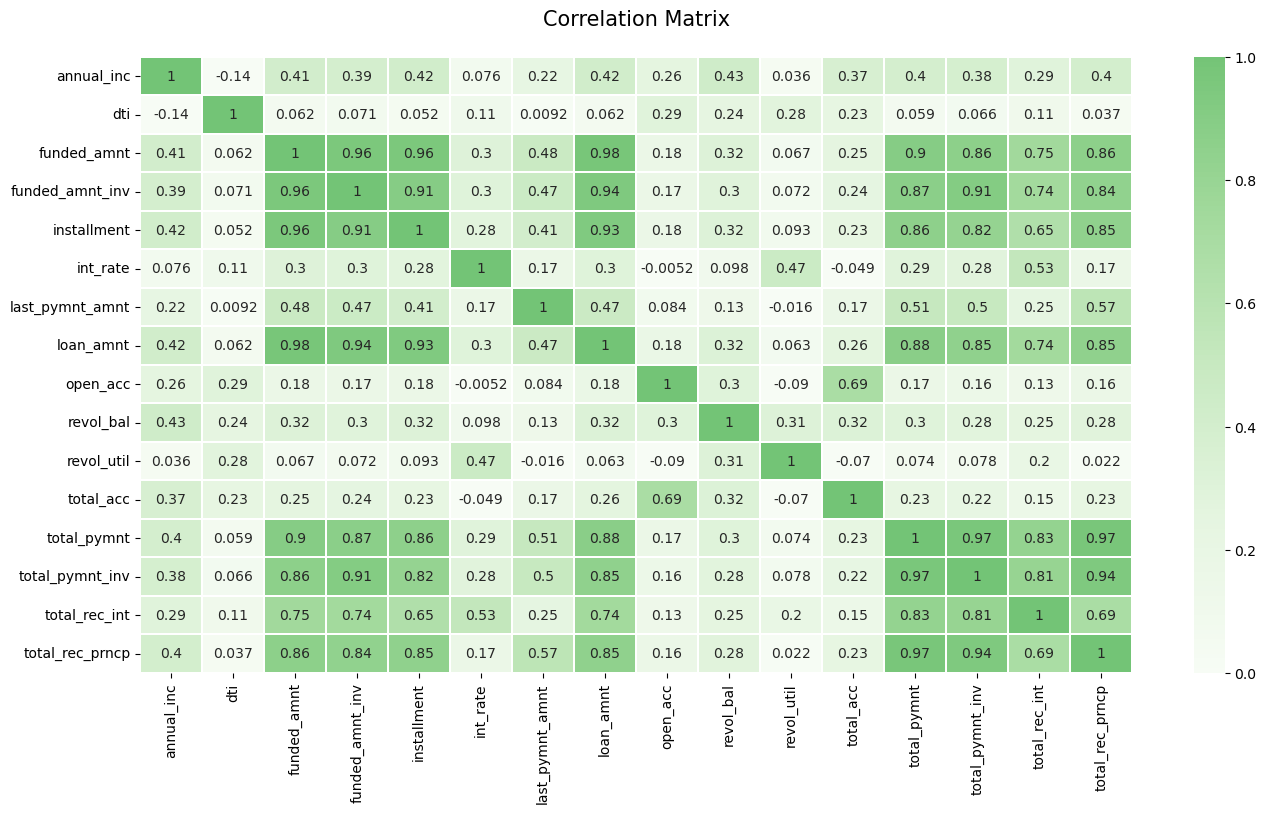

In [71]:
# Calculated correlation matrix for all quantitative variables
plt.figure(figsize = (16, 8))
sns.heatmap(loan[quant_cols].corr(),  cmap='Greens', annot = True, center=True, linewidths=0.2, linecolor='white', vmin=0, vmax=1)
plt.title('Correlation Matrix\n', fontdict={'fontsize': 15, 'fontweight' : 5})
plt.show()

<font color = green> **Observations:**</font>  In the above correlation matrix, we have identified a block of highly correlated variables. Since this block is not clearly visible in the above matrix, we have created the below matrix for more clarity.

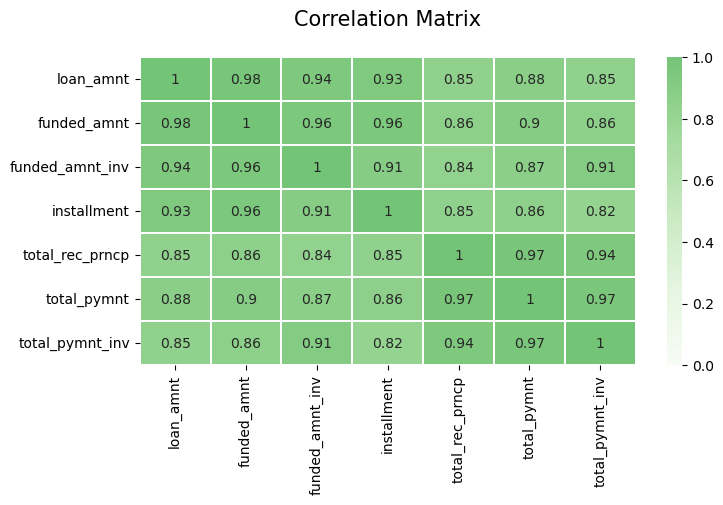

In [72]:
# Calculated correlation matrix for block of highly correlated quantitative variables
plt.figure(figsize = (8, 4))
corr_var = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment',  'total_rec_prncp', 'total_pymnt', 'total_pymnt_inv']
ax = sns.heatmap(loan[corr_var].corr(), cmap='Greens', annot = True, center=True, linewidths=0.2, linecolor='white', vmin=0, vmax=1)
ax.tick_params(axis='x', rotation=90)
plt.title('Correlation Matrix\n', fontdict={'fontsize': 15, 'fontweight' : 5})
plt.show()

<font color = green> **Observations:**</font> As all the variables of **this block** are highly correlated (r > 0.8) thus will have similar impact on the target variable, we have selected `'loan_amnt'` variable from this block and all other variables are dropped from our further analysis.

In [73]:
# Dropping the remaining variables
loan.drop(['funded_amnt','funded_amnt_inv','installment','total_rec_prncp','total_pymnt_inv','total_pymnt','pub_rec'], axis=1, inplace= True)

#### Excluding sub-grade variable

According to data dictionary, 'sub-grade' variable has sub-grades of grades available in 'grade' variable which can also confirm by the below chart. Therefore both the variables are providing the same information. Thus, dropped 'sub_grade' from our further analysis.

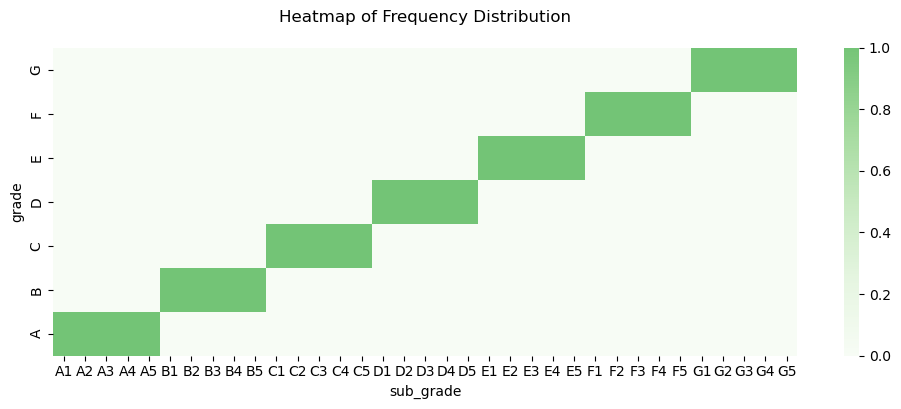

In [74]:
# It will create frequency matrix of grade and sub_grade
grade_matrix = pd.crosstab(index = loan['grade'], columns = loan['sub_grade'])

# Creating the heatmap to show causation between grade and sub_grade
plt.figure(figsize=(12,4))
grade_matrix.sort_index(level=0, ascending=False, inplace=True)
sns.heatmap(grade_matrix, cmap = 'Greens', center= True, vmin=0, vmax=1)
plt.title('Heatmap of Frequency Distribution\n', fontdict={'fontsize': 12, 'fontweight' : 5})
plt.show()

In [75]:
# Dropping sub_grade variable
loan.drop(['sub_grade'], axis=1, inplace= True)

In [76]:
loan.shape

(38577, 25)

<hr>

## <font color = blue> Creating Derived Variables </font>

**Type driven variables** - In the data we have `four` date variables. As our target variable is qualitative (1: default / 0: non-default) in nature, to establish pattern between target and date variables, we have created 'year' and 'month' variables.  

In [77]:
loan['issue_year'] =(pd.DatetimeIndex(loan['issue_d']).year).astype('O')
loan['issue_month'] = loan['issue_d'].dt.strftime('%m')

In [78]:
loan['last_pymnt_year'] = (pd.DatetimeIndex(loan['last_pymnt_d']).year).astype('O')
loan['last_pymnt_month'] = loan['last_pymnt_d'].dt.strftime('%m')

In [79]:
loan['last_c_pull_year'] = (pd.DatetimeIndex(loan['last_credit_pull_d']).year).astype('O')
loan['last_c_pull_month'] = loan['last_credit_pull_d'].dt.strftime('%m')

In [80]:
loan['earliest_cr_line_year'] = (pd.DatetimeIndex(loan['earliest_cr_line']).year).astype('O')
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].dt.strftime('%m')

**Data driven variables-** In order to establish trends with target variable, Quantitative variables are segmented into groups. We have divided these variables into **5 bins** by segmenting the data at p20, p40, p60 and p80 percentiles.

In [81]:
# Reconfirm the Qualitative variable
quant_cols = loan.select_dtypes(include = [np.number]).columns.tolist()
quant_cols.sort()

In [82]:
grp = list(map(lambda x: x + '_grp', quant_cols))
grp.sort()

In [83]:
for x, y in zip(quant_cols, grp):
    loan[y] = pd.qcut(loan[x], q = [0, 0.2, 0.4, 0.6, 0.8, 1.0], 
                      labels= ['G1-p20', 'G2-p40', 'G3-p60', 'G4-p80','G5-p100'])

In [84]:
loan.shape

(38577, 43)

<hr>

## <font color = blue> Progress so far: </font>

We have cleaned the data using techniques like Missing values treatment, Outlier treatment and deleting highly correlated independent variables. Also, we have created derived variables to strengthen our analysis.

## <font color = blue> **Next Step:** </font>

In order to achieve the above-mentioned objective, in the next few sections, we will try to identify the trends/relationships of independent variables with target variable (status of loan default) by performing bivariate and multivariate analysis through data visualization techniques.

### Visualization Techniques used-

1) **Univariate analysis:**  We have used **Boxplot** (Quantitative variables) and **Countplot** (Qualitative variables)
2) **Bivariate analysis:** Our target variable is qualitative/binary in nature. Therefore, to find the relationship with quantitative variables, we have divided the data into 5 bins and plotted the **Normalized Stacked Bar Chart**. Same chart is used for Qualitative variables as well.
3) **Multivariate analysis:** This analysis measures the relationship of two independent variables with target variable (loan status). However, for this analysis, we have chosen those variables who have shown **strong** indicators to loan default status. For this analysis, we have plotted **Heatmap** in which depth of loan default rate is observed in the grid blocks.

### Relationship Scale used-

Identification of relationship is a subjective assessment. Therefore, in order to measure the degree of relationship, we have created **four** categories below. Their meaning is self-explanatory.
<br><br>1) Strong relationship
<br>2) Moderate relationship
<br>3) Weak relationship
<br>4) No relationship

<hr>

## <font color = blue> Quantitative variables- Relationship with target variable </font>

#### We have summarized all our observations after the charts

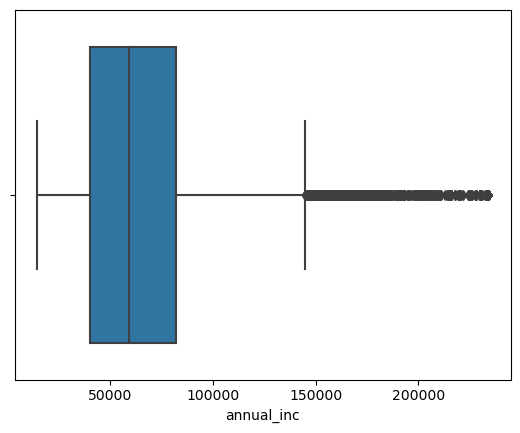

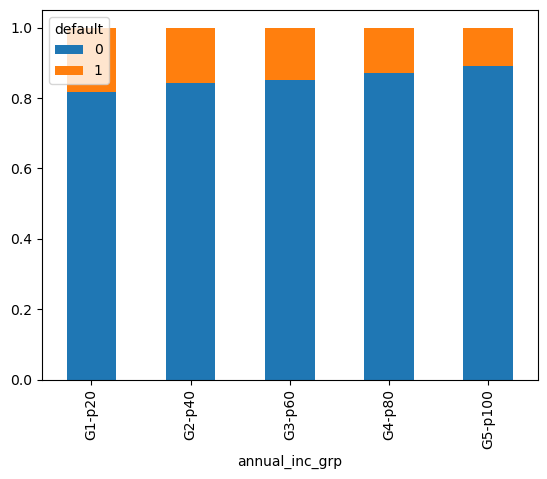

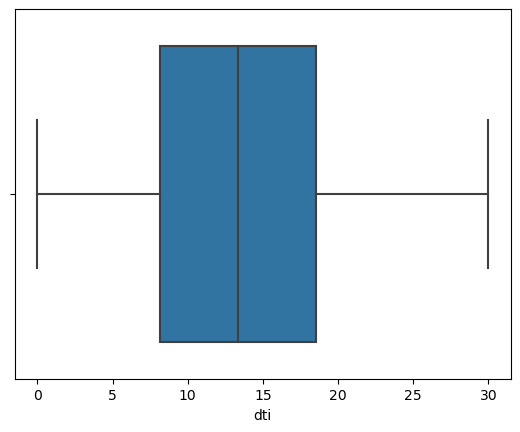

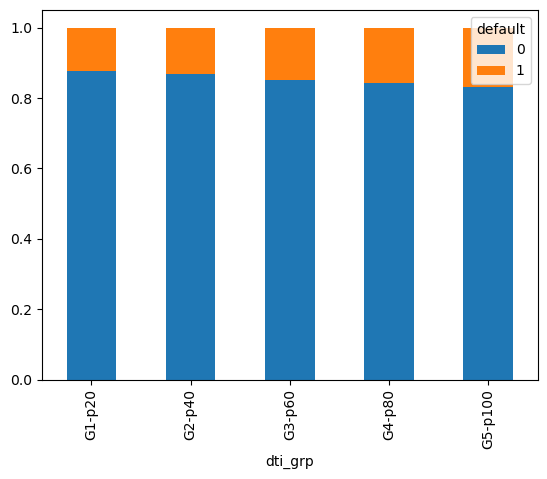

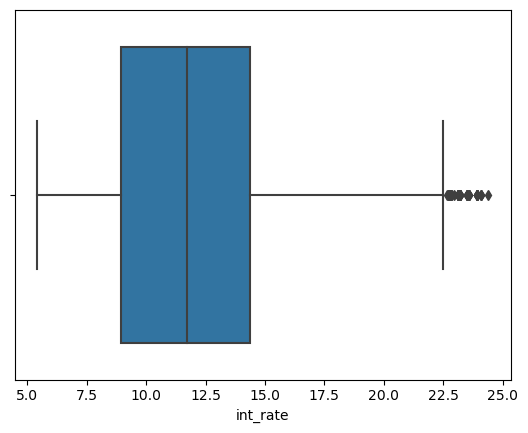

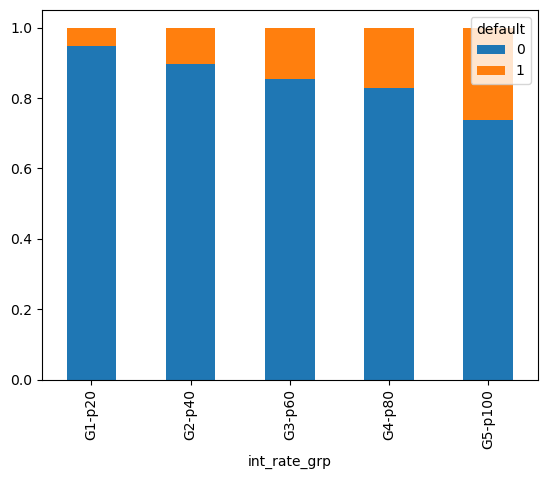

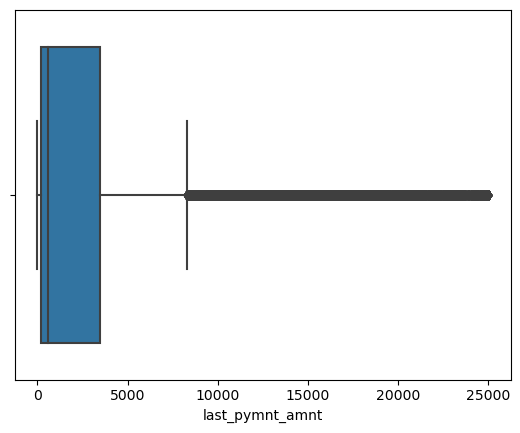

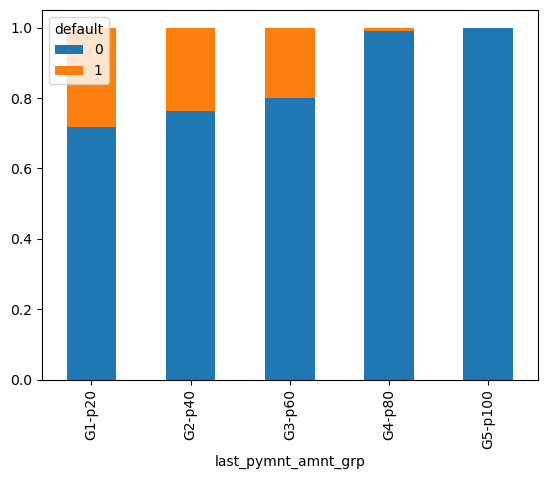

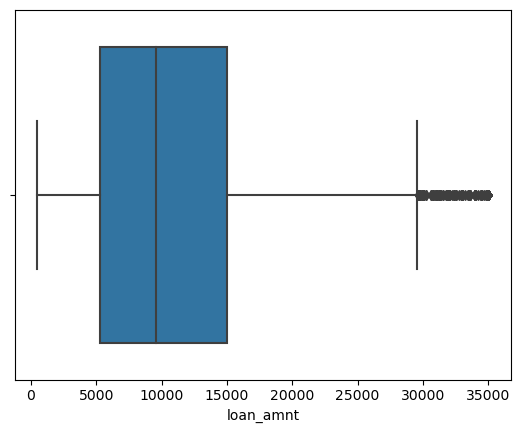

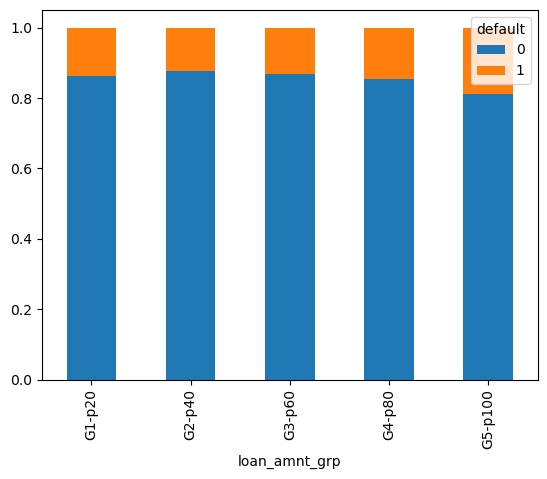

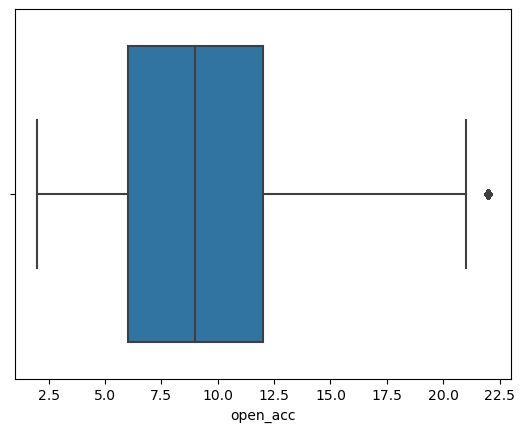

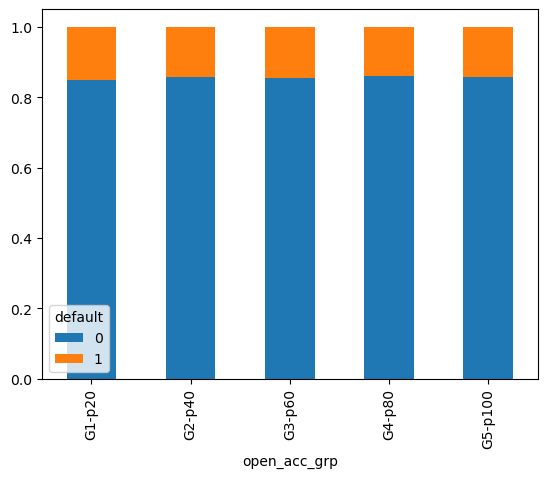

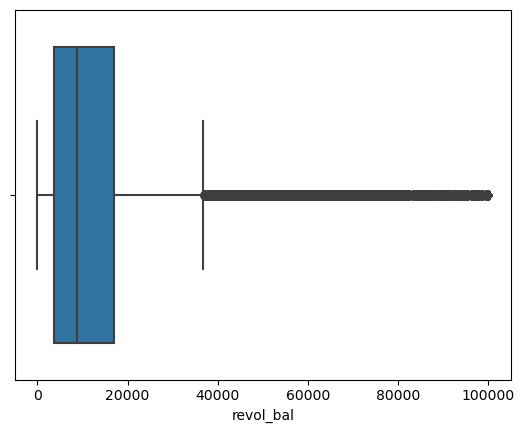

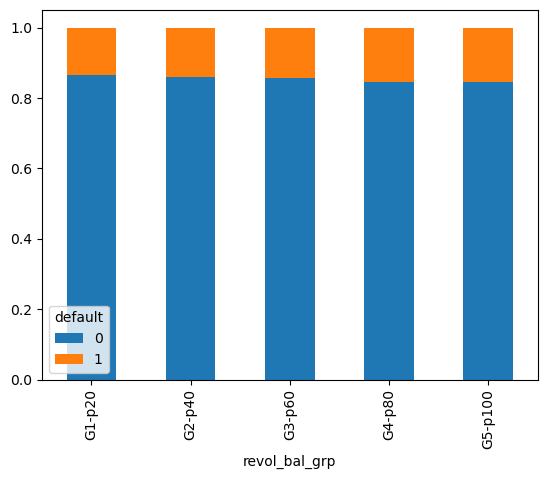

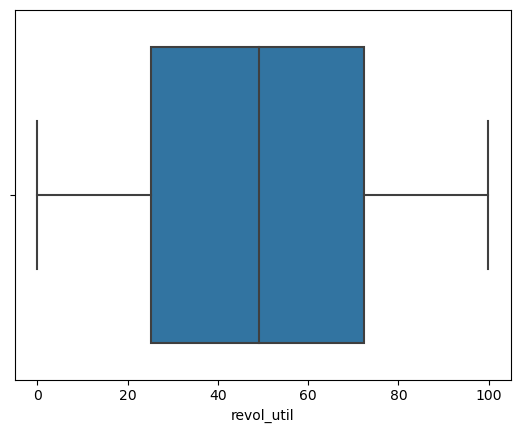

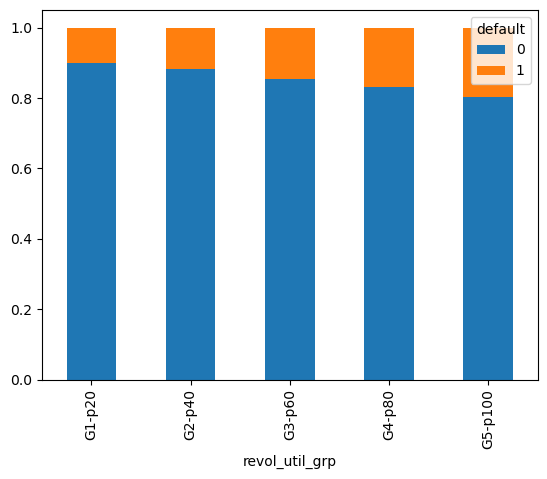

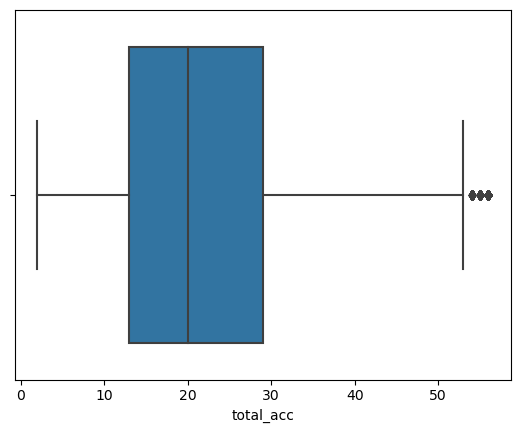

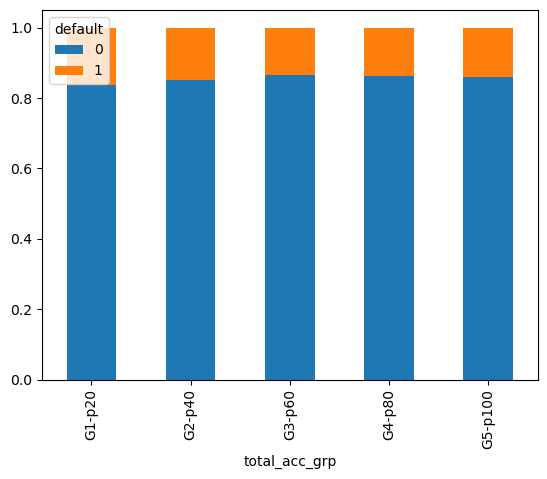

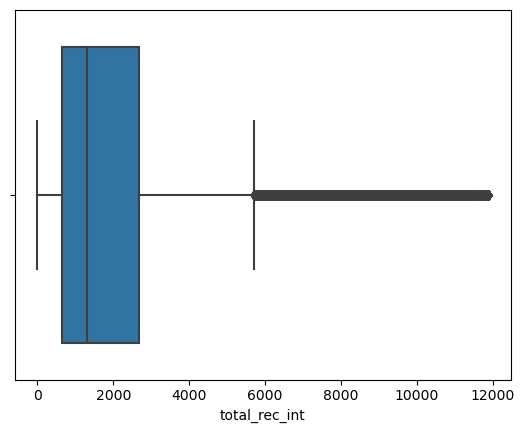

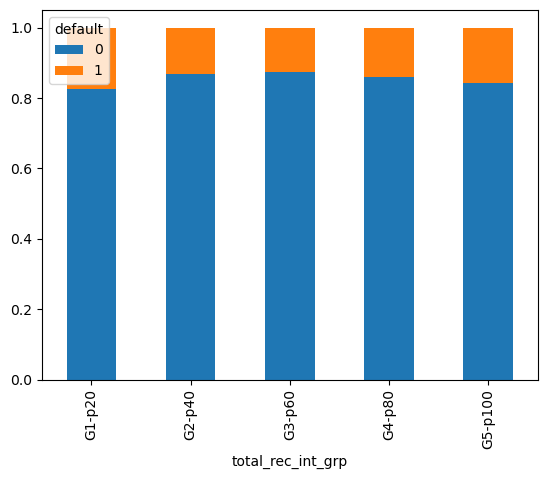

In [85]:
# We have created box-plot to observe skewness and spread of the data
# We have created Normalized Stack Bar Chart to observe relationship with target variable
# Here we will analyse all the Quantitative variables
for x, y in zip(quant_cols, grp):
    #creating boxplot
    sns.boxplot(x = loan[x])

    cross_df= pd.crosstab(loan[y], loan.default, normalize='index')
    #creating Normalize Stacked bar chart
    cross_df.plot(kind='bar', stacked = True)
    plt.show()

<font color = green> **Observations:**</font>  Here we have provided summary of univariate and bivariate analysis conducted on Quantitative variables

1) **`annual_inc & annual_inc_grp:`** 
>1) Right Skewed Data
>2) **Strong trend** observed with the target variable. As the income in the group increasing, default rate is decreasing.
People with higher income are more likely to pay their loans.
2) **`dti & dti_grp:`**
>1) **Strong trend** observed. As the debt-to-income ratio increasing, default to count ratio is increasing.
3) **`int_rate & int_rate_grp:`** 
>1) **Strong trend** observed. As the loan interest rate is increasing, default to count ratio is increasing. It means that higher risky loans have higher interest rate.
4) **`last_pymnt_amnt & last_pymnt_amnt_grp:`** 
>1) Right Skewed Data
>2) **Strong trend** observed. People who last payment amount is higher their chance of getting default is lower. It means that these people are financially strong and therefore able to pay their obligations.
5) **`loan_amnt & loan_amnt_grp:`** 
>2) **Weak trend** observed. As the sanctioned Loan amount is bigger, their chances of defaults are also higher. However, in the initial 3 loan categories (till p60), the default rate seems equivalent.
<br>
6) **`open_acc & open_acc_grp:`**
>1) **No trend** observed
<br>
7) **`revol_bal & revol_bal_grp:`**
>1) **Moderate trend** observed with default rate. People with higher amount of revolving credit have higher probability of default.
<br>
8) **`revol_util & revol_util_grp:`** 
>1) **Strong trend** observed. As the utilization rate of revolving credit increasing, defaults occurance is also increasing.
<br>
9) **`total_acc & total_acc_grp:`**
>1) **No trend** observed
10) **`total_rec_int & total_rec_int_grp:`**
>1) **No trend** observed

<hr>

## <font color = blue> Qualitative variables- Relationship with target variable </font>

#### We have summarized all our observations after the charts

In [86]:
# Reconfirm Qualitative variable
qual_cols = loan.select_dtypes(include = ['object']).columns.tolist()
qual_cols.sort()

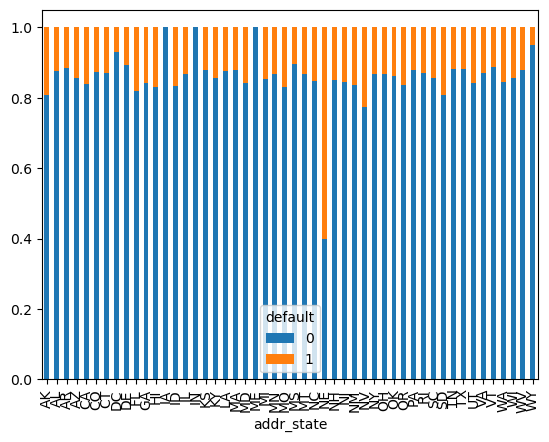

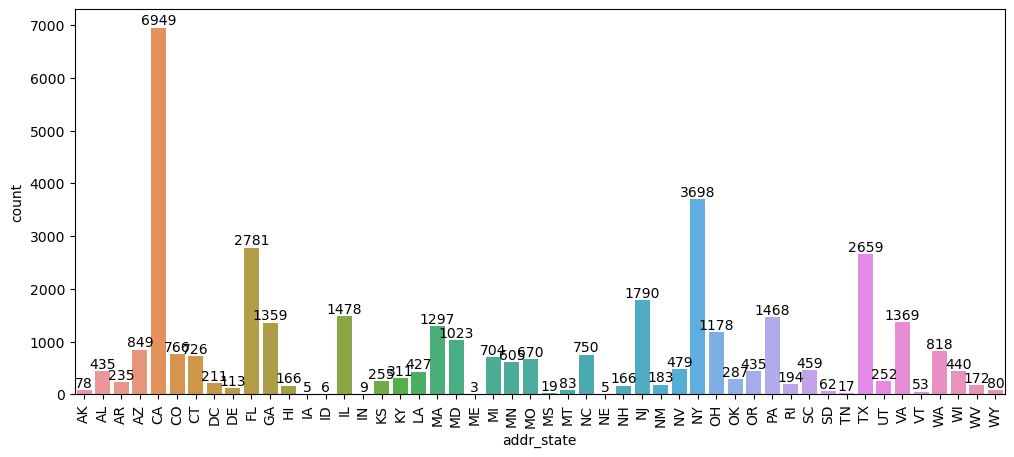

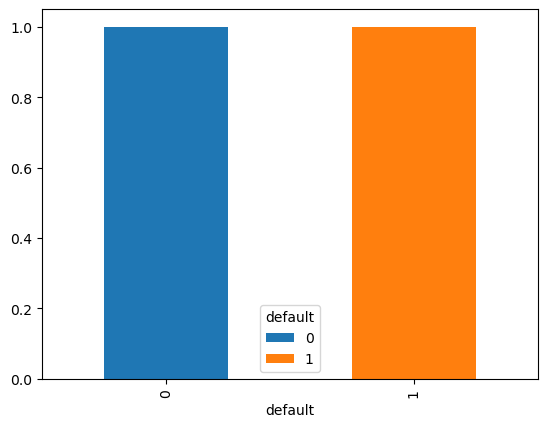

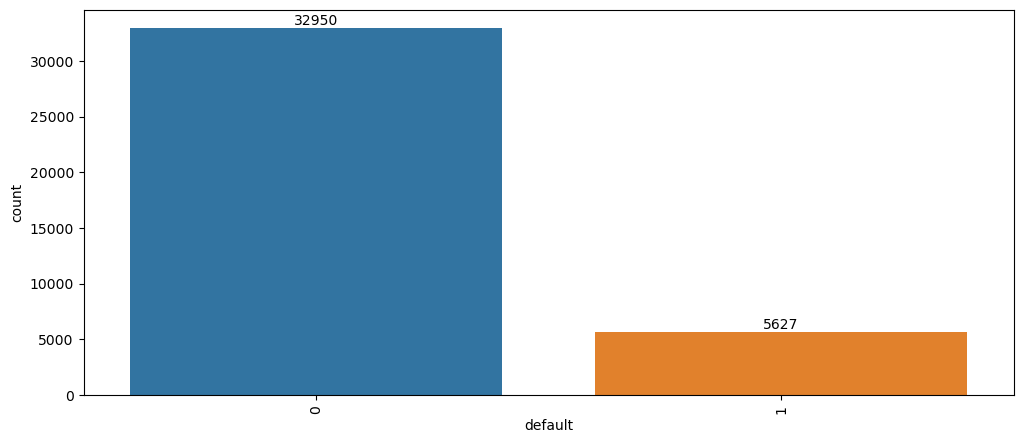

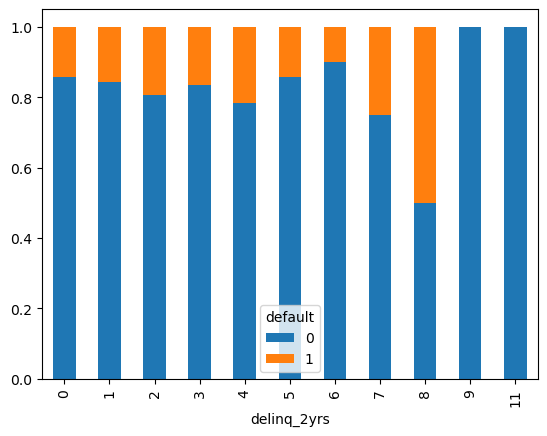

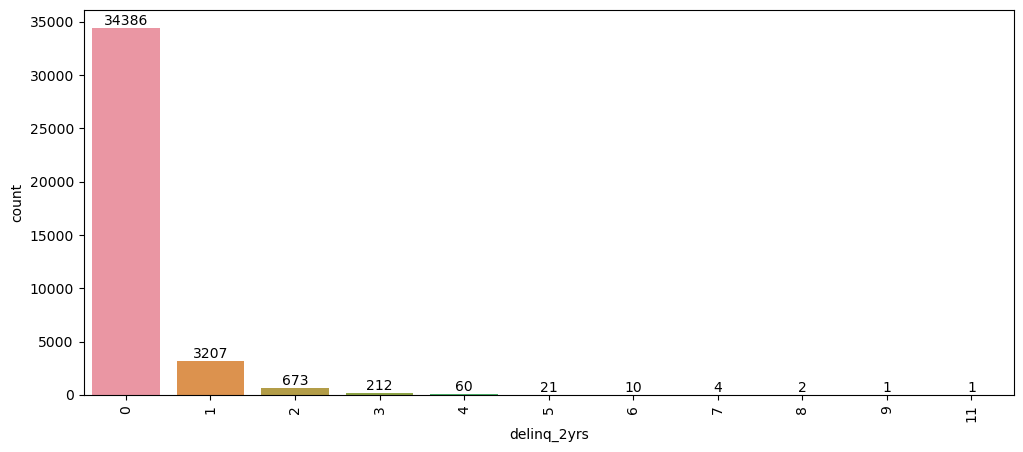

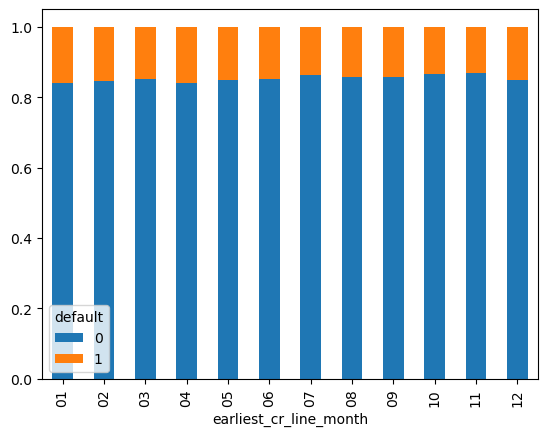

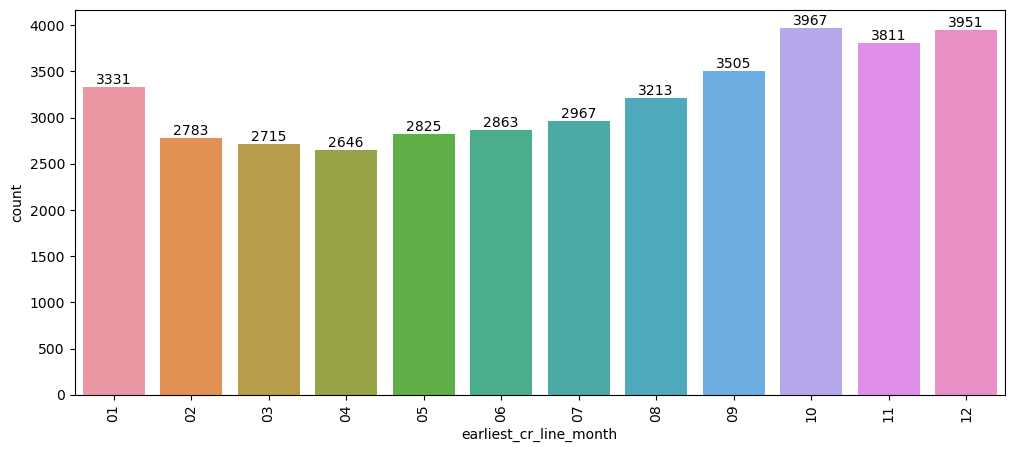

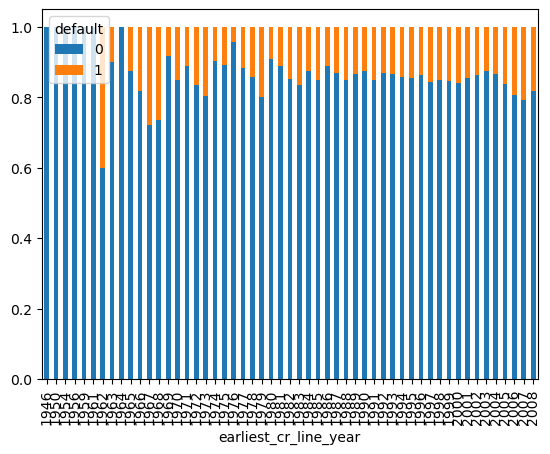

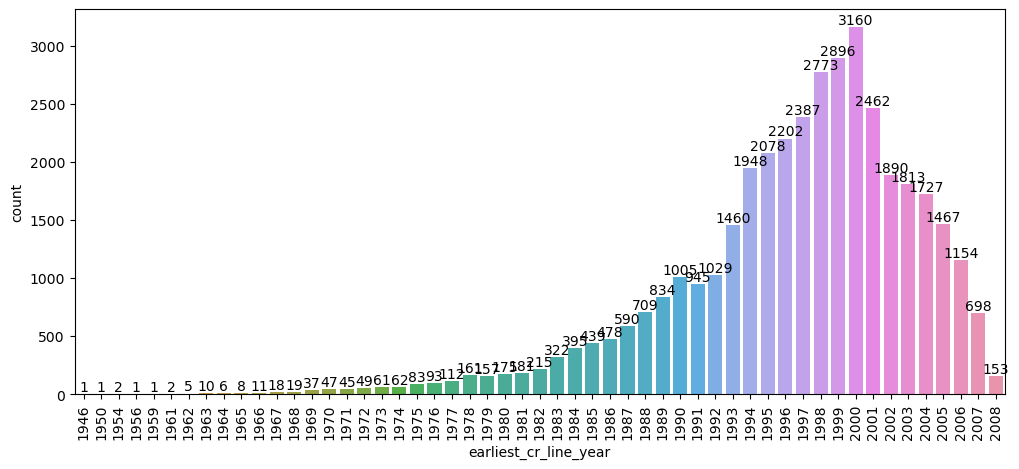

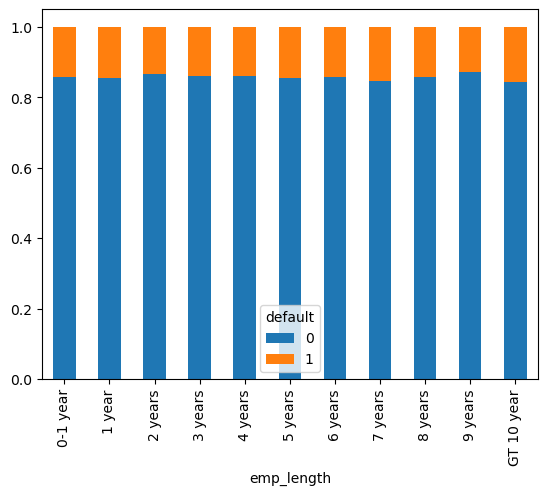

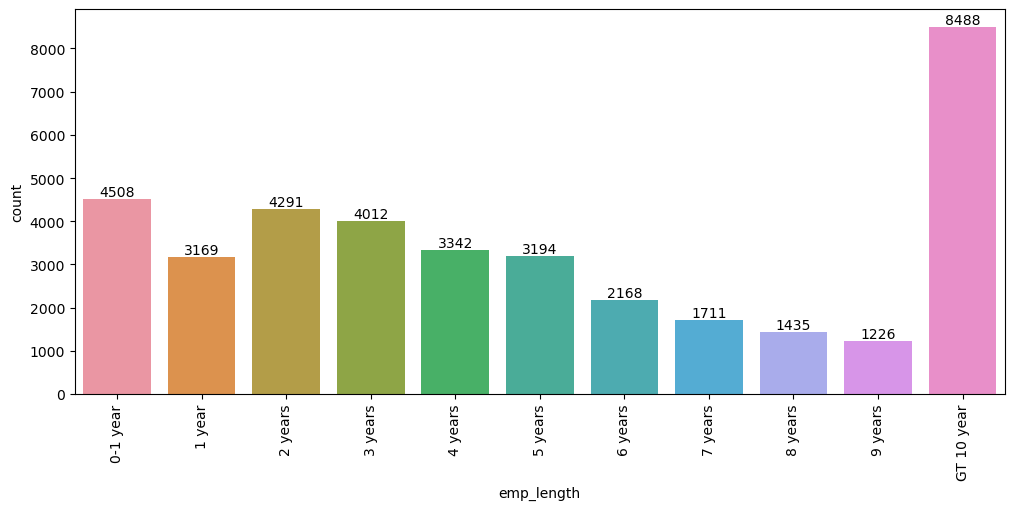

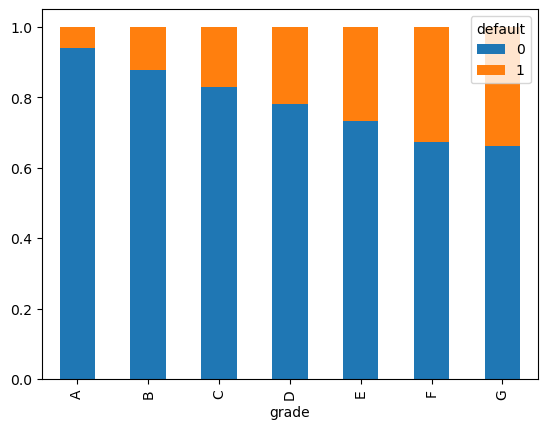

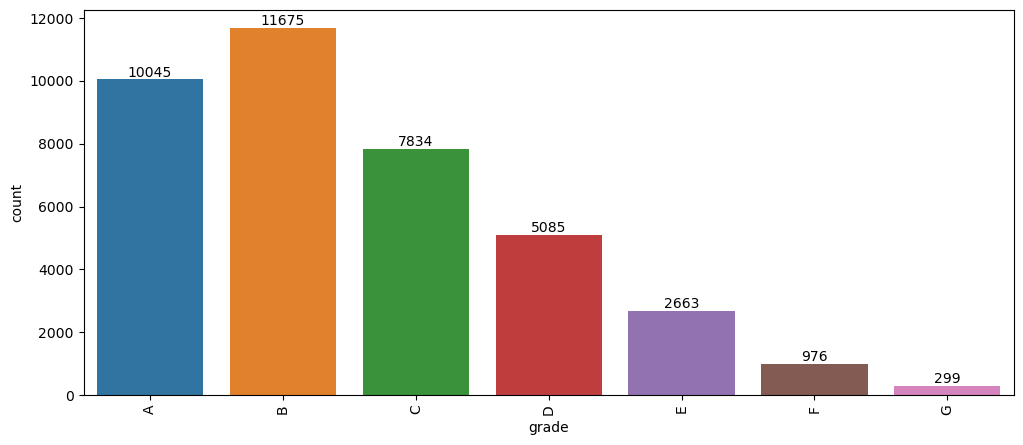

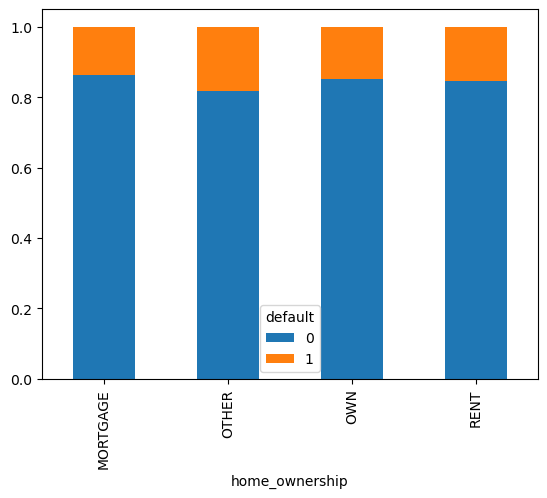

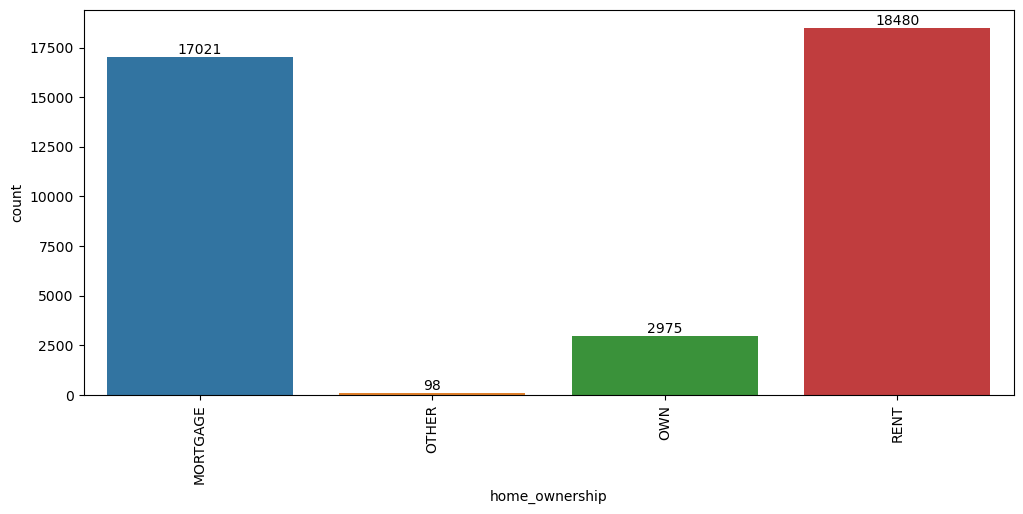

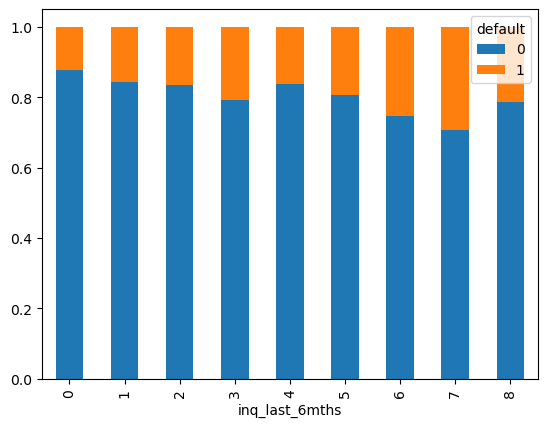

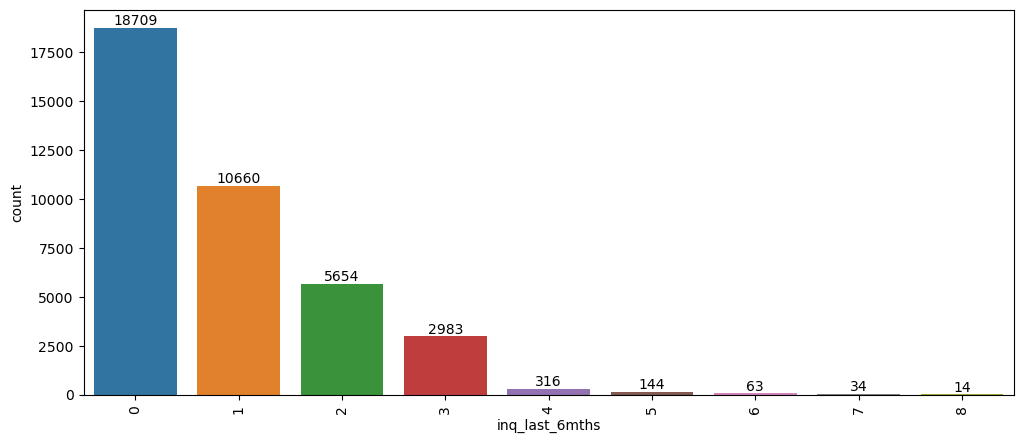

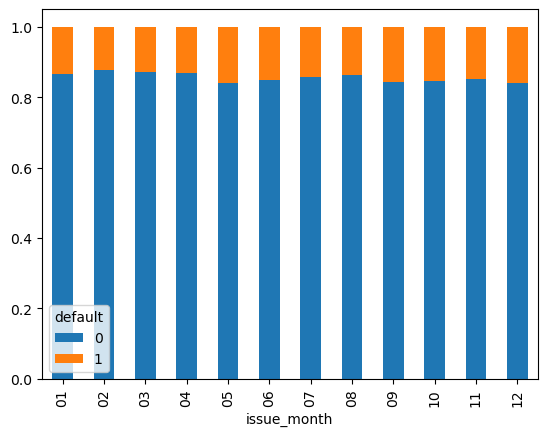

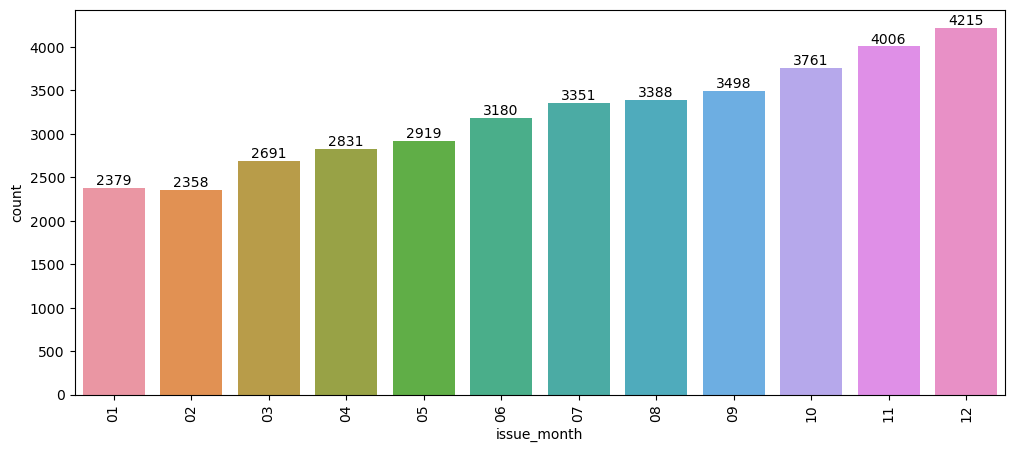

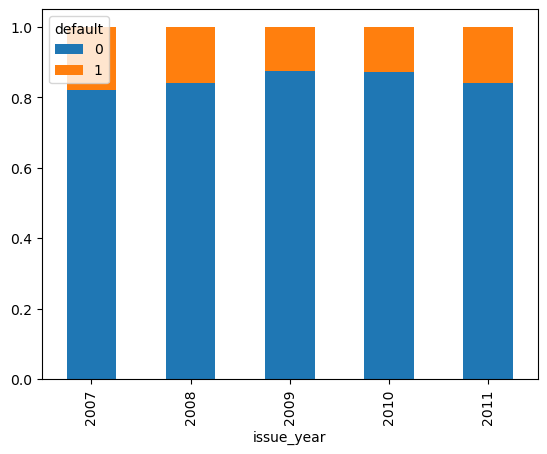

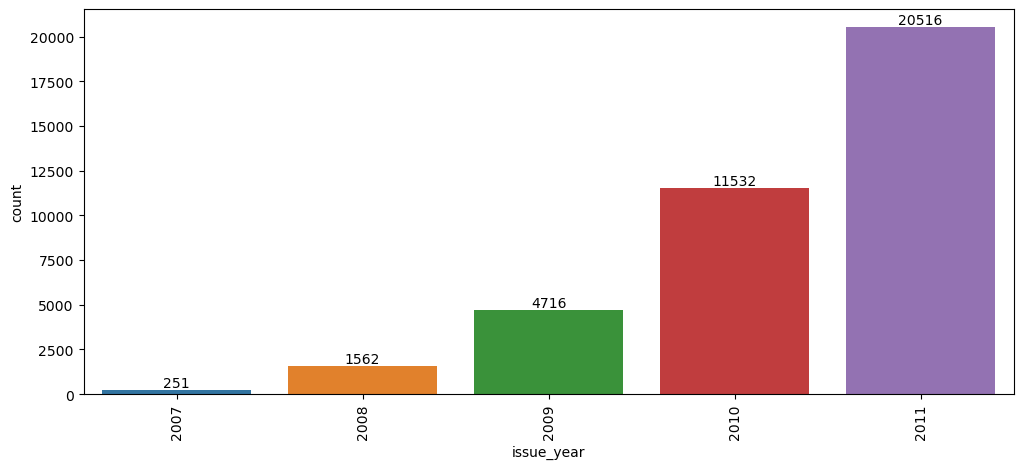

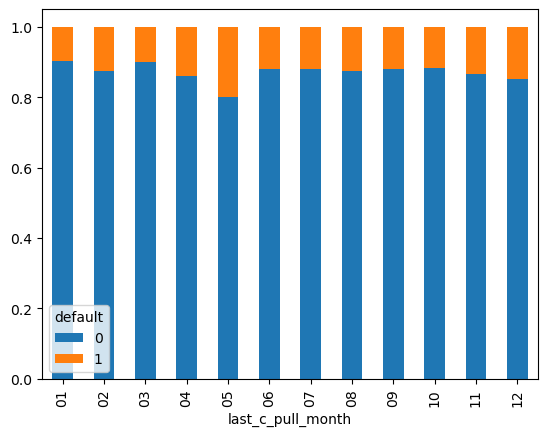

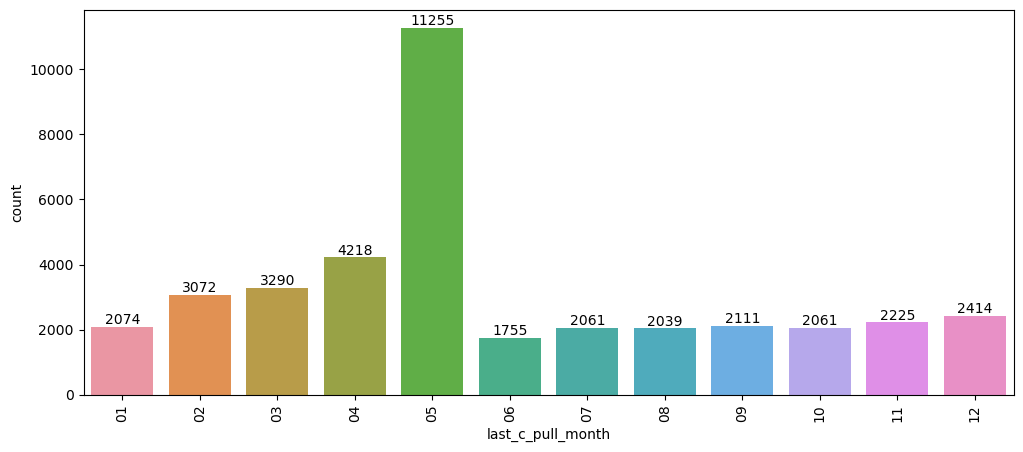

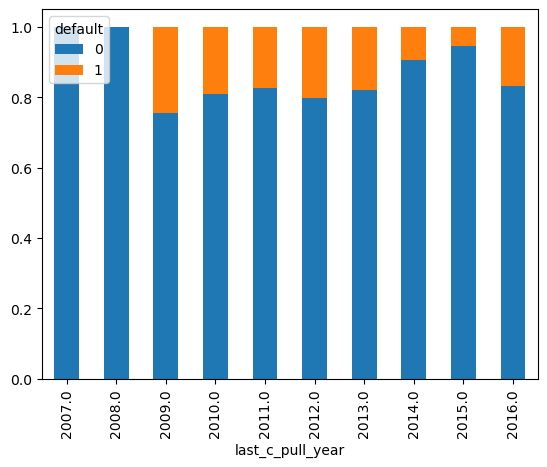

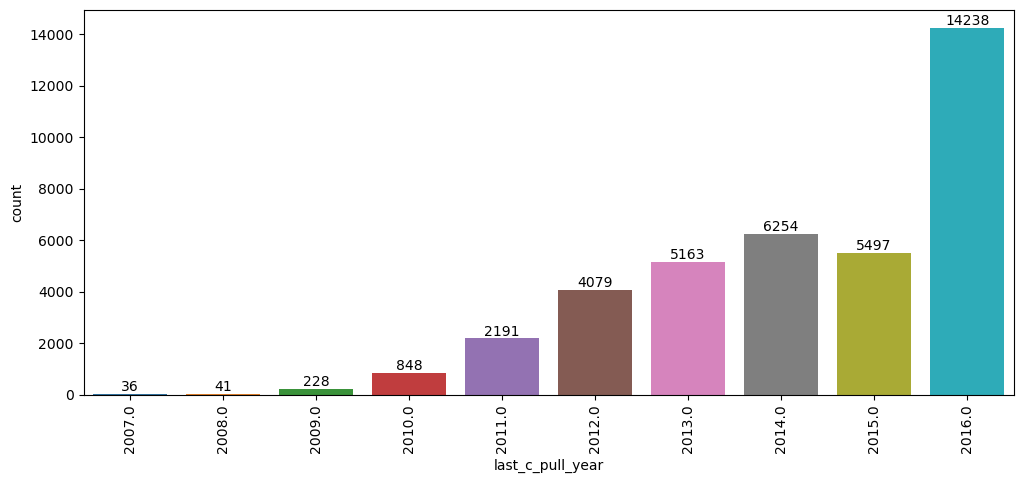

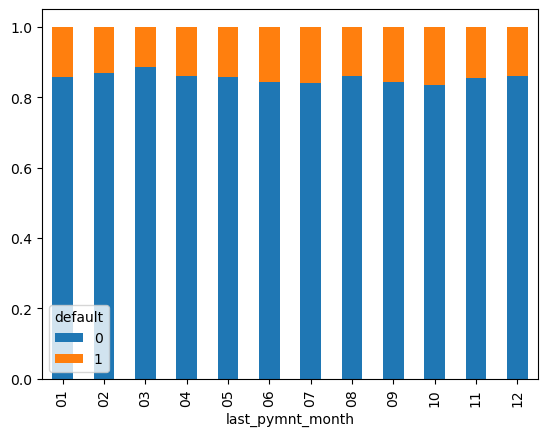

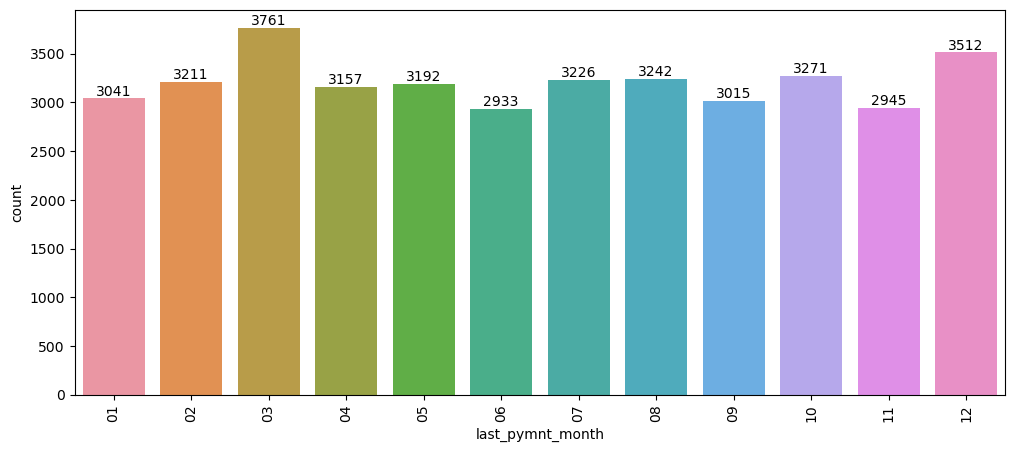

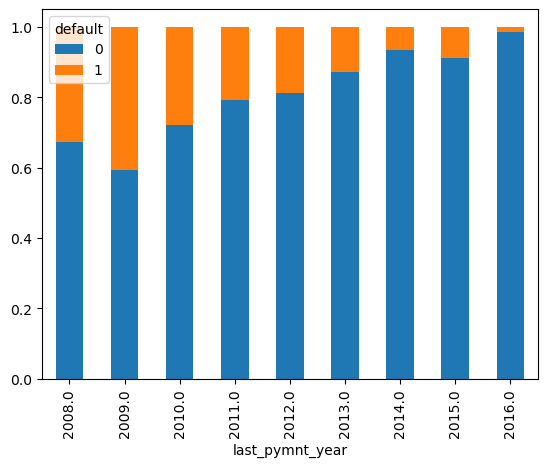

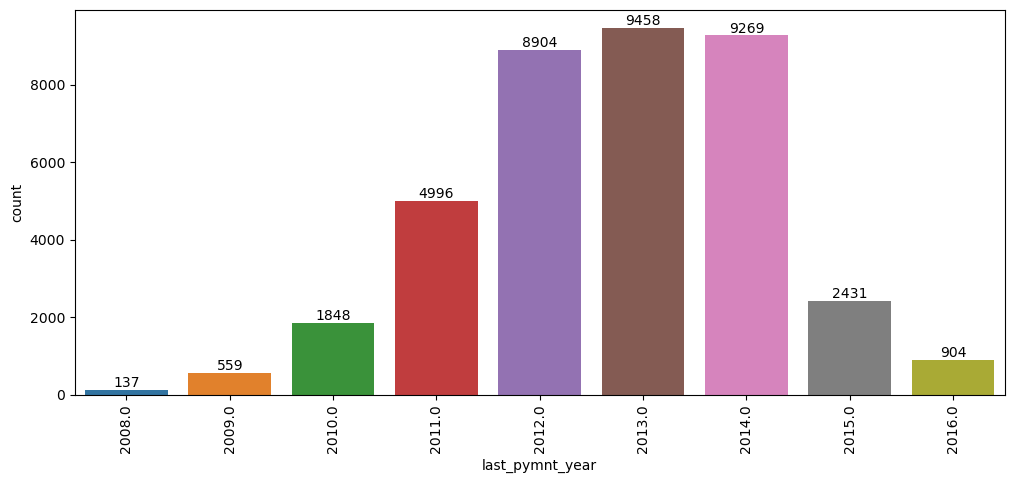

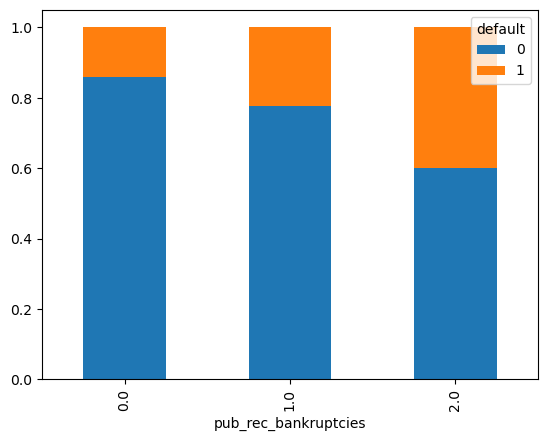

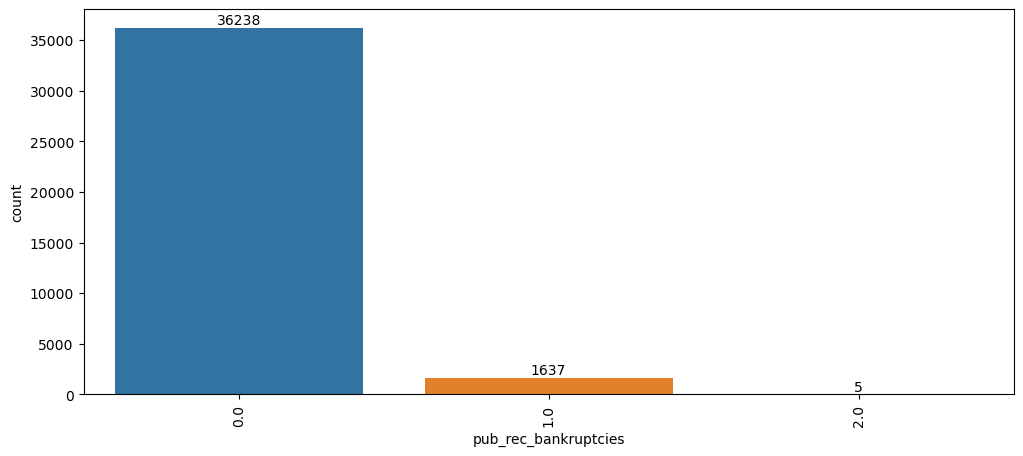

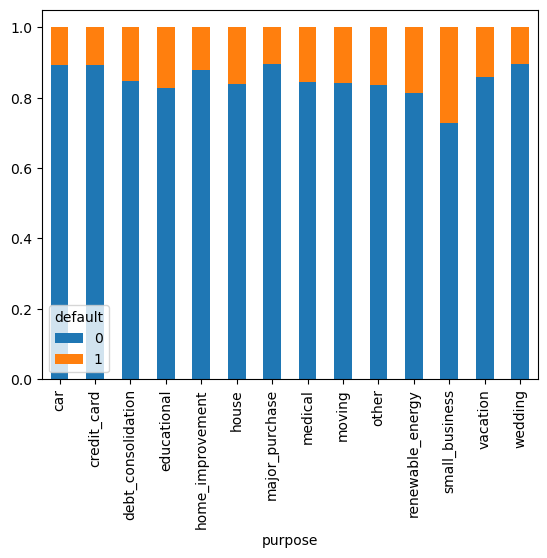

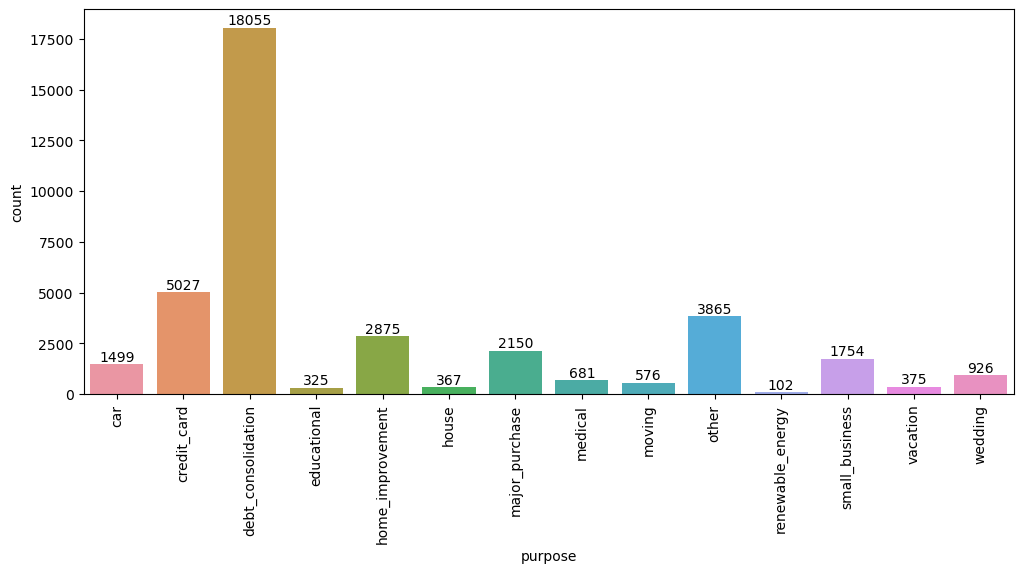

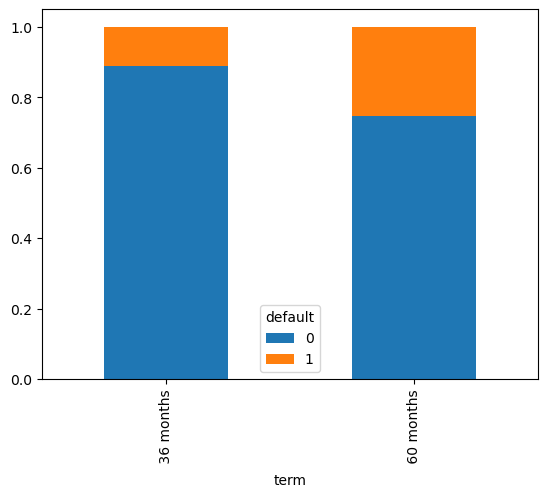

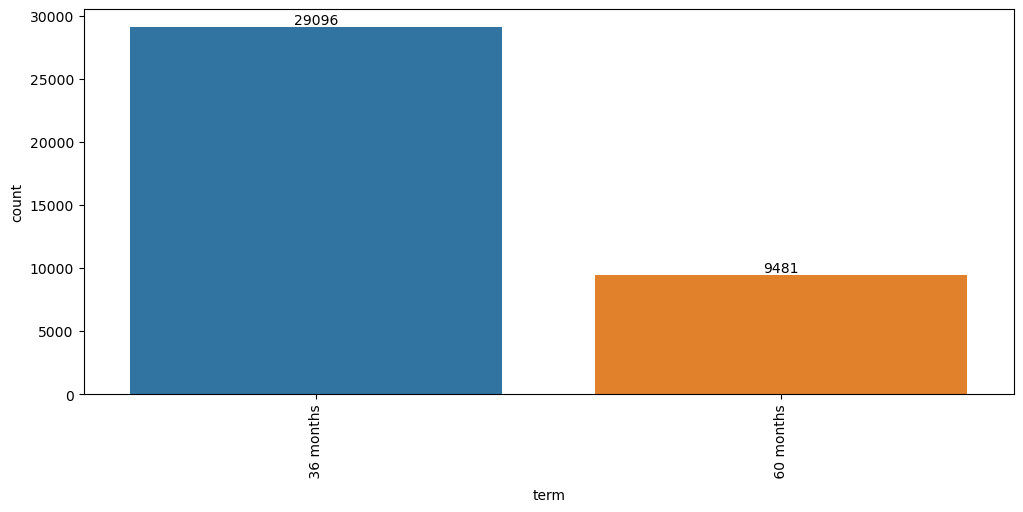

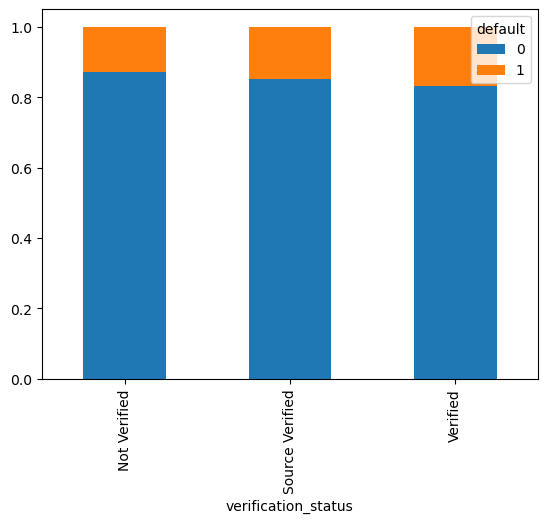

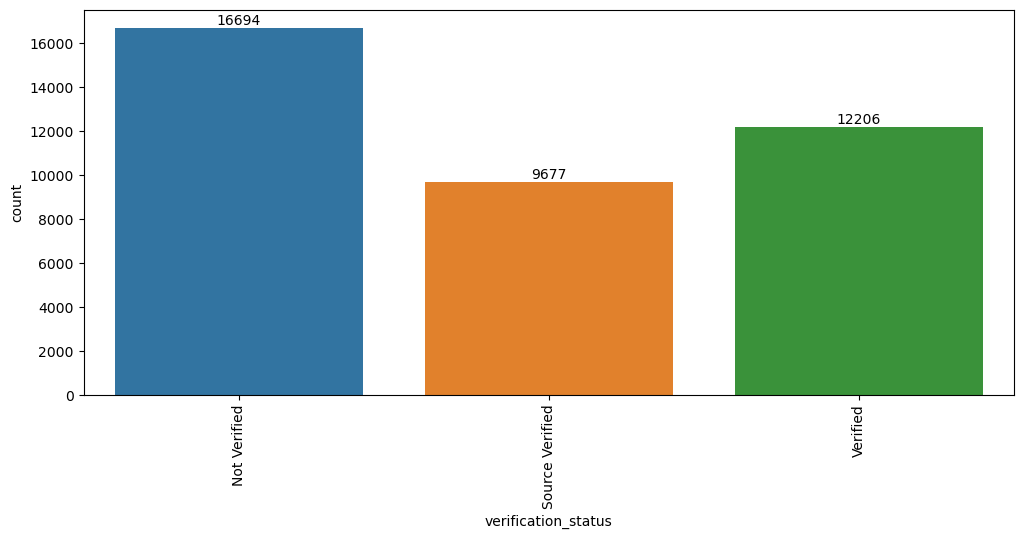

In [87]:
# We have created Countplot to check frequency
# We have created Normalized Stack Bar Chart to observe relationship with target variable
# Here we will analyse all the Qualitative variables
for col in qual_cols:
    
    #creating Normalize Stacked bar chart
    cross_df= pd.crosstab(loan[col], loan['default'], normalize='index')
    cross_df.plot(kind='bar', stacked = True)
    plt.show()
    
    ordr = loan[col].dropna().unique()
    ordr.sort()
    plt.figure(figsize=(12,5))
    
    #creating CountPlot
    ax= sns.countplot(x=loan[col], order = ordr)
    ax.tick_params(axis='x', rotation=90)
    for label in ax.containers:
        ax.bar_label(label)

    plt.show()

<font color = green> **Observations:**</font>  Here we have provided summary of univariate and bivariate analysis conducted on Qualitative variables

1) **`addr_state:`**
>1) Nominal categorical variable. These are the states of residence of loan applicants at the time of loan application.
>2) It can be observed that highest number of loans approved come from CA (California) state, followed by NY (New York), FL (Florida) and TX (Texas) states in descending order.
>3) The highest default rate is observed for NE (Nebraska) state, however for this state loan status available for only 5 loans. Therefore, this observation might not be true.
>4) There is **no trend** observed as loan default rate is similar across all the states.

2) **`delinq_2yrs:`** 
>1) Interval categorical variable. The occurrence of 30+ days past-due delinquency incidents in last 2 years, is zero for almost 90% of the data.
>2) There is a **Strong trend** of the occurrence of defaults observed if delinquency incidents increase. This conclusion is drawn based on delinquency incidents <= 3 which cover ~99% of the data.

3) **`erliest_cr_line & erliest_cr_line_month & erliest_cr_line_year:`** 
>1) Borrowers’ appetite to start taking credit increased over time and was peaked in year 2000. Pre-2000 era could be factored by increasing of financial awareness and easy credit policies over time. And, Post-2000 era indicates significant change in credit policies or decreasing of credit appetite for borrowers. 
>2) There is **no trend** was observed in monthly and yearly charts.

4) **`emp_length:`** 
>1) Ratio categorical variable
>2) It was observed that for initial 9 years of work experience, count of total loans approved is decreasing as work experience increasing, and for people having 10+ years of work experience have higher chance of loan approval. However, 10+ is a broad category which includes all people having more than 10 years of experience.
>3) **No trend** can be established with loan defaults distribution. 

5) **`grade:`**
>1) Interval categorical variable
>2) As grade decreases, count of loans sanctioned also decreases.
>3) **Strong trend** observed. As the loan grade worsens, defaults to count ratio is increasing. Which means higher is grade, riskier is the loan. 

6) **`home_ownership:`** 
>1) Nominal catagorical variable
>2) People who have 'mortgage' has lowest default rate out of all categories.
>3) People with 'other' category has shown highest default rate. However, it has very low loan count thus this observation might not be true.

7) **`inq_last_6mths:`** 
>1) Interval categorical variable
>2) **Strong trend** observed. As the number of enquiries increases the default rate also increases which means that people who are eager to take credit are also more prone to default.

8) **`issue_d & issue_month & issue_year:`** 
>1) We have observed an increasing trend of loan count from January month to December month. Likewise for loan issue years (2007 to 2011), we can clearly observe increasing loan count. 
>2) However, **No trend** observed in monthly and yearly charts

9) **`last_credit_pull_d & last_c_pull_month & last_c_pull_year:`** 
>1) Strong trend observed for total count of loans approved with Jun month with lowest loan count and May month with highest loan count. Likewise, yearly trend reflects the increasing loan count trend from 2007-2016.
>2) For May month highest default to count ratio was also observed.
>3) **No trend** observed w.r.t. default rate in monthly and yearly charts

10) **`last_pymnt_d & last_pymnt_month & last_pymnt_year:`** 
>1) **No trend** observed on monthly chart. Thus, dropping this variable from further analysis
>2) From the yearly chart, it is clearly visible that from year 2008 to 2010, default to count ratio is decreasing despite having low count of payment done by borrower. This may be attributed to subprime crisis in USA in 2008 and people were unable to pay for their loans. However this **trend is not cyclic** thus can not be predictor to loan default status.
>3) On the contrary, in 2012 to 2014, payment done by borrowers is maximum, which shows improvement in financial capacity of borrowers and lesser economic stress.

11) **`pub_rec_bankruptcies:`** 
>1) Interval categorical variable
>2) It seems **Strong trend** observed with the loan default rate where people having higher number of bankruptcies records have shown higher probability of default. However this trend may not reflect true relationship as >95% loans belong to zero bankruptcy record. In the absence of sufficient data, we **do not** consider it to be strong indicator.

12) **`purpose:`** 
>1) Nominal categorical variable
>2) People who are taking loan for 'small business' have shown highest default rate. 
>3) Total number of loan counts are highest for debt consolidation

9) **`term:`** 
>1) Ratio categorical variable
>2) Count of loans is decreasing as loan tenure is increasing.
>2) **Strong trend** observed with the target variable. Loan with 60 months of tenure has higher chances of getting default.

10) **`total_acc & total_acc_grp:`**
>1) **No trend** observed

11) **`verification_status:`**
>1) Ordinal categorical variable
>2) **Strong trend** observed with the loan default rate. Verified category has shown the highest default to count ratio

<hr>

## <font color = blue> Multi-variables analysis with target variable </font>

As mentioned in above section, to perform multivariable analysis with target variable, we have **selected** those variables whose have shown **strong relationship** with loan default rate.

We have also selected **Nominal categorical variables** for this analysis becasue they cannot be ordered, no trend can be visualize.

In [88]:
# defining a function of Unique Combination Pairs for list of elements
def uniqueCombinations(list_elements):
    l = list(itertools.combinations(list_elements, 2))
    s = set(l)
    return list(s)

In [89]:
Strong_indicators = ['annual_inc_grp', 'dti_grp', 'int_rate_grp', 'last_pymnt_amnt_grp', 'revol_util_grp', 
                     'delinq_2yrs', 'grade', 'home_ownership', 'inq_last_6mths', 'purpose', 'term', 'verification_status']
Strong_indicators_pairs = uniqueCombinations(Strong_indicators)

For multivariate analysis, we have plotted **Heatmap** in which mean of loan default rate is observed in the grid blocks.

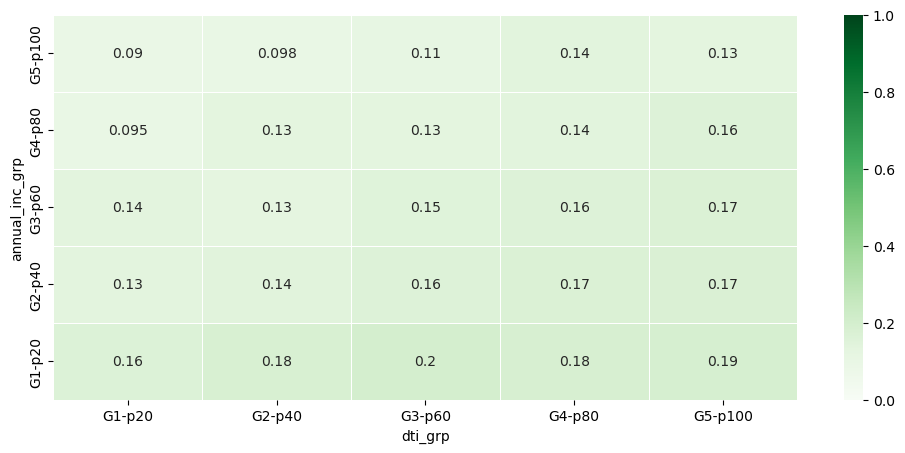

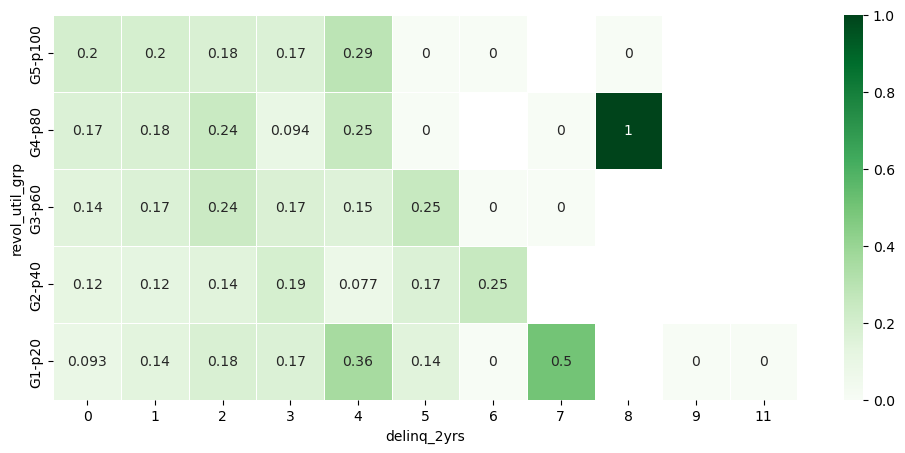

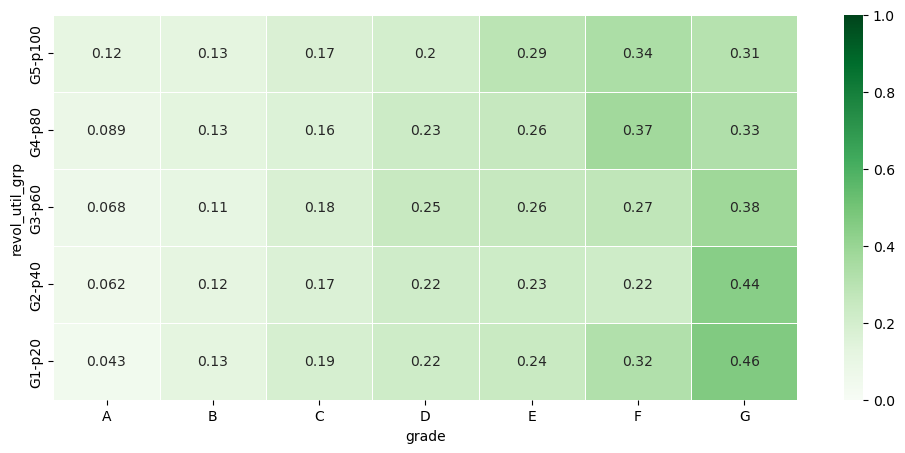

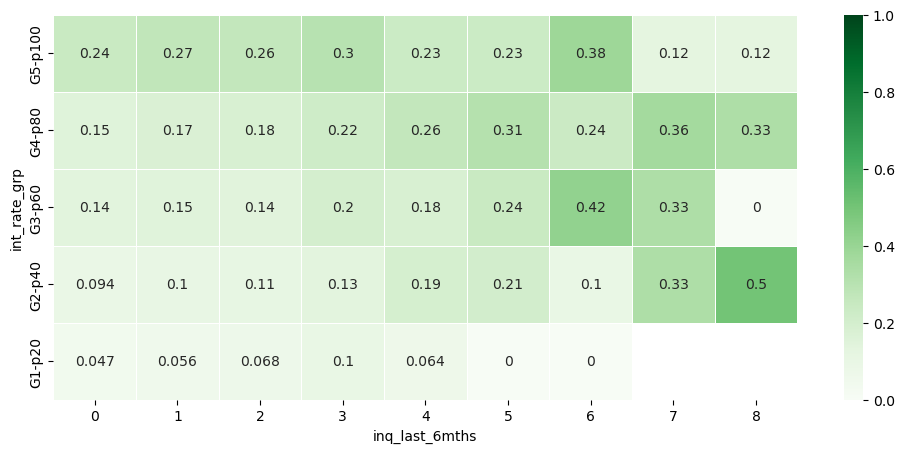

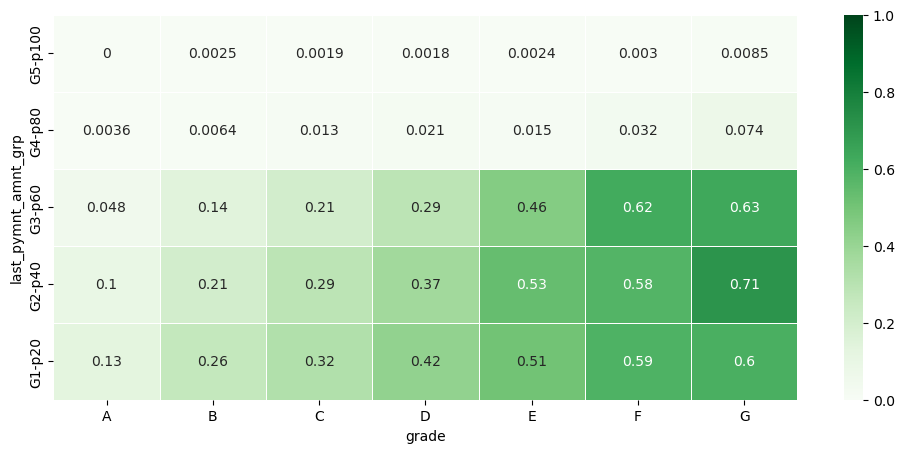

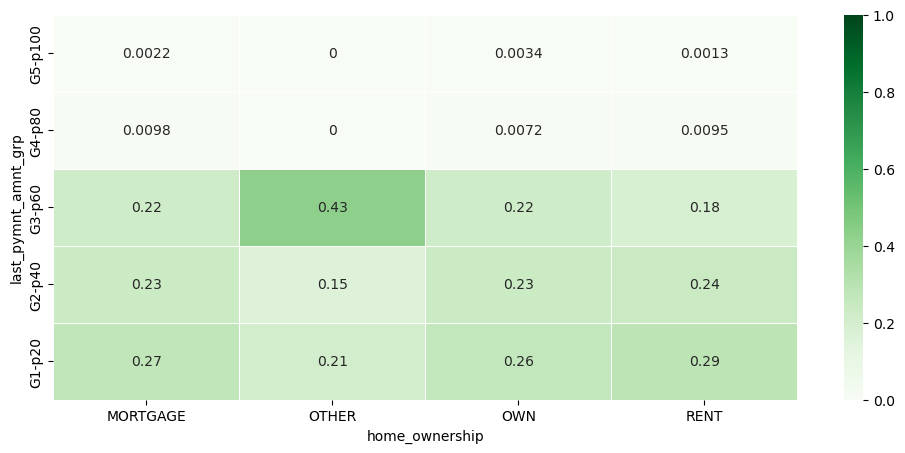

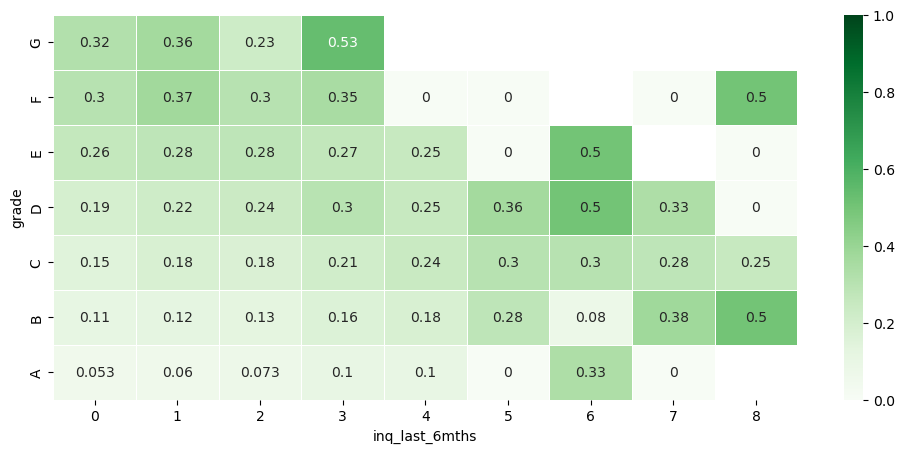

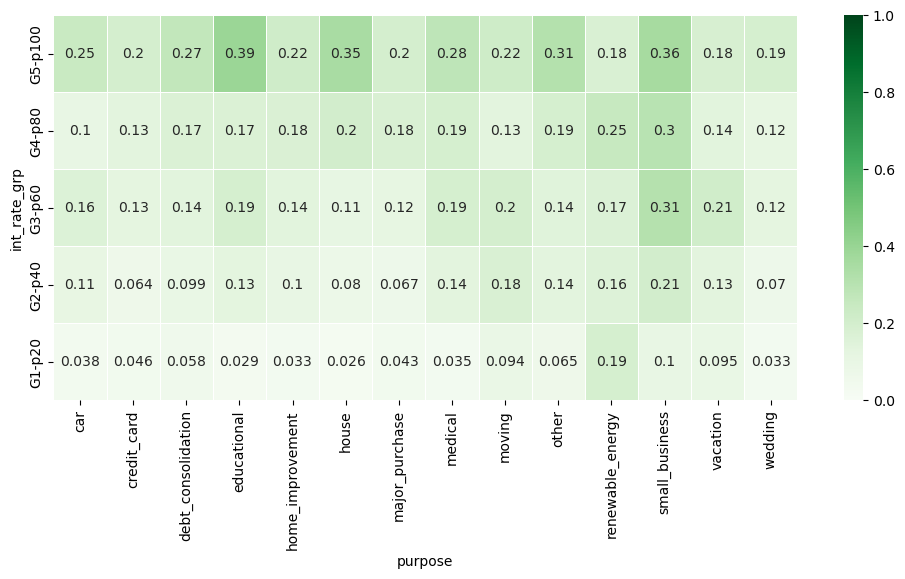

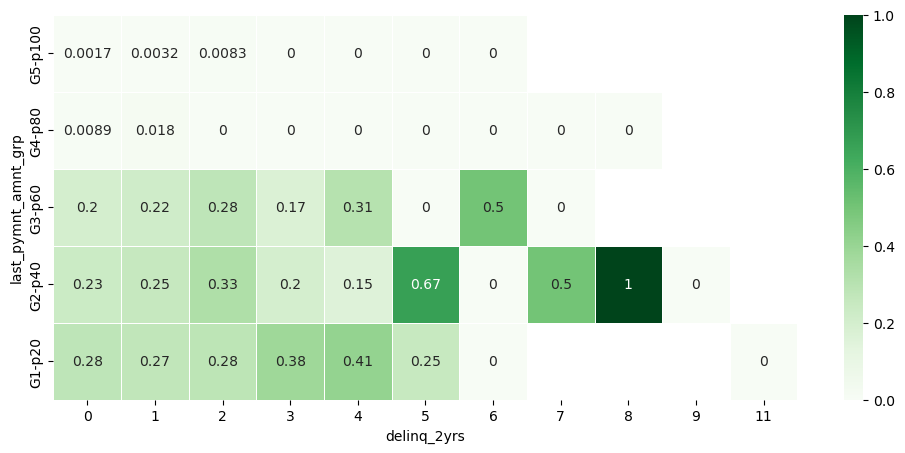

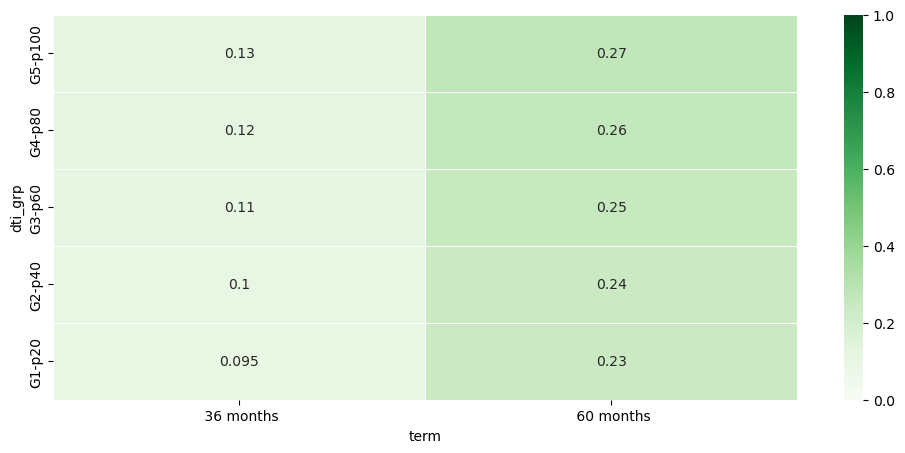

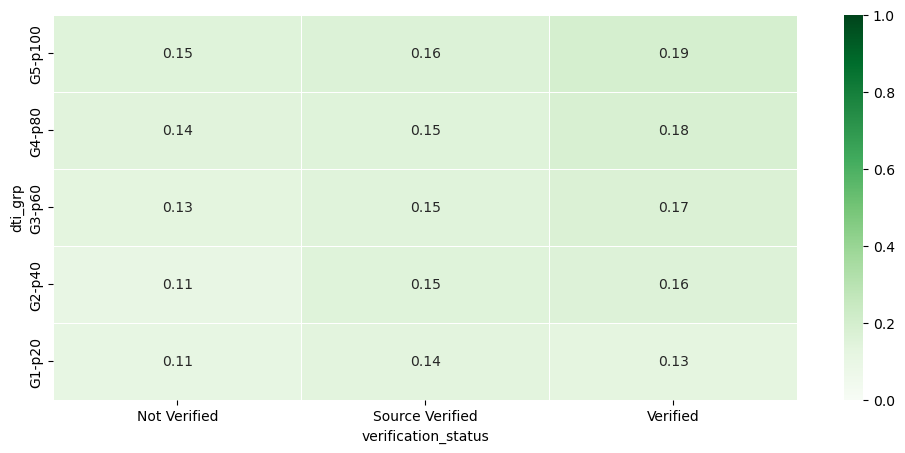

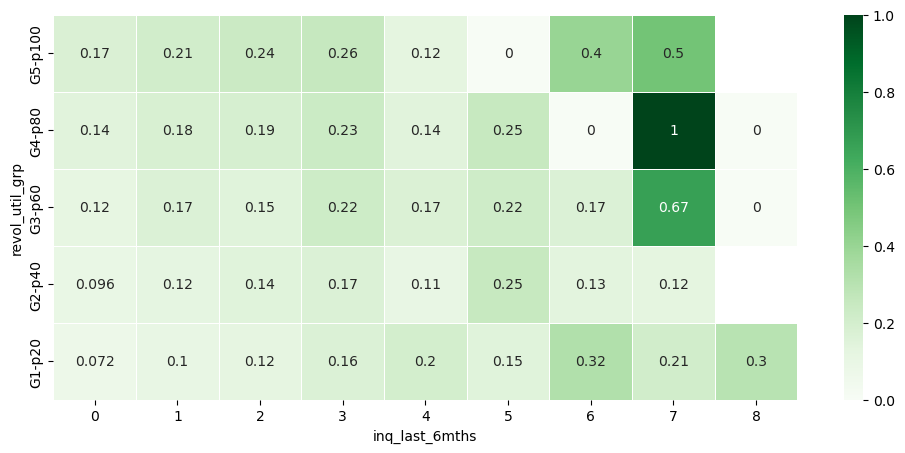

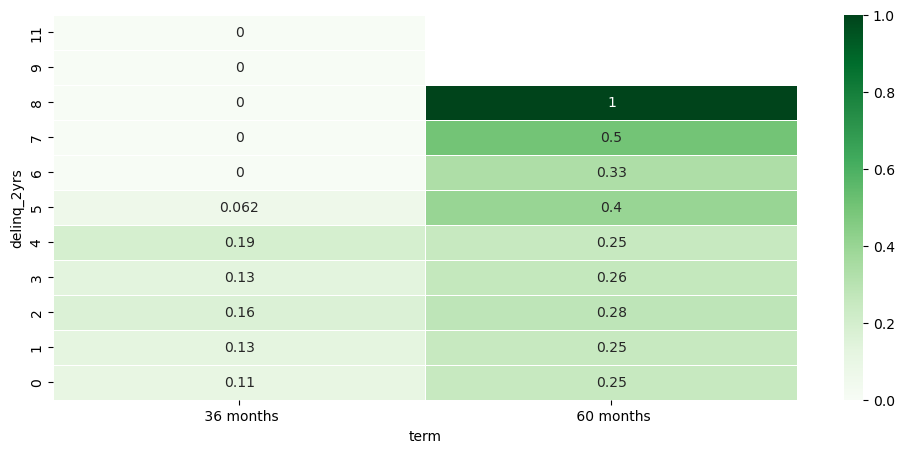

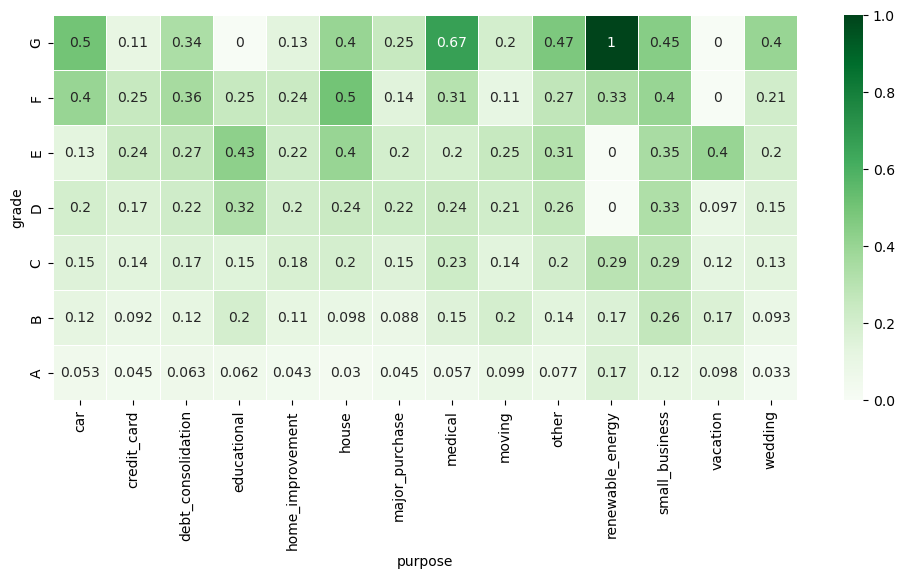

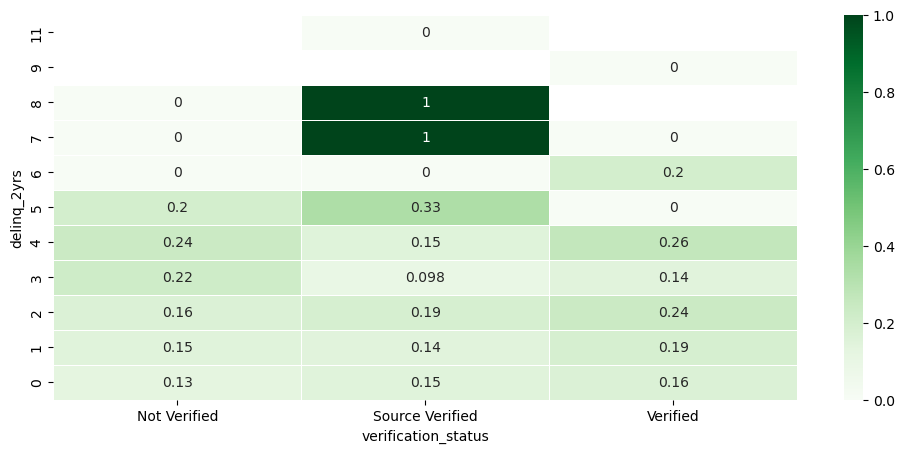

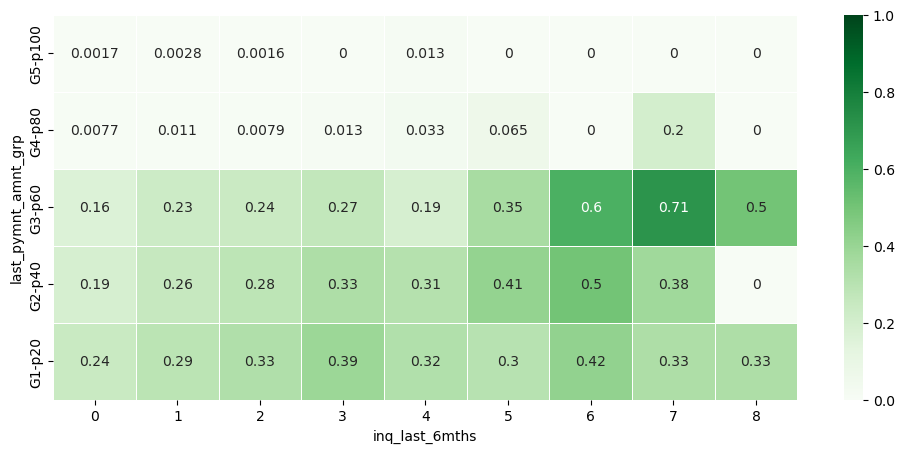

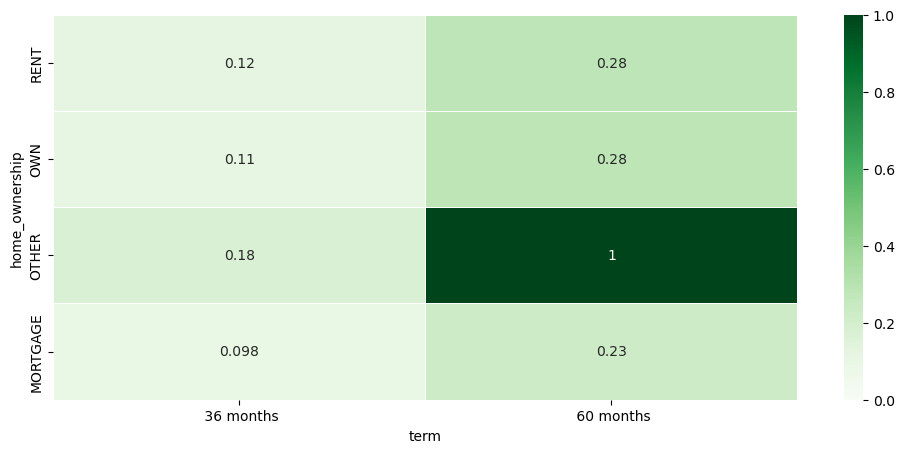

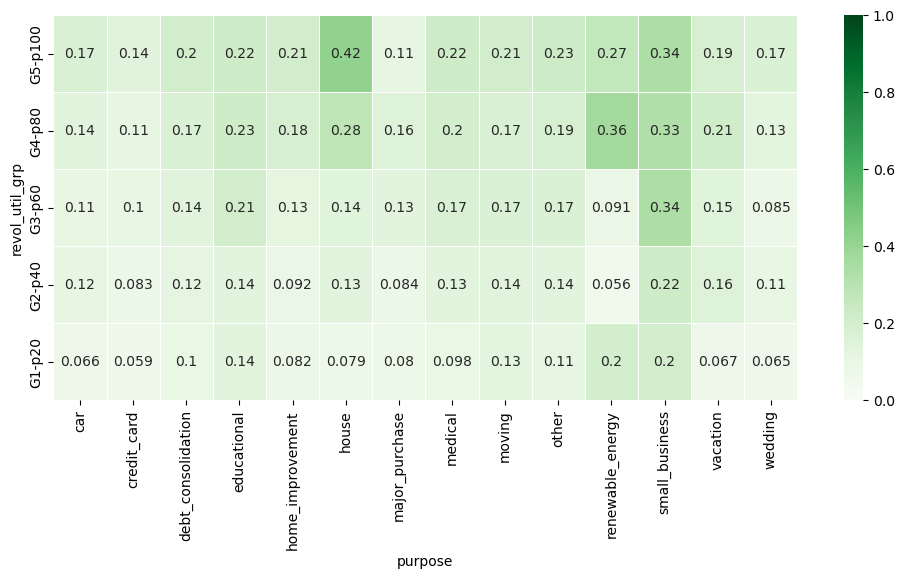

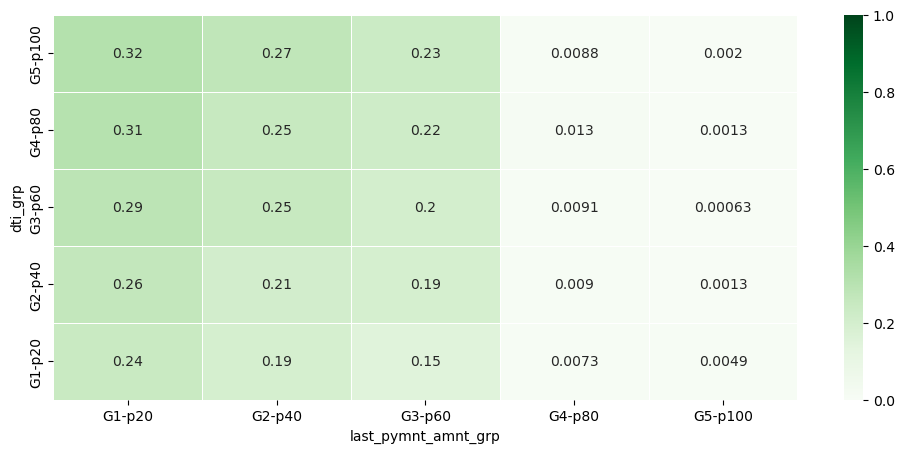

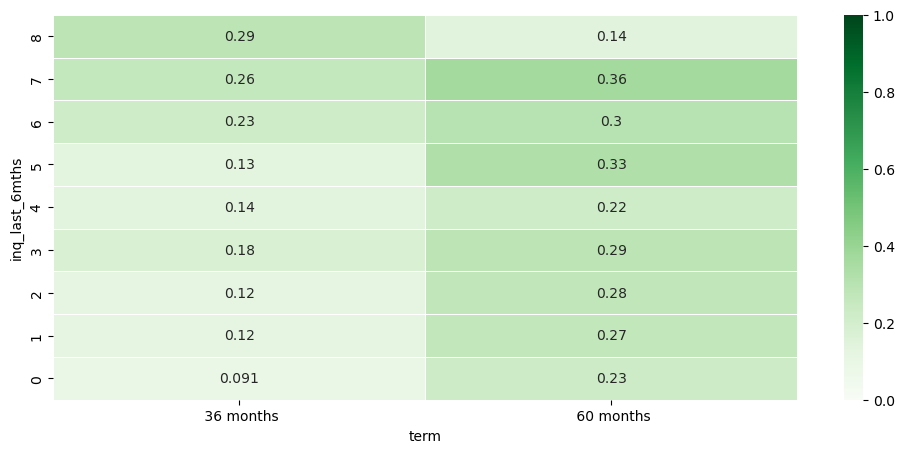

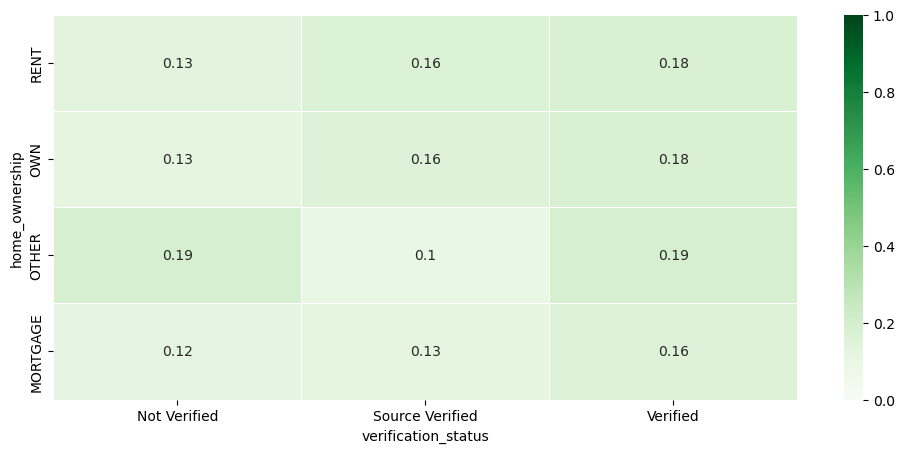

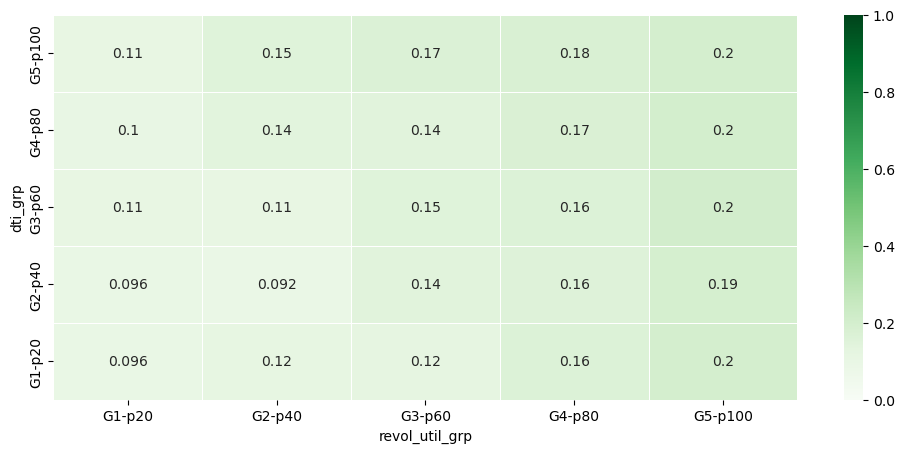

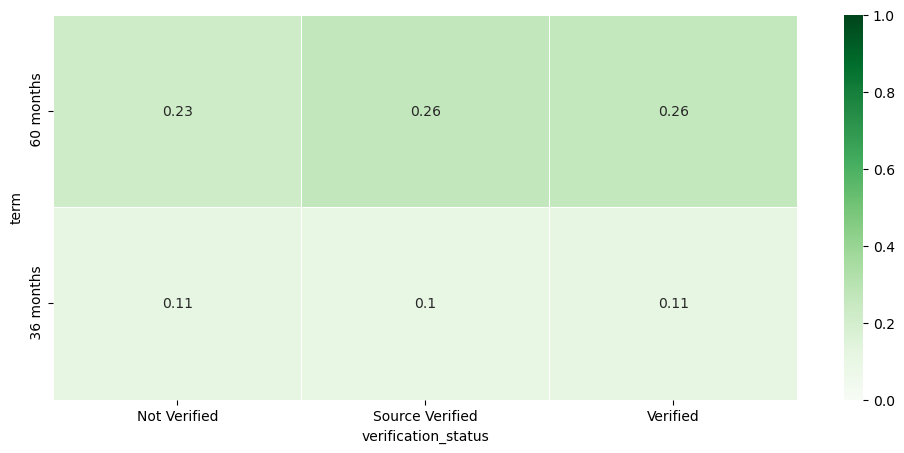

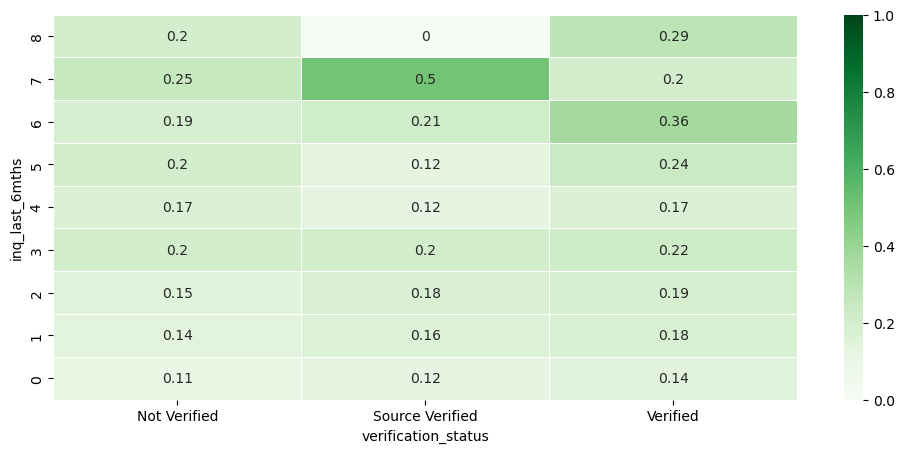

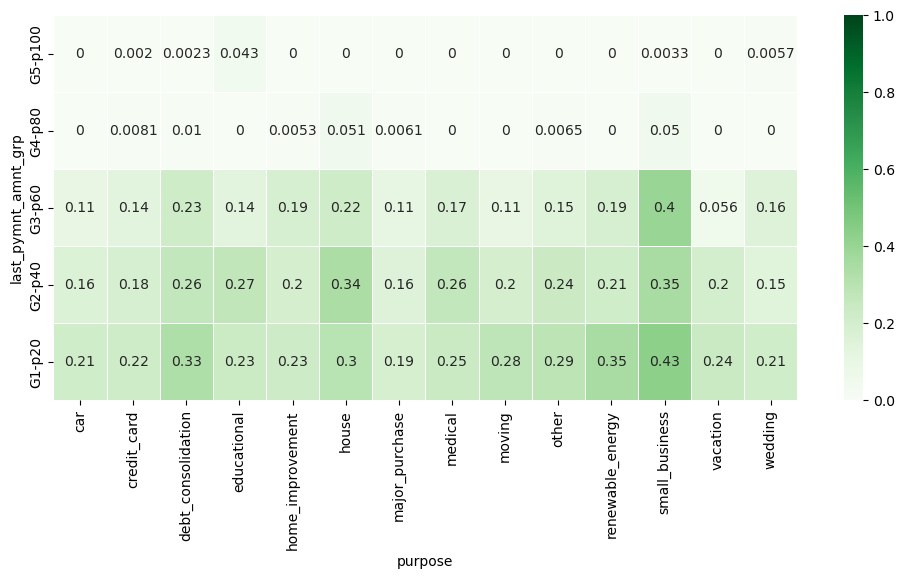

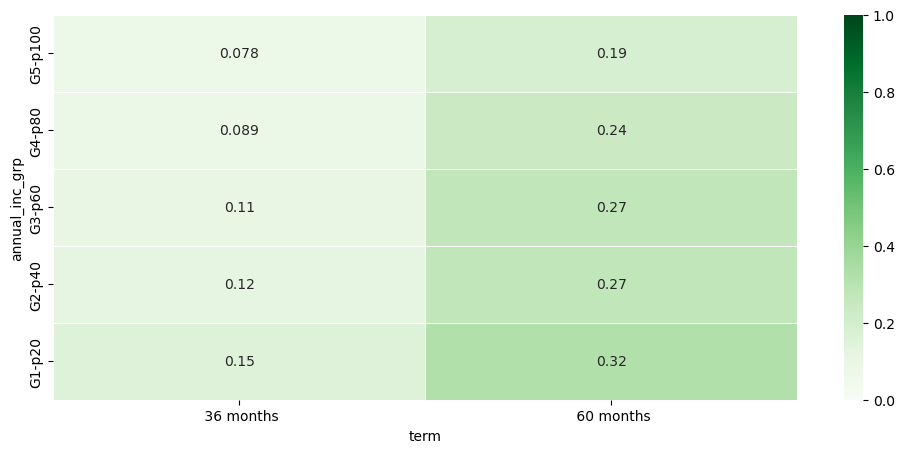

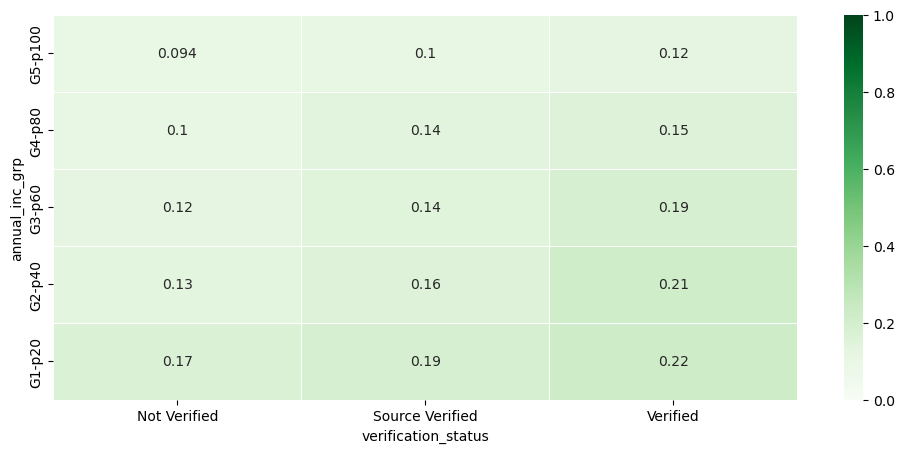

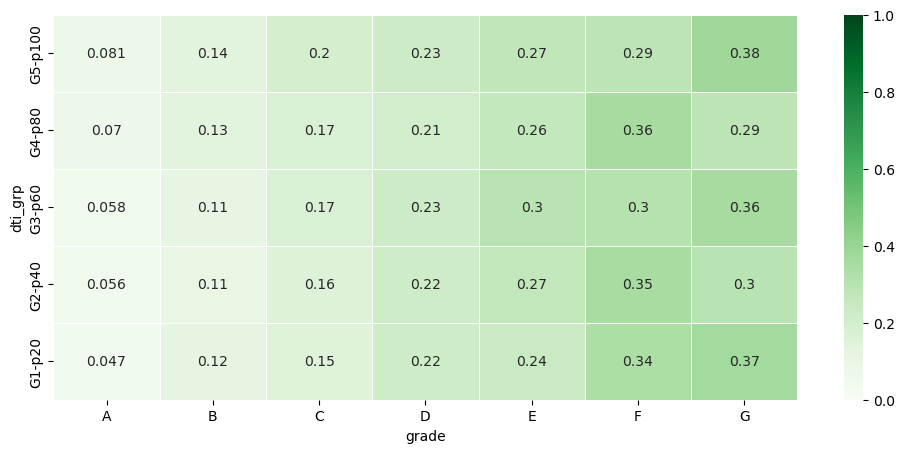

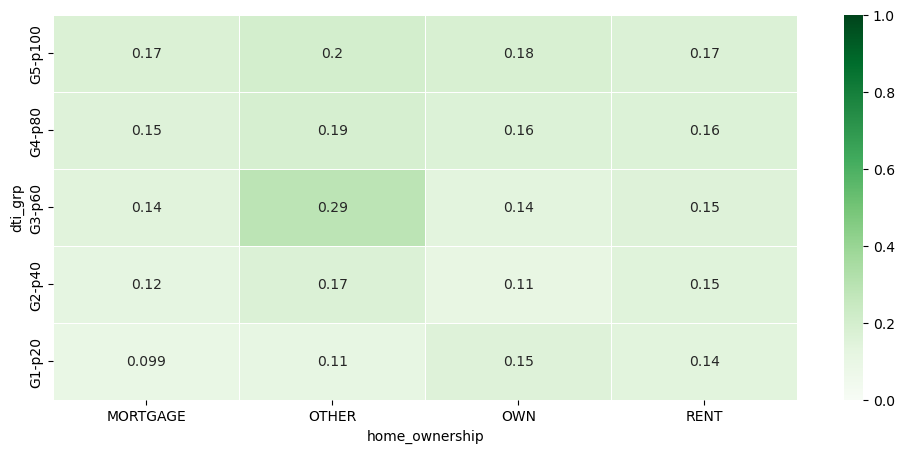

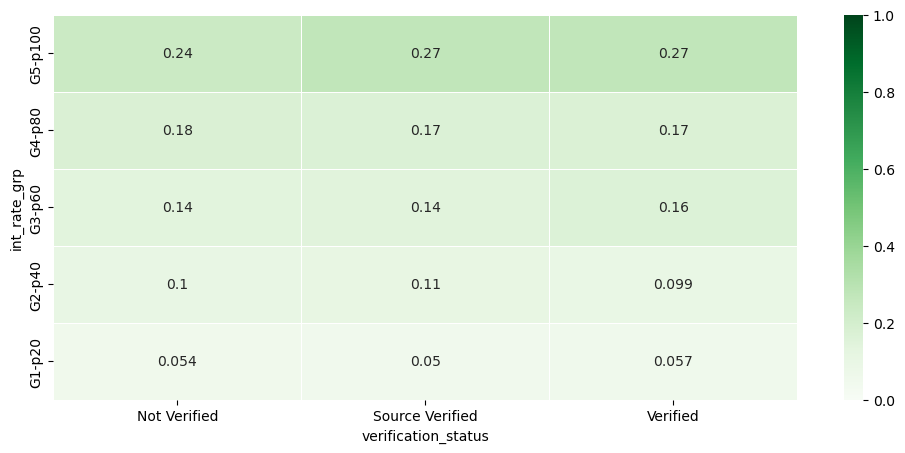

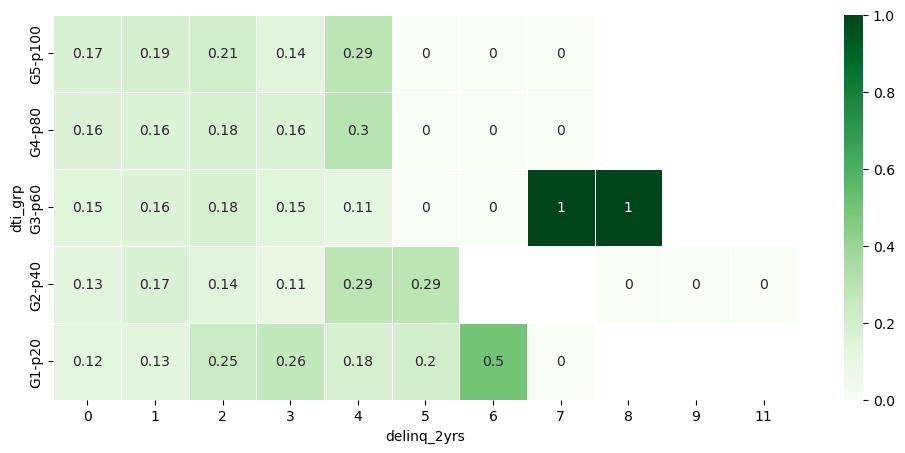

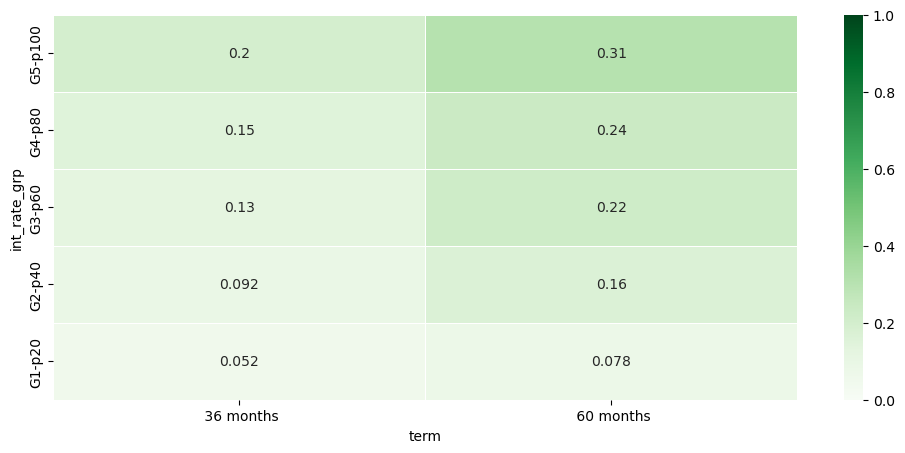

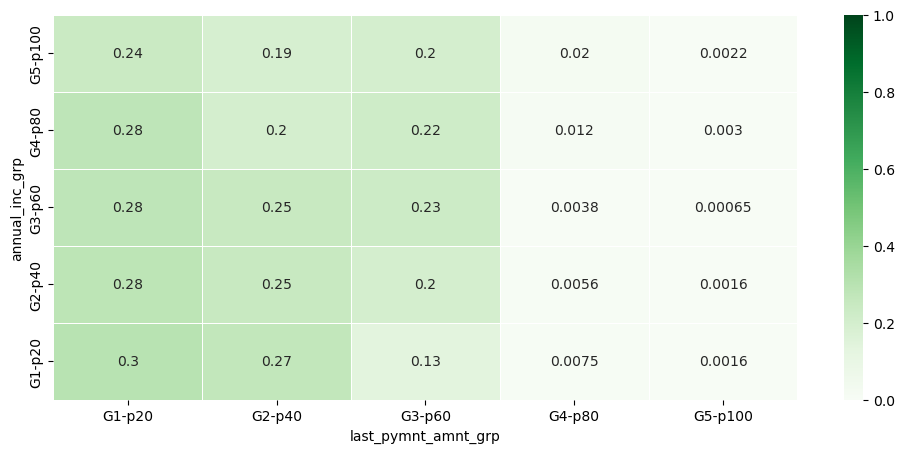

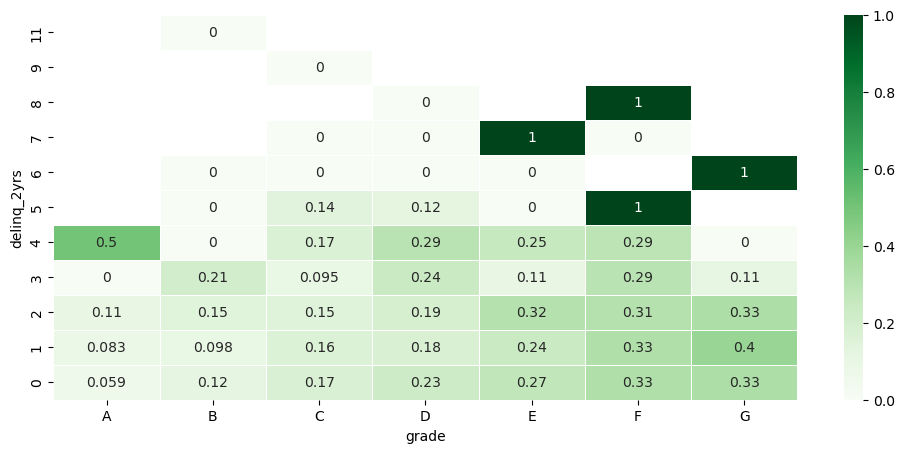

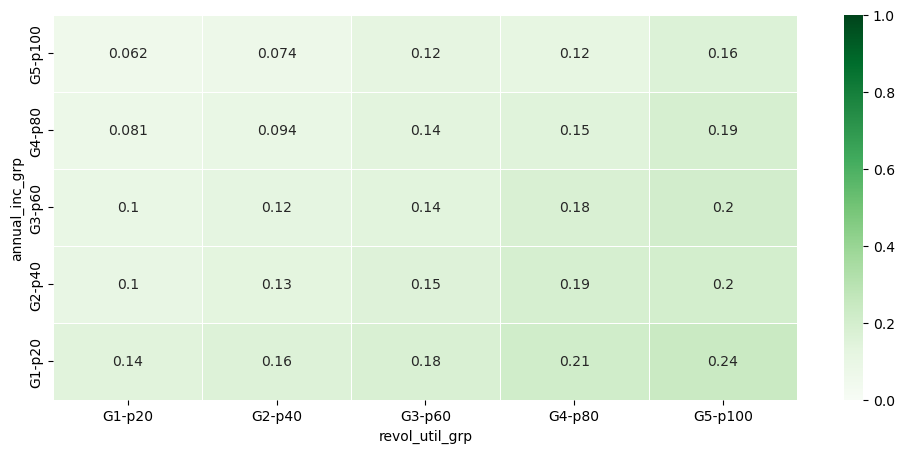

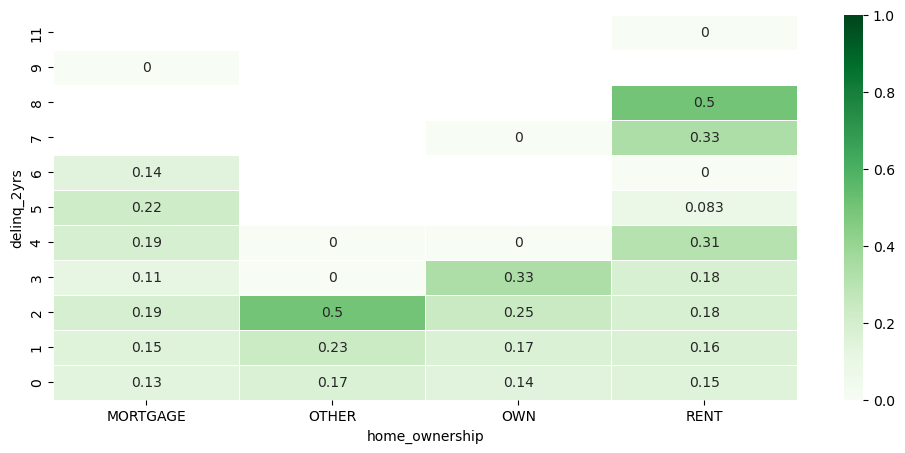

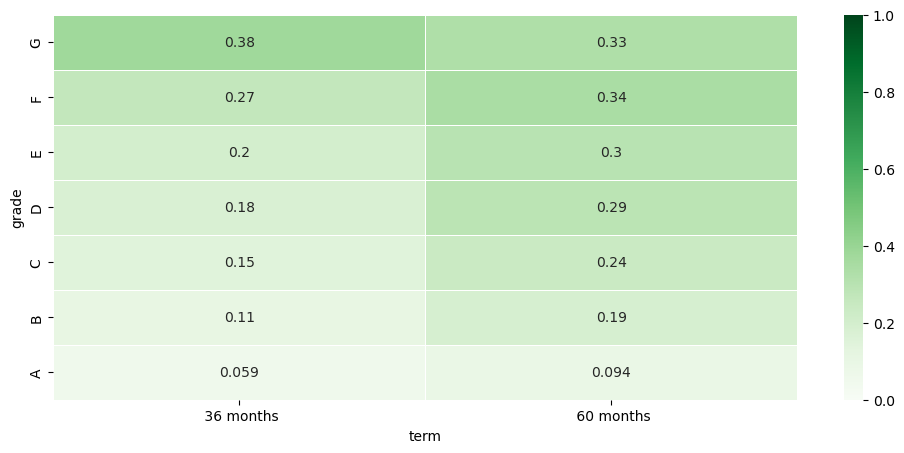

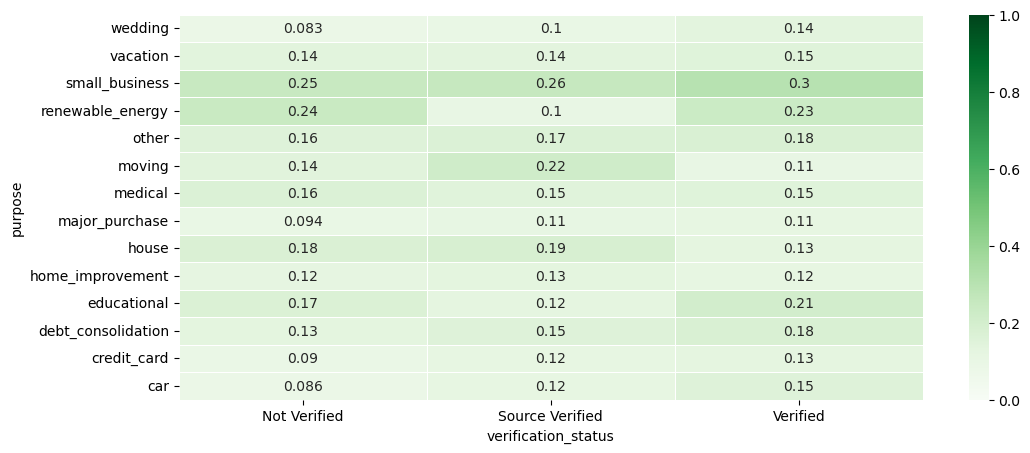

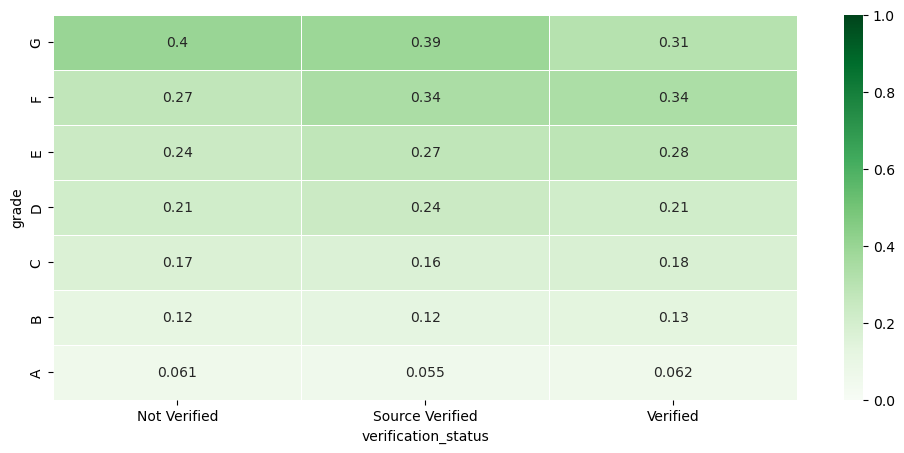

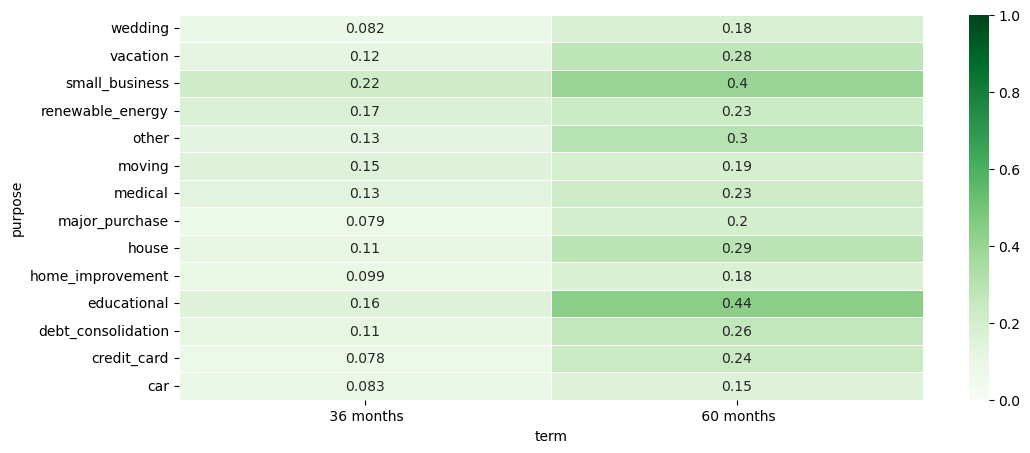

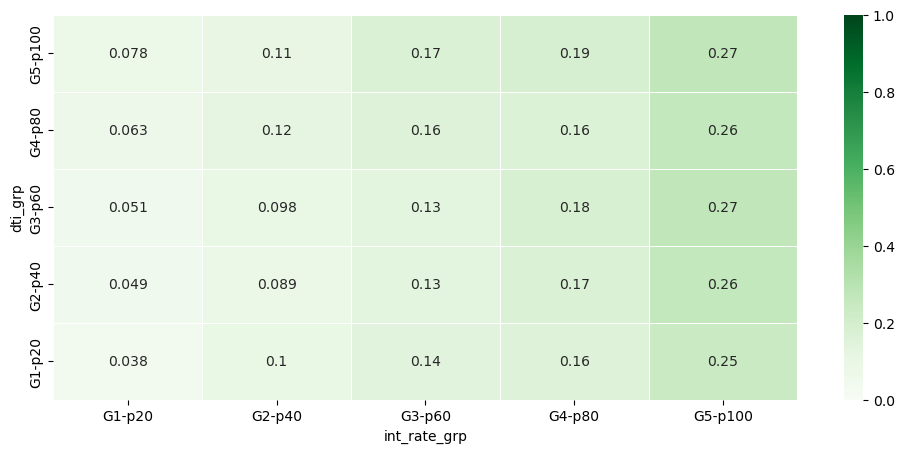

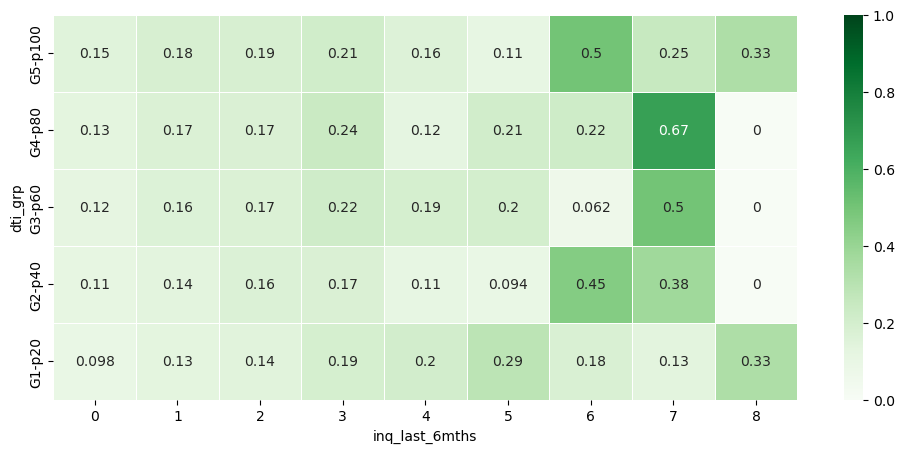

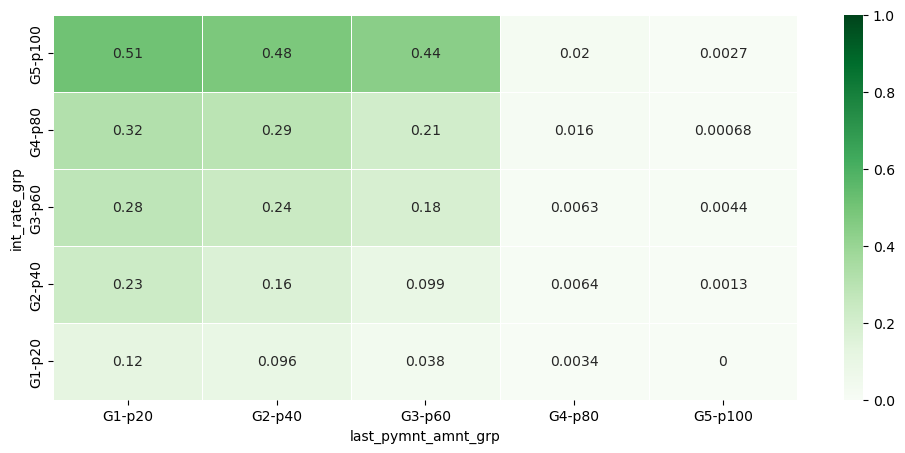

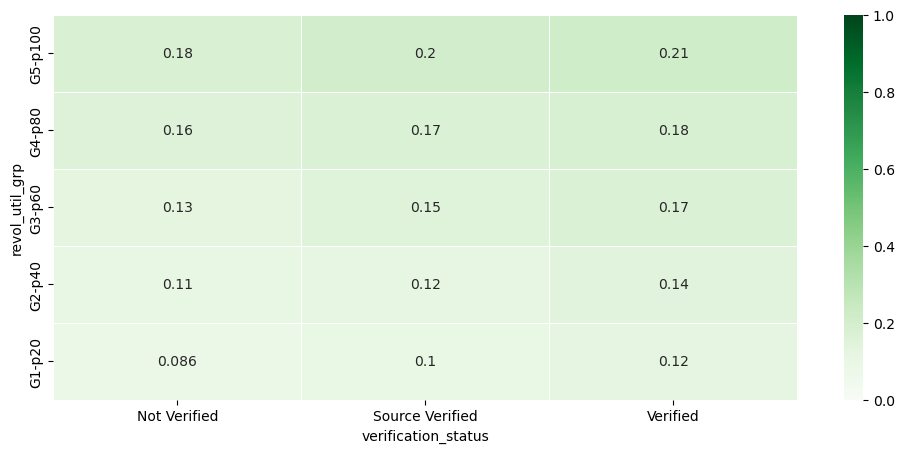

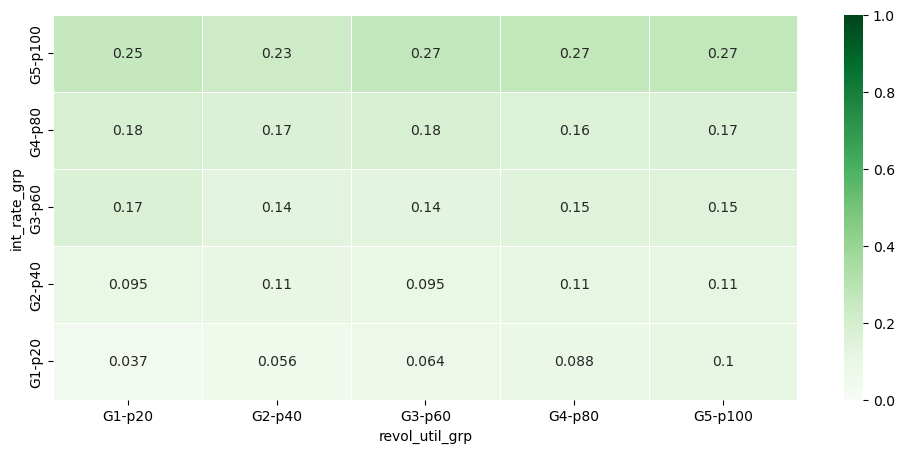

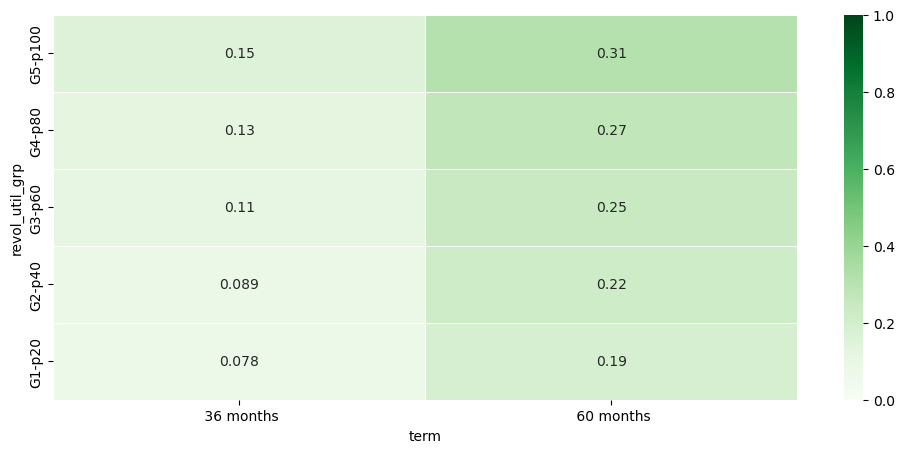

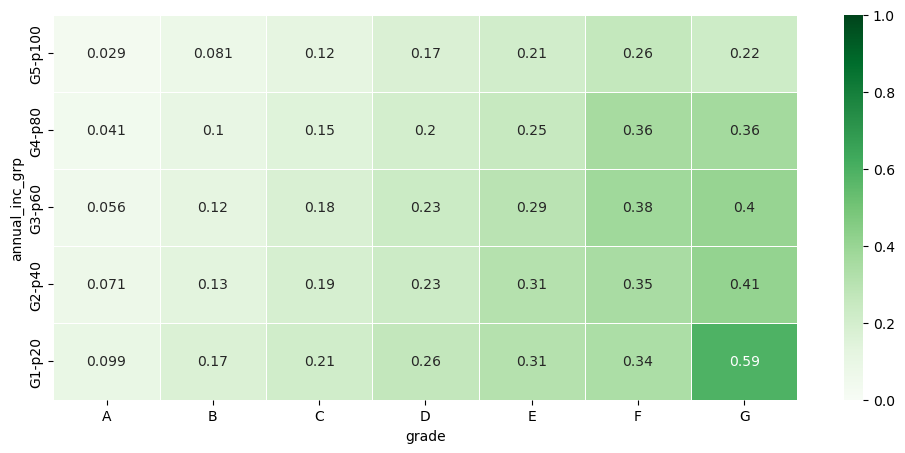

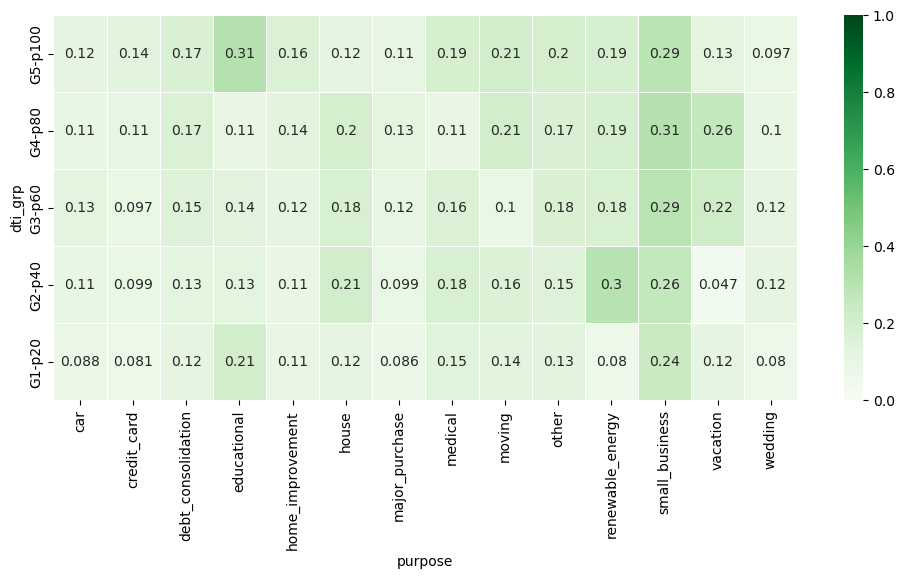

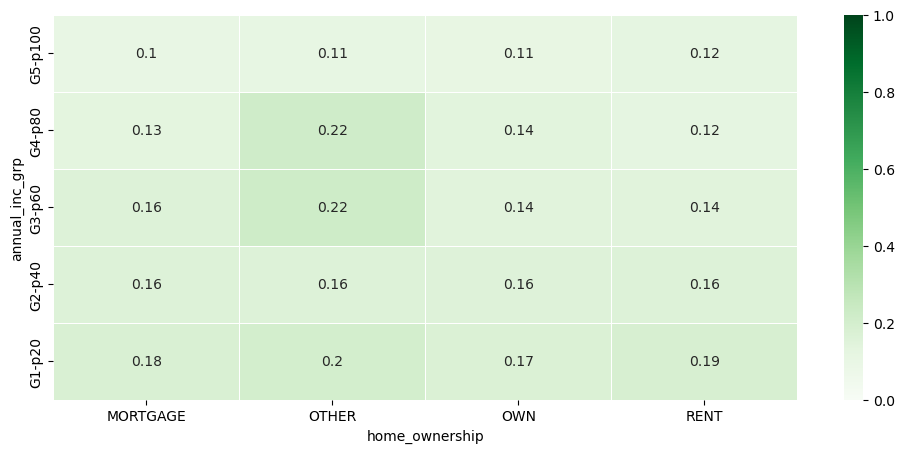

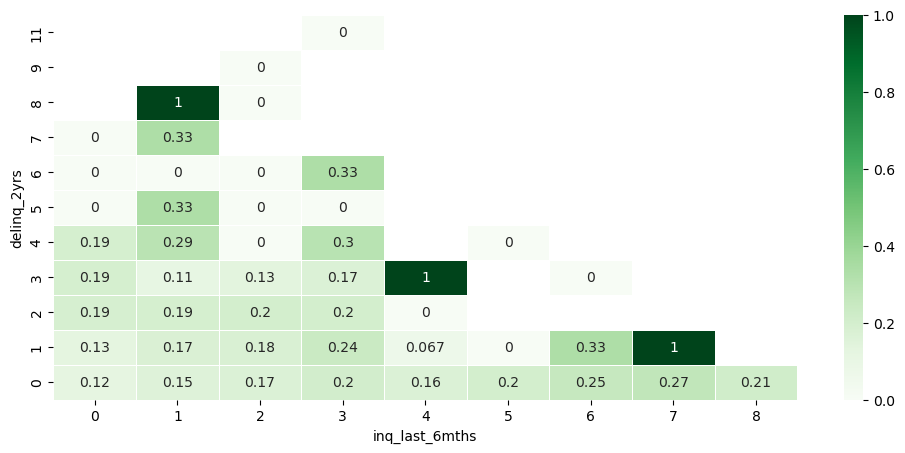

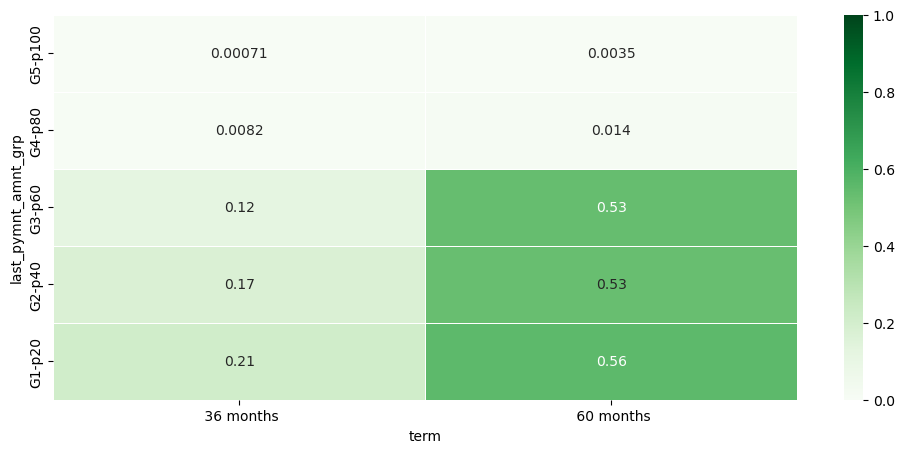

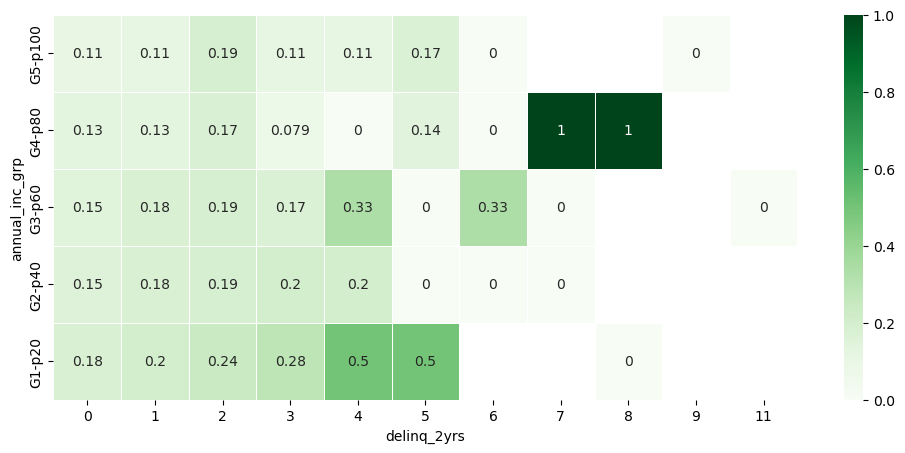

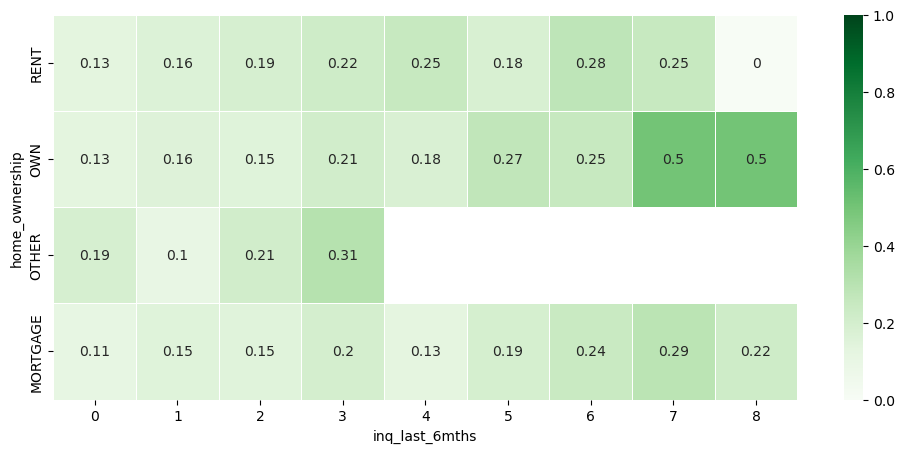

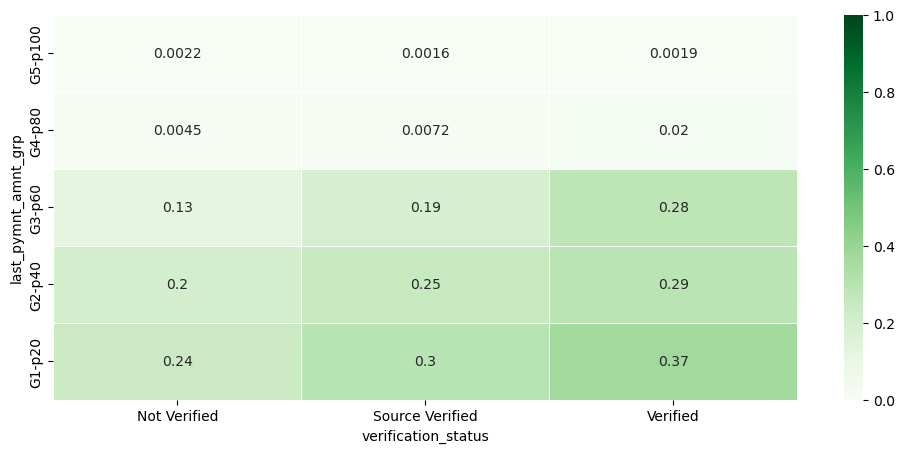

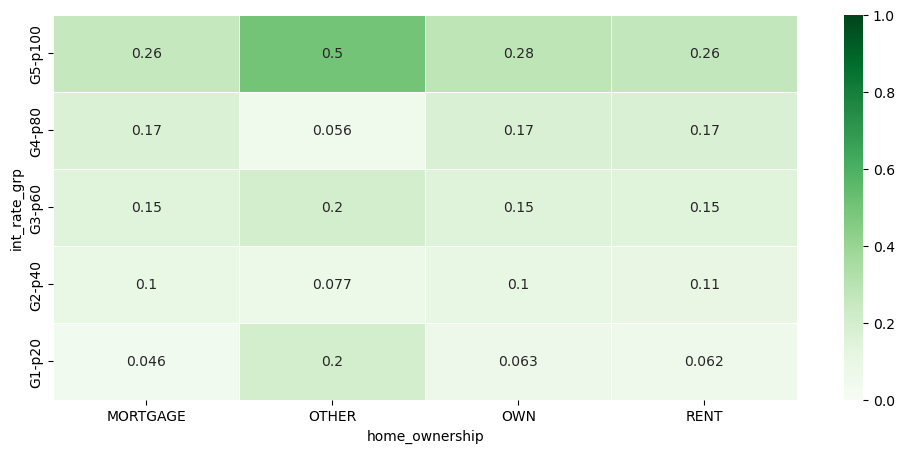

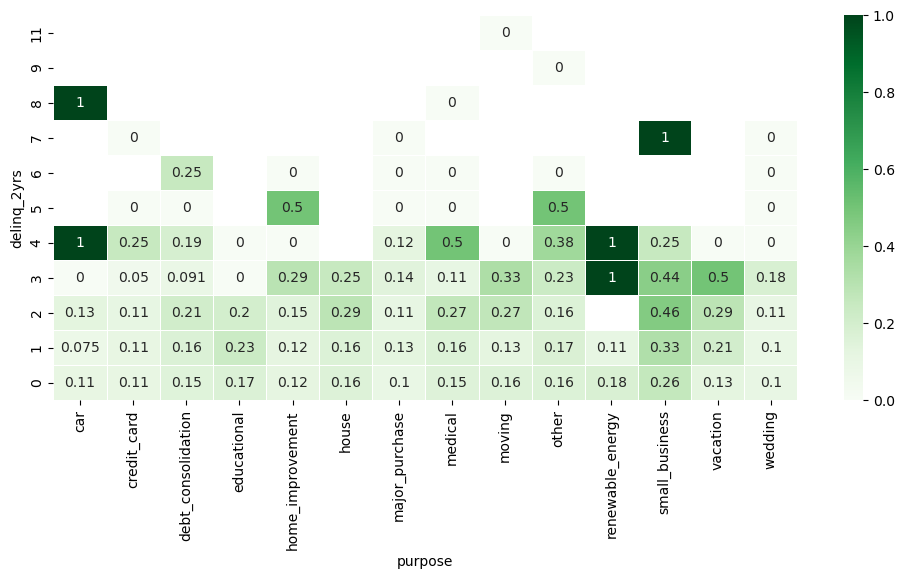

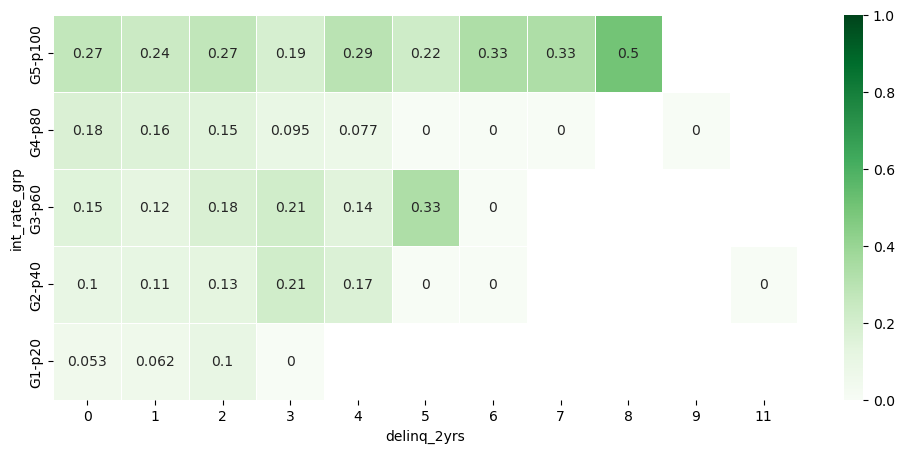

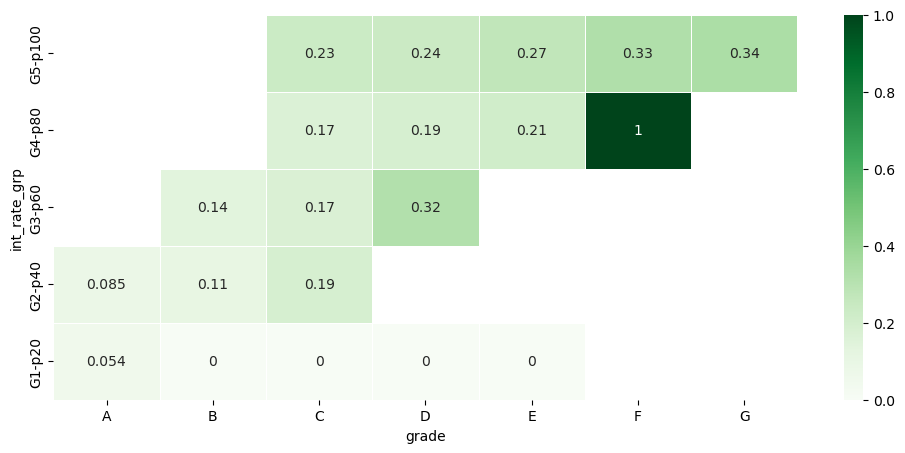

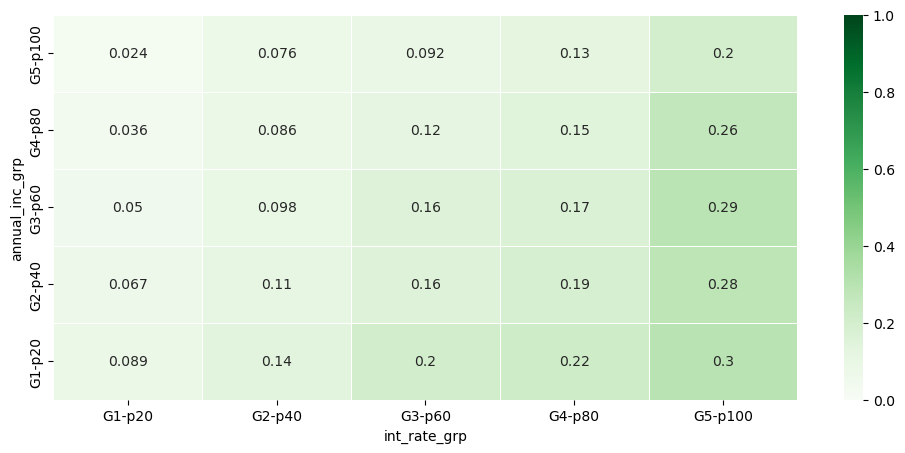

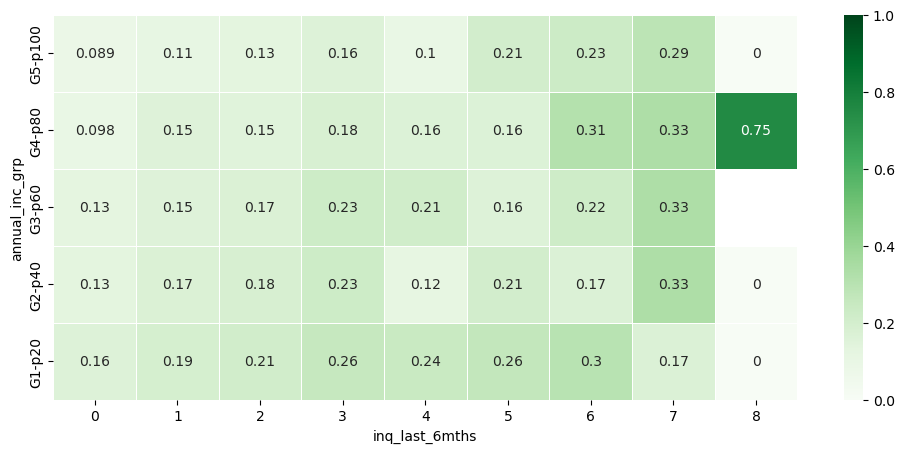

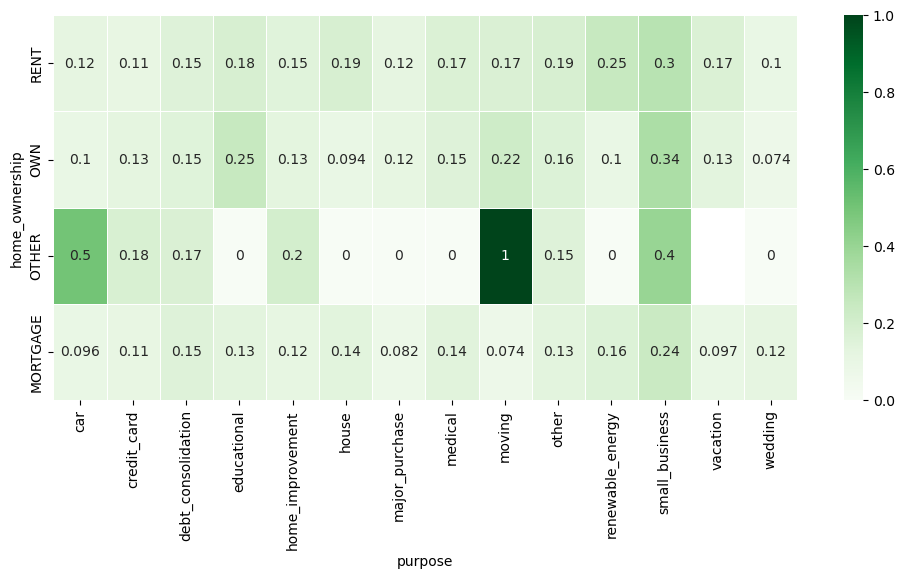

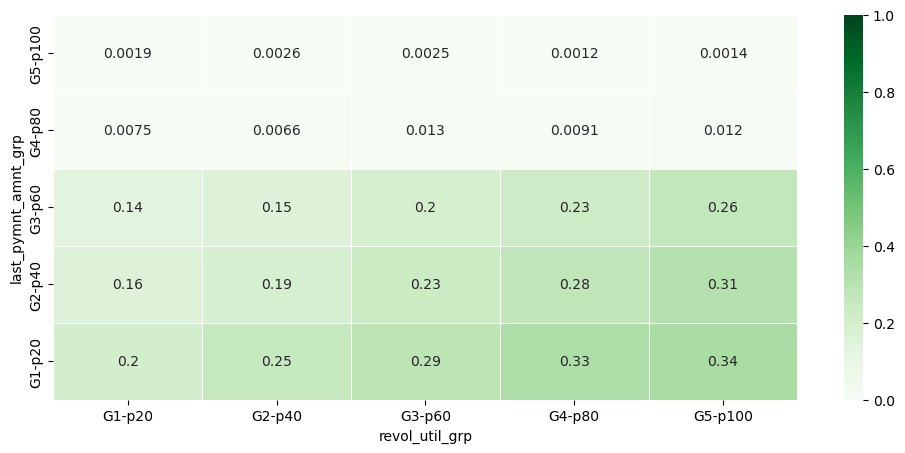

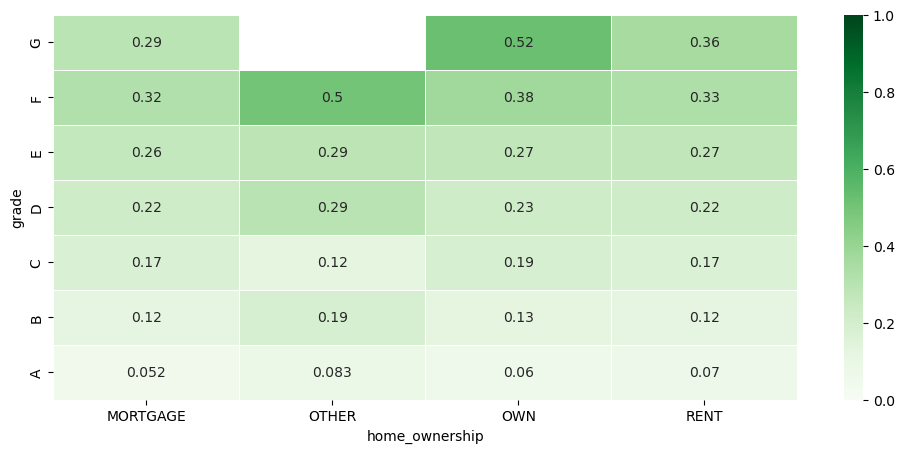

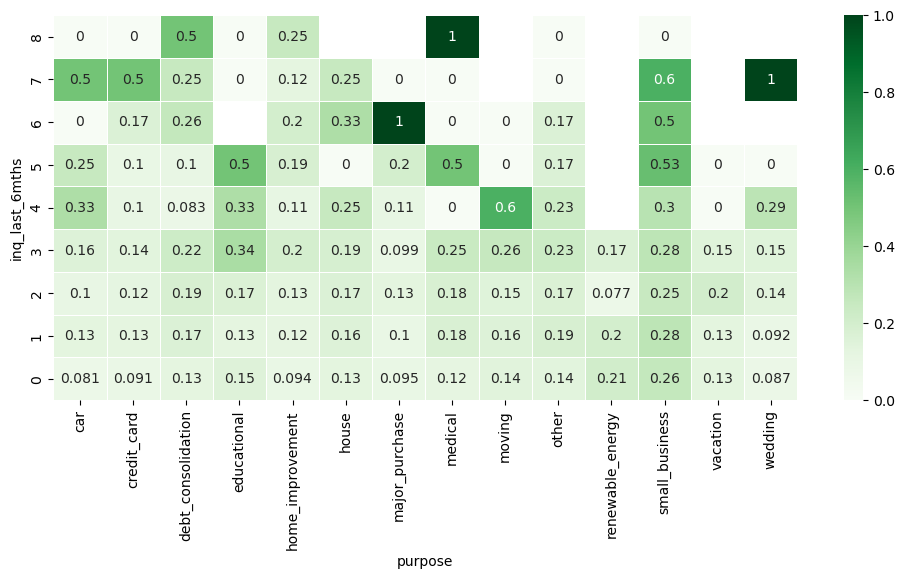

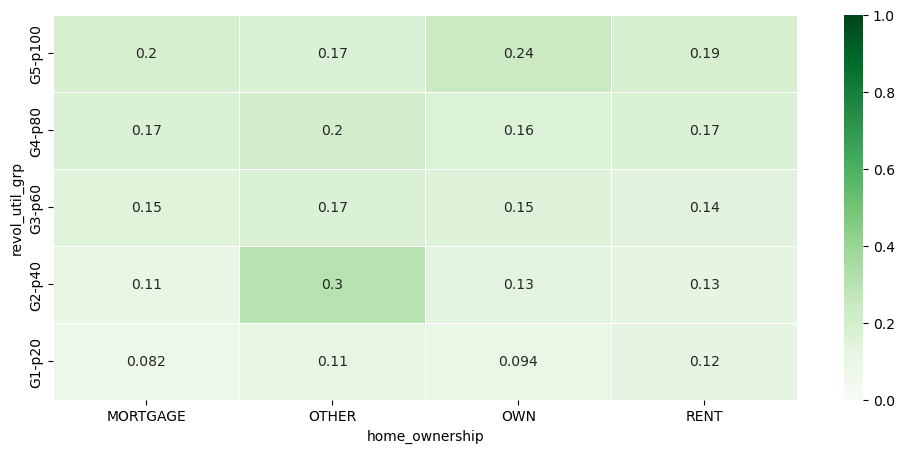

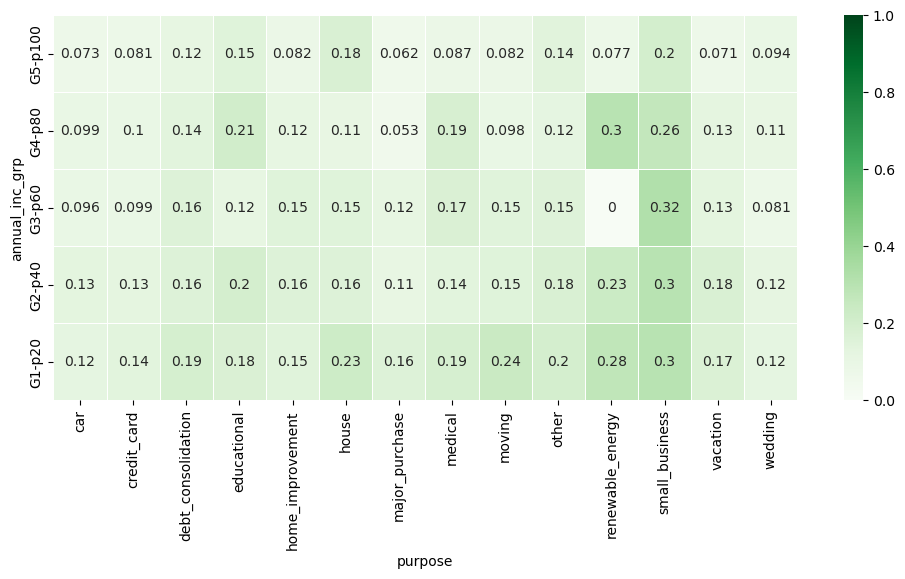

In [90]:
for x, y in Strong_indicators_pairs:
    plt.figure(figsize=(12,5))
    heat = pd.crosstab(columns = loan[y], index = loan[x], values =loan['default'], aggfunc = 'mean')
    heat.sort_index(level=0, ascending=False, inplace=True)
    sns.heatmap(heat, annot=True,  linewidths=0.5, linecolor='white', cmap = 'Greens', vmin=0, vmax=1)
    plt.show()

<hr>

## <font color = blue> Final Conclusion </font>

After analysing all the multivariate charts, we can clearly observe the **potentially strong indicators/predictors** of loan default.

These are following-
1) <font color = green> **annual_inc -**</font>  The self-reported annual income provided by the borrower during registration.<br>
2) <font color = green> **grade/sub-grade -**</font> LC assigned loan grade
<br>
3) <font color = green> **last_pymnt_amnt -**</font> Last total payment amount received
<br>
4) <font color = green> **term -**</font> The number of monthly payments on the loan.
<br>
5) <font color = green> **int_rate -**</font> Interest Rate on the loan
<br>
6) <font color = green> **dti -**</font> A ratio calculated using the borrower’s total monthly debt divided by the borrower’s self-reported monthly income.
<br>
7) <font color = green> **revol_util -**</font> Amount of credit the borrower is using relative to all available revolving credit.
<br>
<br>
<br>
Out of these 7 indicators <font color = green> **annual_inc, grade and last_pymnt_amnt** </font> are most potential indicators for identifying loan defaults.

**Reason for their selection-** There are few more variables which have shown strong trends with loan default status, however those variables are not as good indicators as above mentioned variables because these selected variables individually and in combination with each other, seperate the loans with higher default rate and not nullifying their combining impact on loan default rate.

These variables, in together, have increased the degree of separability between loan default or not-default, thus are potential indicators. **Therefore, achieving the objective of problem statement of Lending Club Case Study.**

<br><br>
<br>
<br>
<br>


    **- - - - - -At last, we have created seperate heatmaps for these selected variables for better readibility- - - - - -** 

In [91]:
Final_indicators = ['annual_inc_grp', 'dti_grp', 'int_rate_grp', 'last_pymnt_amnt_grp', 'revol_util_grp', 'grade', 'term']
Final_indicators_pairs = uniqueCombinations(Final_indicators)

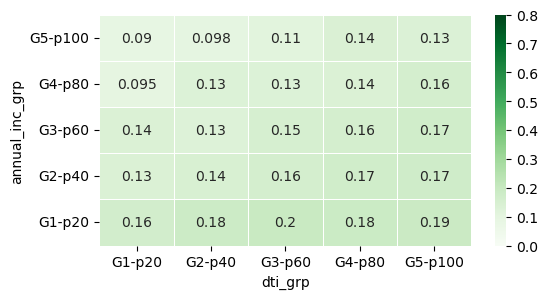

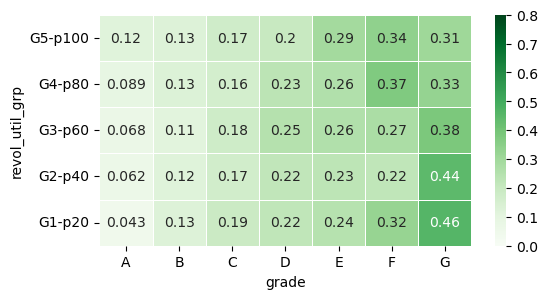

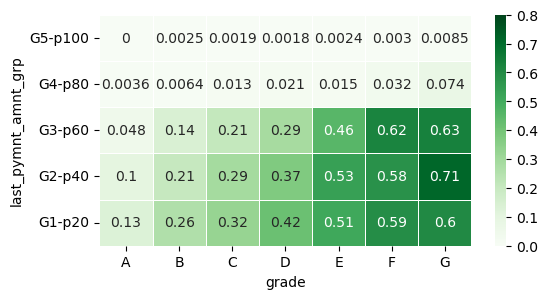

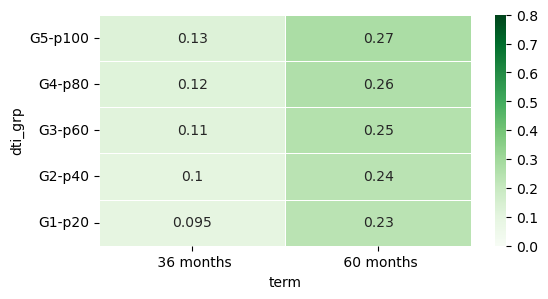

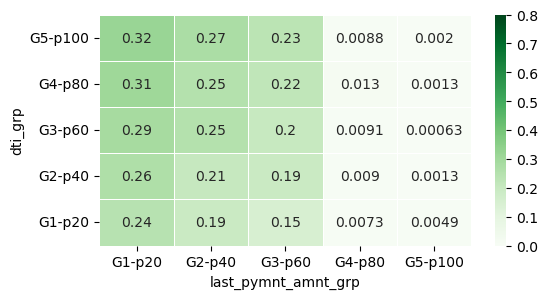

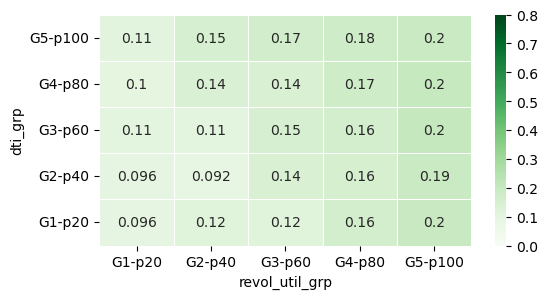

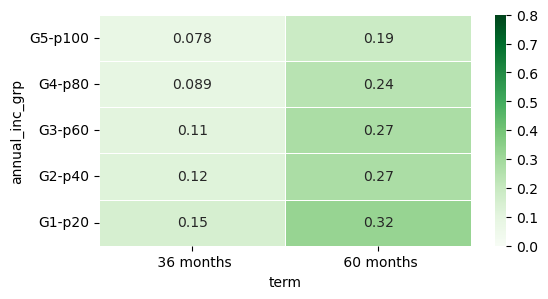

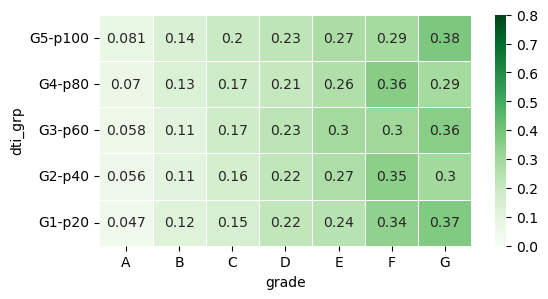

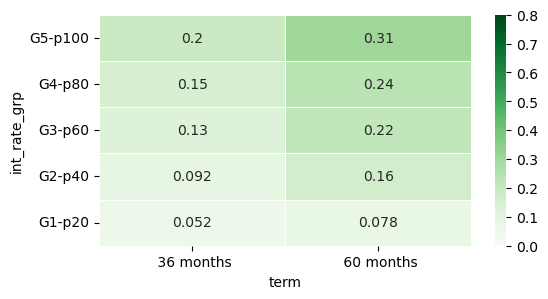

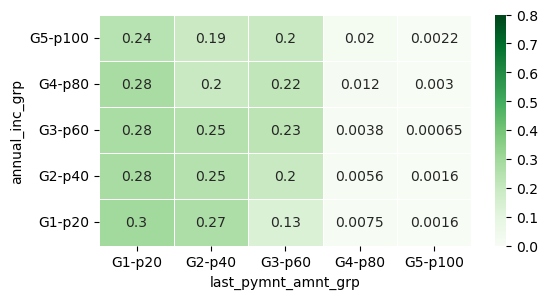

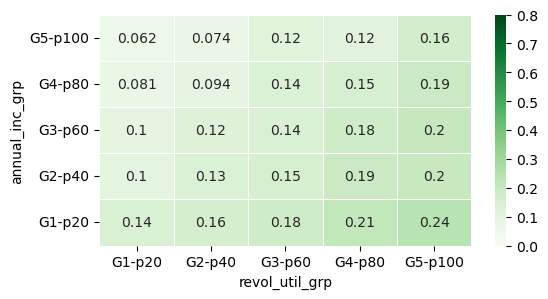

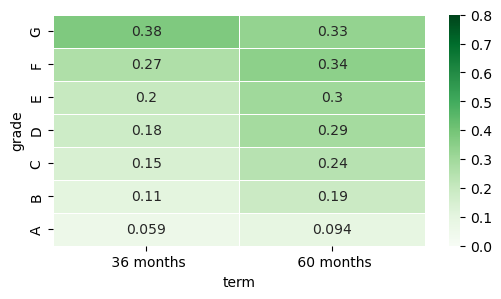

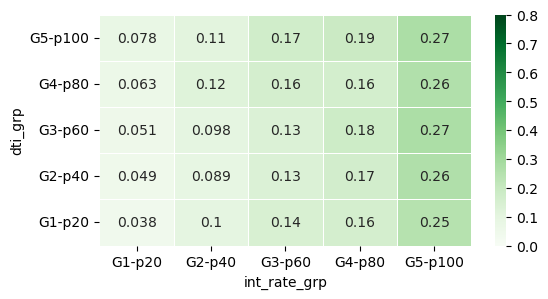

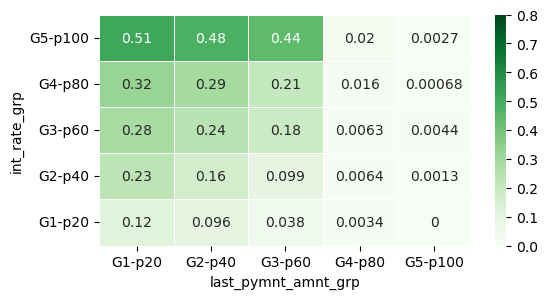

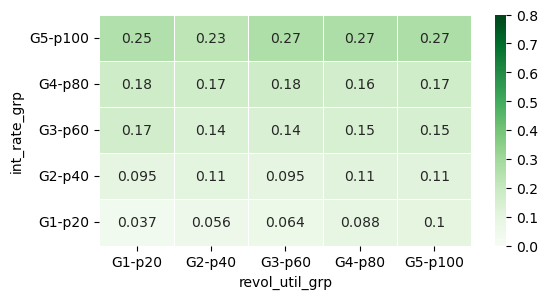

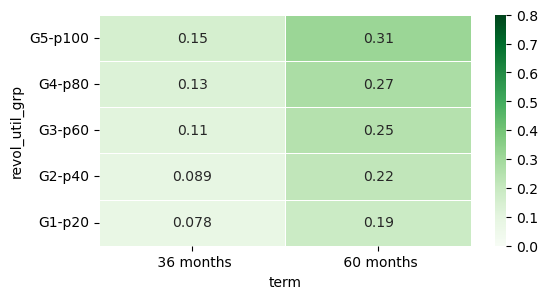

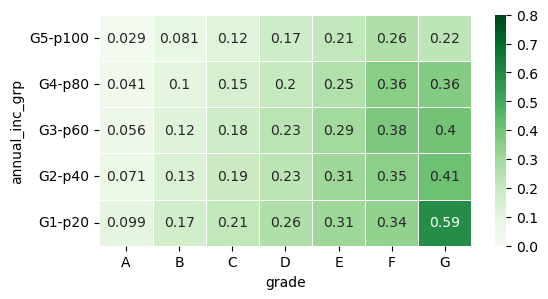

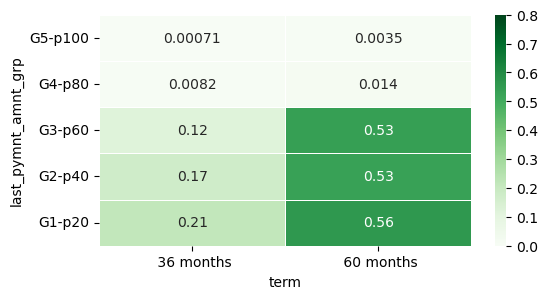

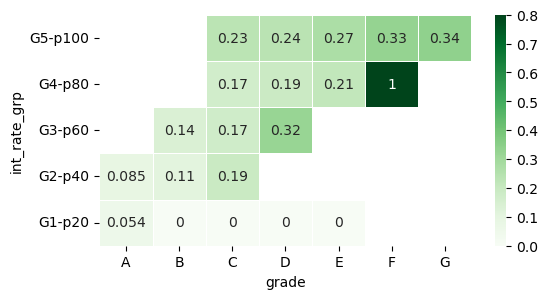

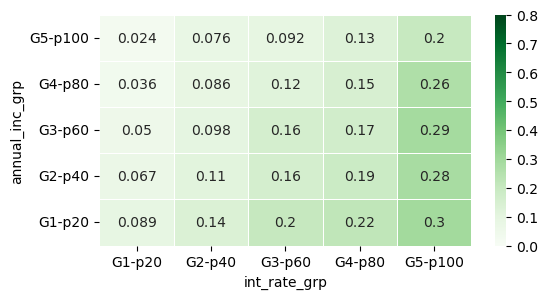

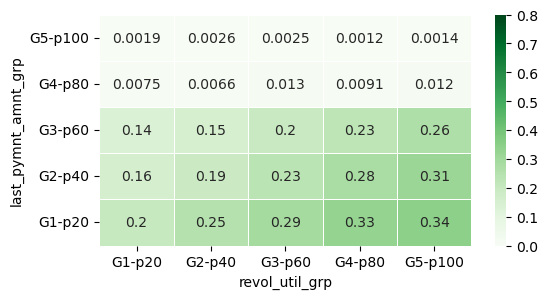

In [92]:
for x, y in Final_indicators_pairs:
    plt.figure(figsize=(6,3))
    heat = pd.crosstab(columns = loan[y], index = loan[x], values =loan['default'], aggfunc = 'mean')
    heat.sort_index(level=0, ascending=False, inplace=True)
    sns.heatmap(heat, annot=True,  linewidths=0.5, linecolor='white', cmap = 'Greens', vmin=0, vmax=0.8)
    plt.show()